In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import tensorflow as tf

In [3]:
from vaneska.models import Gaussian, Moffat
from vaneska.photometry import PSFPhotometry

In [4]:
from lightkurve import KeplerTargetPixelFile, LightCurve

In [5]:
tpf = KeplerTargetPixelFile.from_archive('kepler-10b', quarter=5)

INFO: Found cached file ./mastDownload/Kepler/kplr011904151_lc_Q111111110111011101/kplr011904151-2010174085026_lpd-targ.fits.gz with expected size 4685387. [astroquery.query]


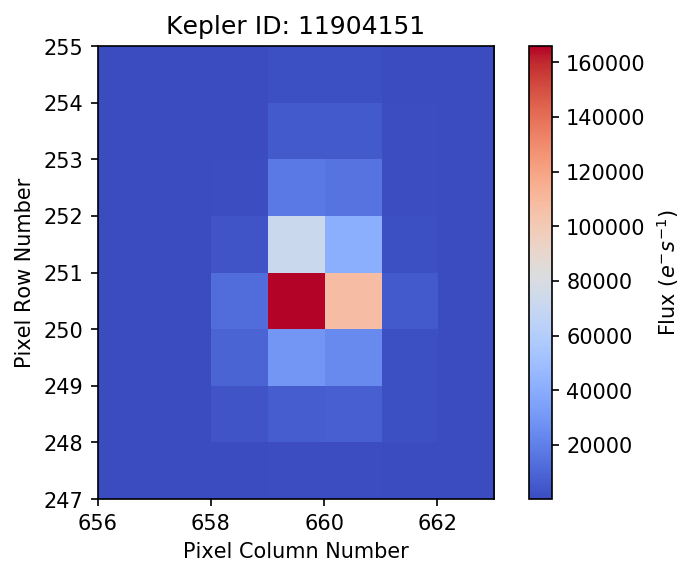

In [6]:
tpf.plot(scale=None, bkg=True, cmap='coolwarm')

In [34]:
moffat = Moffat(shape=tpf.shape[1:], col_ref=tpf.column, row_ref=tpf.row)

In [35]:
flux = tf.Variable(np.sum(tpf.flux[0]), dtype=tf.float64, name='flux')
col = tf.Variable(tpf.column+3.85, dtype=tf.float64, name='col')
row = tf.Variable(tpf.row+3.74, dtype=tf.float64, name='row')
a = tf.Variable(1., dtype=tf.float64, name='a')
b = tf.Variable(.0, dtype=tf.float64, name='b')
c = tf.Variable(1., dtype=tf.float64, name='c')
beta = tf.Variable(1., dtype=tf.float64, name='beta')
bkg = tf.Variable(np.mean(tpf.flux_bkg[0]), dtype=tf.float64, name='bkg')

In [36]:
mean = moffat(flux, col, row, a, b, c, beta) + bkg

In [37]:
data = tf.placeholder(dtype=tf.float64)

In [38]:
# Poisson likelihood
loss = tf.reduce_sum(tf.subtract(mean, tf.multiply(data, tf.log(mean))))

In [39]:
var_list=[flux, col, row, a, b, c, beta, bkg]

In [40]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss=loss, var_list=var_list, method='TNC')

In [42]:
with tf.Session() as session:
    session.run(fetches=tf.global_variables_initializer())
    phot = PSFPhotometry(optimizer=optimizer)
    results = phot.fit(pixel_flux=tpf.flux + tpf.flux_bkg, data_placeholder=data,
                       var_list=var_list, session=session)


  0%|          | 0/4492 [00:00<?, ?it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498030.174309
  Number of iterations: 22
  Number of functions evaluations: 100



  0%|          | 1/4492 [00:00<18:47,  3.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497831.809166
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498307.699884
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498773.144523
  Number of iterations: 6
  Number of functions evaluations: 25



  0%|          | 4/4492 [00:00<06:59, 10.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498907.553479
  Number of iterations: 19
  Number of functions evaluations: 81



  0%|          | 5/4492 [00:00<07:16, 10.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498679.633567
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498799.869356
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498897.648757
  Number of iterations: 8
  Number of functions evaluations: 37



  0%|          | 8/4492 [00:00<05:55, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499222.461232
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499015.513361
  Number of iterations: 16
  Number of functions evaluations: 100



  0%|          | 10/4492 [00:00<06:34, 11.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498231.996569
  Number of iterations: 14
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499733.818507
  Number of iterations: 15
  Number of functions evaluations: 75



  0%|          | 12/4492 [00:01<06:40, 11.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498763.455752
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498620.056940
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495216.818561
  Number of iterations: 13
  Number of functions evaluations: 65



  0%|          | 15/4492 [00:01<06:06, 12.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499194.267272
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499709.249177
  Number of iterations: 12
  Number of functions evaluations: 54



  0%|          | 17/4492 [00:01<06:15, 11.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500248.285563
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499941.252140
  Number of iterations: 5
  Number of functions evaluations: 24



  0%|          | 19/4492 [00:01<06:02, 12.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499674.379151
  Number of iterations: 22
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499853.549991
  Number of iterations: 17
  Number of functions evaluations: 78



  0%|          | 21/4492 [00:01<06:13, 11.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499776.294693
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498977.813919
  Number of iterations: 19
  Number of functions evaluations: 100



  1%|          | 23/4492 [00:01<06:19, 11.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499497.542761
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499506.908996
  Number of iterations: 13
  Number of functions evaluations: 59



  1%|          | 25/4492 [00:02<06:18, 11.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500477.562143
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500280.983921
  Number of iterations: 9
  Number of functions evaluations: 43



  1%|          | 27/4492 [00:02<06:24, 11.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500605.349663
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500834.743535
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501322.398277
  Number of iterations: 13
  Number of functions evaluations: 57



  1%|          | 30/4492 [00:02<06:09, 12.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501047.226266
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501110.354792
  Number of iterations: 4
  Number of functions evaluations: 15



  1%|          | 32/4492 [00:02<06:01, 12.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501195.768885
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501340.140072
  Number of iterations: 14
  Number of functions evaluations: 65



Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/jvmirca/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/jvmirca/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  1%|          | 34/4492 [00:02<06:00, 12.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501543.788682
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501907.393403
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501876.397076
  Number of iterations: 6
  Number of functions evaluations: 26


  1%|          | 37/4492 [00:02<05:45, 12.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501515.290396
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5501924.372848
  Number of iterations: 24
  Number of functions evaluations: 100


  1%|          | 39/4492 [00:03<05:54, 12.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501895.477080
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501645.956784
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502076.241084
  Number of iterations: 13
  Number of functions evaluations: 68


  1%|          | 42/4492 [00:03<05:46, 12.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502003.467598
  Number of iterations: 13
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502414.428013
  Number of iterations: 12
  Number of functions evaluations: 66


  1%|          | 44/4492 [00:03<05:50, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502049.202114
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502826.177913
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502160.746939
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502835.575060
  Number of iterations: 4
  Number of functions evaluations: 14


  1%|          | 48/4492 [00:03<05:31, 13.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502990.452910
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502571.688405
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502320.881201
  Number of iterations: 6
  Number of functions evaluations: 24


  1%|          | 51/4492 [00:03<05:23, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502710.029515
  Number of iterations: 14
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502436.388971
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502640.304445
  Number of iterations: 6
  Number of functions evaluations: 26


  1%|          | 54/4492 [00:03<05:19, 13.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503179.540620
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502564.840261
  Number of iterations: 12
  Number of functions evaluations: 56


  1%|          | 56/4492 [00:04<05:18, 13.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5510223.409885
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502935.933405
  Number of iterations: 19
  Number of functions evaluations: 75


  1%|▏         | 58/4492 [00:04<05:23, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502873.275063
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502751.513086
  Number of iterations: 8
  Number of functions evaluations: 35


  1%|▏         | 60/4492 [00:04<05:21, 13.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502788.907407
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502884.371038
  Number of iterations: 6
  Number of functions evaluations: 25


  1%|▏         | 62/4492 [00:04<05:22, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502082.889874
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501893.595738
  Number of iterations: 17
  Number of functions evaluations: 75


  1%|▏         | 64/4492 [00:04<05:24, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502393.612708
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502973.216907
  Number of iterations: 12
  Number of functions evaluations: 64


  1%|▏         | 66/4492 [00:04<05:22, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503344.209565
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503286.230513
  Number of iterations: 15
  Number of functions evaluations: 70


  2%|▏         | 68/4492 [00:04<05:22, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503284.043372
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503078.605919
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503166.720334
  Number of iterations: 8
  Number of functions evaluations: 36


  2%|▏         | 71/4492 [00:05<05:17, 13.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502845.858886
  Number of iterations: 14
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502933.400814
  Number of iterations: 18
  Number of functions evaluations: 100


  2%|▏         | 73/4492 [00:05<05:21, 13.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503423.502966
  Number of iterations: 20
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503008.358398
  Number of iterations: 8
  Number of functions evaluations: 35


  2%|▏         | 75/4492 [00:05<05:24, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503786.421929
  Number of iterations: 5
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503617.313157
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503383.196139
  Number of iterations: 18
  Number of functions evaluations: 95


  2%|▏         | 78/4492 [00:05<05:23, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504747.823064
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503832.586955
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504215.031310
  Number of iterations: 18
  Number of functions evaluations: 84


  2%|▏         | 81/4492 [00:05<05:21, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504210.216281
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504440.579035
  Number of iterations: 21
  Number of functions evaluations: 100


  2%|▏         | 83/4492 [00:06<05:22, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504714.713543
  Number of iterations: 5
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504419.995478
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504180.798460
  Number of iterations: 23
  Number of functions evaluations: 100


  2%|▏         | 86/4492 [00:06<05:20, 13.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504242.918523
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504606.829635
  Number of iterations: 6
  Number of functions evaluations: 26


  2%|▏         | 88/4492 [00:06<05:18, 13.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504052.637285
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504636.989805
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504314.633561
  Number of iterations: 13
  Number of functions evaluations: 68


  2%|▏         | 91/4492 [00:06<05:16, 13.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503814.354612
  Number of iterations: 13
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504590.913451
  Number of iterations: 4
  Number of functions evaluations: 16


  2%|▏         | 93/4492 [00:06<05:15, 13.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504344.596999
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504598.304003
  Number of iterations: 11
  Number of functions evaluations: 48


  2%|▏         | 95/4492 [00:06<05:19, 13.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504236.278282
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504068.807411
  Number of iterations: 15
  Number of functions evaluations: 81


  2%|▏         | 97/4492 [00:07<05:20, 13.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504232.685842
  Number of iterations: 22
  Number of functions evaluations: 95
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504449.370702
  Number of iterations: 5
  Number of functions evaluations: 18


  2%|▏         | 99/4492 [00:07<05:21, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504179.969973
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504033.526090
  Number of iterations: 14
  Number of functions evaluations: 60


  2%|▏         | 101/4492 [00:07<05:20, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504718.198169
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502802.787571
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503510.045881
  Number of iterations: 6
  Number of functions evaluations: 23


  2%|▏         | 104/4492 [00:07<05:17, 13.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503181.826089
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504036.332073
  Number of iterations: 20
  Number of functions evaluations: 83


  2%|▏         | 106/4492 [00:07<05:16, 13.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504581.537875
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504446.240740
  Number of iterations: 16
  Number of functions evaluations: 91


  2%|▏         | 108/4492 [00:07<05:19, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503431.806171
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503788.584246
  Number of iterations: 12
  Number of functions evaluations: 70


  2%|▏         | 110/4492 [00:08<05:19, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504204.802056
  Number of iterations: 18
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504495.842797
  Number of iterations: 11
  Number of functions evaluations: 51


  2%|▏         | 112/4492 [00:08<05:21, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504474.072852
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504688.198192
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504304.538020
  Number of iterations: 24
  Number of functions evaluations: 100


  3%|▎         | 115/4492 [00:08<05:19, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505327.863221
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504510.726489
  Number of iterations: 7
  Number of functions evaluations: 29


  3%|▎         | 117/4492 [00:08<05:17, 13.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503349.967749
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503074.880068
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504410.463484
  Number of iterations: 23
  Number of functions evaluations: 100


  3%|▎         | 120/4492 [00:08<05:16, 13.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496781.440142
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500617.938605
  Number of iterations: 12
  Number of functions evaluations: 50


  3%|▎         | 122/4492 [00:08<05:17, 13.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500736.094784
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504122.622971
  Number of iterations: 22
  Number of functions evaluations: 100


  3%|▎         | 124/4492 [00:09<05:19, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505202.544949
  Number of iterations: 14
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504678.482821
  Number of iterations: 8
  Number of functions evaluations: 32


  3%|▎         | 126/4492 [00:09<05:17, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504571.586937
  Number of iterations: 20
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505301.932989
  Number of iterations: 7
  Number of functions evaluations: 29


  3%|▎         | 128/4492 [00:09<05:17, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505245.985013
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505371.361144
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505692.009484
  Number of iterations: 14
  Number of functions evaluations: 72


  3%|▎         | 131/4492 [00:09<05:15, 13.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504955.634440
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505550.646139
  Number of iterations: 11
  Number of functions evaluations: 53


  3%|▎         | 133/4492 [00:09<05:15, 13.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505129.159271
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504647.668690
  Number of iterations: 14
  Number of functions evaluations: 72


  3%|▎         | 135/4492 [00:09<05:14, 13.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505875.611443
  Number of iterations: 12
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505144.977885
  Number of iterations: 16
  Number of functions evaluations: 100


  3%|▎         | 137/4492 [00:09<05:15, 13.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505203.303325
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505141.499052
  Number of iterations: 13
  Number of functions evaluations: 60


  3%|▎         | 139/4492 [00:10<05:15, 13.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505248.412088
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505327.536974
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505023.688358
  Number of iterations: 10
  Number of functions evaluations: 45


  3%|▎         | 142/4492 [00:10<05:12, 13.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505278.172636
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504384.915745
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504135.818210
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504503.182875
  Number of iterations: 7
  Number of functions evaluations: 30


  3%|▎         | 146/4492 [00:10<05:07, 14.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505402.832177
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505189.237691
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504689.478038
  Number of iterations: 9
  Number of functions evaluations: 41


  3%|▎         | 149/4492 [00:10<05:06, 14.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505280.546995
  Number of iterations: 18
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505507.505480
  Number of iterations: 24
  Number of functions evaluations: 100


  3%|▎         | 151/4492 [00:10<05:09, 14.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505739.180469
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505622.877197
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505217.058166
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505243.263290
  Number of iterations: 22
  Number of functions evaluations: 94


  3%|▎         | 155/4492 [00:10<05:06, 14.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505991.006514
  Number of iterations: 22
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505288.956526
  Number of iterations: 12
  Number of functions evaluations: 49


  3%|▎         | 157/4492 [00:11<05:07, 14.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505759.768292
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505971.881319
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505760.913465
  Number of iterations: 13
  Number of functions evaluations: 60


  4%|▎         | 160/4492 [00:11<05:04, 14.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505809.236570
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505889.057157
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506012.110732
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505593.201729
  Number of iterations: 12
  Number of functions evaluations: 65


  4%|▎         | 164/4492 [00:11<05:00, 14.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505486.278096
  Number of iterations: 14
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505595.076626
  Number of iterations: 22
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505670.838661
  Number of iterations: 11
  Number of functions evaluations: 43


  4%|▎         | 167/4492 [00:11<05:02, 14.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505858.962046
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505748.094126
  Number of iterations: 17
  Number of functions evaluations: 100


  4%|▍         | 169/4492 [00:11<05:03, 14.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505783.840958
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505853.830605
  Number of iterations: 17
  Number of functions evaluations: 91


  4%|▍         | 171/4492 [00:12<05:03, 14.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505677.421499
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505973.828200
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505869.059041
  Number of iterations: 8
  Number of functions evaluations: 37


  4%|▍         | 174/4492 [00:12<05:01, 14.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505743.695860
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505889.708911
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506183.176550
  Number of iterations: 8
  Number of functions evaluations: 40


  4%|▍         | 177/4492 [00:12<04:59, 14.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505597.406966
  Number of iterations: 17
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506704.675433
  Number of iterations: 5
  Number of functions evaluations: 18


  4%|▍         | 179/4492 [00:12<04:58, 14.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506289.245392
  Number of iterations: 16
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506108.208224
  Number of iterations: 13
  Number of functions evaluations: 58


  4%|▍         | 181/4492 [00:12<04:58, 14.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5506948.964992
  Number of iterations: 17
  Number of functions evaluations: 95
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505887.419073
  Number of iterations: 5
  Number of functions evaluations: 18


  4%|▍         | 183/4492 [00:12<04:58, 14.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505624.399678
  Number of iterations: 19
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505074.088398
  Number of iterations: 12
  Number of functions evaluations: 65


  4%|▍         | 185/4492 [00:12<04:59, 14.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504739.075553
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505052.716192
  Number of iterations: 4
  Number of functions evaluations: 15


  4%|▍         | 187/4492 [00:13<04:59, 14.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506236.932024
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506107.525492
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506417.358855
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506439.416170
  Number of iterations: 11
  Number of functions evaluations: 48


  4%|▍         | 191/4492 [00:13<04:56, 14.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506312.643936
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506223.004044
  Number of iterations: 12
  Number of functions evaluations: 51


  4%|▍         | 193/4492 [00:13<04:55, 14.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506814.382867
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506607.496788
  Number of iterations: 15
  Number of functions evaluations: 64


  4%|▍         | 195/4492 [00:13<04:56, 14.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506465.692938
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5506330.068791
  Number of iterations: 11
  Number of functions evaluations: 58


  4%|▍         | 197/4492 [00:13<04:57, 14.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507040.069915
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506928.163123
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507231.789570
  Number of iterations: 11
  Number of functions evaluations: 57


  4%|▍         | 200/4492 [00:13<04:55, 14.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506490.015676
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506483.857398
  Number of iterations: 9
  Number of functions evaluations: 37


  4%|▍         | 202/4492 [00:13<04:54, 14.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506889.656518
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507271.002735
  Number of iterations: 15
  Number of functions evaluations: 69


  5%|▍         | 204/4492 [00:14<04:55, 14.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507040.359302
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507136.105222
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506396.433753
  Number of iterations: 5
  Number of functions evaluations: 19


  5%|▍         | 207/4492 [00:14<04:52, 14.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507052.906929
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507023.467890
  Number of iterations: 14
  Number of functions evaluations: 78


  5%|▍         | 209/4492 [00:14<04:52, 14.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507452.226736
  Number of iterations: 19
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506655.019494
  Number of iterations: 12
  Number of functions evaluations: 53


  5%|▍         | 211/4492 [00:14<04:53, 14.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506912.440001
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507184.389276
  Number of iterations: 18
  Number of functions evaluations: 75


  5%|▍         | 213/4492 [00:14<04:53, 14.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506981.504464
  Number of iterations: 24
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506352.611384
  Number of iterations: 2
  Number of functions evaluations: 9


  5%|▍         | 215/4492 [00:14<04:53, 14.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506951.178447
  Number of iterations: 16
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506716.395651
  Number of iterations: 11
  Number of functions evaluations: 49


  5%|▍         | 217/4492 [00:14<04:53, 14.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506473.377563
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507036.739776
  Number of iterations: 12
  Number of functions evaluations: 56


  5%|▍         | 219/4492 [00:15<04:54, 14.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506452.413911
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507104.140902
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507308.773755
  Number of iterations: 12
  Number of functions evaluations: 53


  5%|▍         | 222/4492 [00:15<04:53, 14.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507016.972845
  Number of iterations: 16
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506571.710573
  Number of iterations: 16
  Number of functions evaluations: 79


  5%|▍         | 224/4492 [00:15<04:54, 14.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506284.470142
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505739.461304
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505959.552207
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506391.161432
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507399.001961
  Number of iterations: 8
  Number of functions evaluations: 37


  5%|▌         | 229/4492 [00:15<04:50, 14.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507140.440909
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507007.960558
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507161.169919
  Number of iterations: 5
  Number of functions evaluations: 20


  5%|▌         | 232/4492 [00:15<04:49, 14.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507432.396592
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506834.795915
  Number of iterations: 15
  Number of functions evaluations: 80


  5%|▌         | 234/4492 [00:15<04:49, 14.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506892.083192
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507176.237170
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507066.999202
  Number of iterations: 8
  Number of functions evaluations: 33


  5%|▌         | 237/4492 [00:16<04:47, 14.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507104.186998
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507110.446660
  Number of iterations: 12
  Number of functions evaluations: 62


  5%|▌         | 239/4492 [00:16<04:47, 14.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507556.378123
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507101.795525
  Number of iterations: 9
  Number of functions evaluations: 36


  5%|▌         | 241/4492 [00:16<04:46, 14.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507176.209877
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507077.932335
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507269.587422
  Number of iterations: 18
  Number of functions evaluations: 80


  5%|▌         | 244/4492 [00:16<04:45, 14.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506706.639986
  Number of iterations: 17
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506895.838153
  Number of iterations: 9
  Number of functions evaluations: 47


  5%|▌         | 246/4492 [00:16<04:45, 14.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507067.090955
  Number of iterations: 14
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507391.251497
  Number of iterations: 11
  Number of functions evaluations: 48


  6%|▌         | 248/4492 [00:16<04:46, 14.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507136.917670
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507200.893947
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507279.420986
  Number of iterations: 16
  Number of functions evaluations: 71


  6%|▌         | 251/4492 [00:16<04:45, 14.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507670.370648
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508214.611011
  Number of iterations: 18
  Number of functions evaluations: 92


  6%|▌         | 253/4492 [00:17<04:46, 14.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507162.284575
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507505.790409
  Number of iterations: 23
  Number of functions evaluations: 100


  6%|▌         | 255/4492 [00:17<04:46, 14.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508035.697472
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507144.867112
  Number of iterations: 17
  Number of functions evaluations: 83


  6%|▌         | 257/4492 [00:17<04:46, 14.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507698.958037
  Number of iterations: 22
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507919.707999
  Number of iterations: 11
  Number of functions evaluations: 47


  6%|▌         | 259/4492 [00:17<04:47, 14.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507592.309094
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507344.635239
  Number of iterations: 19
  Number of functions evaluations: 82


  6%|▌         | 261/4492 [00:17<04:47, 14.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507263.405256
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507293.098740
  Number of iterations: 10
  Number of functions evaluations: 54


  6%|▌         | 263/4492 [00:17<04:47, 14.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507125.140922
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506782.358635
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506326.427805
  Number of iterations: 12
  Number of functions evaluations: 51


  6%|▌         | 266/4492 [00:18<04:46, 14.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506635.402002
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506086.171412
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507829.095951
  Number of iterations: 14
  Number of functions evaluations: 79


  6%|▌         | 269/4492 [00:18<04:45, 14.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508104.001868
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507428.666046
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507792.932831
  Number of iterations: 6
  Number of functions evaluations: 21


  6%|▌         | 272/4492 [00:18<04:43, 14.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507903.420425
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507876.909396
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508330.646202
  Number of iterations: 5
  Number of functions evaluations: 22


  6%|▌         | 275/4492 [00:18<04:41, 14.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508096.343078
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507928.077268
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507732.940638
  Number of iterations: 17
  Number of functions evaluations: 79


  6%|▌         | 278/4492 [00:18<04:41, 14.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508426.110075
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508386.208668
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507904.493624
  Number of iterations: 15
  Number of functions evaluations: 65


  6%|▋         | 281/4492 [00:18<04:41, 14.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508686.262905
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507659.990425
  Number of iterations: 11
  Number of functions evaluations: 51


  6%|▋         | 283/4492 [00:18<04:41, 14.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508573.406156
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508640.933721
  Number of iterations: 10
  Number of functions evaluations: 50


  6%|▋         | 285/4492 [00:19<04:40, 14.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508174.907062
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508478.241814
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508108.147830
  Number of iterations: 14
  Number of functions evaluations: 69


  6%|▋         | 288/4492 [00:19<04:39, 15.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507802.893684
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507918.195053
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507701.515899
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507729.524978
  Number of iterations: 5
  Number of functions evaluations: 24


  7%|▋         | 292/4492 [00:19<04:37, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507799.984408
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507987.368948
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507900.616655
  Number of iterations: 12
  Number of functions evaluations: 54


  7%|▋         | 295/4492 [00:19<04:37, 15.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507963.901836
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508128.664703
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508117.987733
  Number of iterations: 13
  Number of functions evaluations: 61


  7%|▋         | 298/4492 [00:19<04:36, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508233.017381
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507465.591525
  Number of iterations: 12
  Number of functions evaluations: 49


  7%|▋         | 300/4492 [00:19<04:36, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507672.960693
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507980.005239
  Number of iterations: 14
  Number of functions evaluations: 63


  7%|▋         | 302/4492 [00:19<04:35, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507428.262984
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508102.765319
  Number of iterations: 8
  Number of functions evaluations: 34


  7%|▋         | 304/4492 [00:20<04:36, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507983.764196
  Number of iterations: 12
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507524.132291
  Number of iterations: 9
  Number of functions evaluations: 40


  7%|▋         | 306/4492 [00:20<04:35, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506387.844620
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507258.047650
  Number of iterations: 10
  Number of functions evaluations: 43


  7%|▋         | 308/4492 [00:20<04:35, 15.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506808.600445
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508299.759216
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507666.473359
  Number of iterations: 22
  Number of functions evaluations: 100


  7%|▋         | 311/4492 [00:20<04:35, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507727.792028
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508030.705923
  Number of iterations: 7
  Number of functions evaluations: 28


  7%|▋         | 313/4492 [00:20<04:35, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507531.052351
  Number of iterations: 19
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508078.999231
  Number of iterations: 16
  Number of functions evaluations: 78


  7%|▋         | 315/4492 [00:20<04:36, 15.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507994.737696
  Number of iterations: 19
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507918.663139
  Number of iterations: 6
  Number of functions evaluations: 28


  7%|▋         | 317/4492 [00:20<04:36, 15.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507631.632086
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508341.758190
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508329.174584
  Number of iterations: 9
  Number of functions evaluations: 36


  7%|▋         | 320/4492 [00:21<04:34, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508014.372725
  Number of iterations: 12
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507835.267790
  Number of iterations: 17
  Number of functions evaluations: 91


  7%|▋         | 322/4492 [00:21<04:35, 15.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507595.902608
  Number of iterations: 16
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508015.004680
  Number of iterations: 11
  Number of functions evaluations: 54


  7%|▋         | 324/4492 [00:21<04:35, 15.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508103.637918
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508531.968280
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508207.966379
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507753.492702
  Number of iterations: 5
  Number of functions evaluations: 21


  7%|▋         | 328/4492 [00:21<04:33, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508069.239790
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507996.502133
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507643.061572
  Number of iterations: 19
  Number of functions evaluations: 81


  7%|▋         | 331/4492 [00:21<04:33, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507959.676490
  Number of iterations: 9
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507816.240085
  Number of iterations: 10
  Number of functions evaluations: 43


  7%|▋         | 333/4492 [00:21<04:33, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507867.267971
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507917.030537
  Number of iterations: 21
  Number of functions evaluations: 91


  7%|▋         | 335/4492 [00:22<04:34, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507748.745117
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507721.080244
  Number of iterations: 16
  Number of functions evaluations: 69


  8%|▊         | 337/4492 [00:22<04:34, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508322.717500
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507558.295616
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507575.083128
  Number of iterations: 10
  Number of functions evaluations: 56


  8%|▊         | 340/4492 [00:22<04:33, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508588.343513
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507441.580341
  Number of iterations: 23
  Number of functions evaluations: 100


  8%|▊         | 342/4492 [00:22<04:33, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508118.857936
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507668.573634
  Number of iterations: 10
  Number of functions evaluations: 43


  8%|▊         | 344/4492 [00:22<04:33, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507437.481863
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507751.962590
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506736.415439
  Number of iterations: 4
  Number of functions evaluations: 15


  8%|▊         | 347/4492 [00:22<04:32, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507024.133002
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506994.271513
  Number of iterations: 18
  Number of functions evaluations: 75


  8%|▊         | 349/4492 [00:22<04:32, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507815.857885
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507712.812421
  Number of iterations: 19
  Number of functions evaluations: 91


  8%|▊         | 351/4492 [00:23<04:32, 15.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507969.743798
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508014.576061
  Number of iterations: 21
  Number of functions evaluations: 100


  8%|▊         | 353/4492 [00:23<04:32, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507644.783491
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508222.712348
  Number of iterations: 15
  Number of functions evaluations: 71


  8%|▊         | 355/4492 [00:23<04:33, 15.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507628.911856
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508394.244630
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507991.735107
  Number of iterations: 4
  Number of functions evaluations: 14


  8%|▊         | 358/4492 [00:23<04:32, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507657.099836
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507702.119511
  Number of iterations: 13
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508073.267454
  Number of iterations: 10
  Number of functions evaluations: 40


  8%|▊         | 361/4492 [00:23<04:31, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508039.560370
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507997.149134
  Number of iterations: 23
  Number of functions evaluations: 100


  8%|▊         | 363/4492 [00:23<04:31, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507652.200534
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507390.054191
  Number of iterations: 14
  Number of functions evaluations: 61


  8%|▊         | 365/4492 [00:24<04:31, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507817.793210
  Number of iterations: 12
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507557.423277
  Number of iterations: 23
  Number of functions evaluations: 100


  8%|▊         | 367/4492 [00:24<04:32, 15.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508503.224698
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507570.873152
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507808.038530
  Number of iterations: 7
  Number of functions evaluations: 27


  8%|▊         | 370/4492 [00:24<04:31, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507804.687896
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507846.293831
  Number of iterations: 4
  Number of functions evaluations: 18


  8%|▊         | 372/4492 [00:24<04:31, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507964.737215
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507881.041822
  Number of iterations: 4
  Number of functions evaluations: 19


  8%|▊         | 374/4492 [00:24<04:31, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507766.947721
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507386.903789
  Number of iterations: 13
  Number of functions evaluations: 55


  8%|▊         | 376/4492 [00:24<04:31, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507750.632258
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507585.012677
  Number of iterations: 7
  Number of functions evaluations: 31


  8%|▊         | 378/4492 [00:24<04:31, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507489.339428
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507629.428504
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507401.543479
  Number of iterations: 14
  Number of functions evaluations: 73


  8%|▊         | 381/4492 [00:25<04:31, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507314.905611
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507580.595125
  Number of iterations: 2
  Number of functions evaluations: 7
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507338.151655
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507654.431488
  Number of iterations: 21
  Number of functions evaluations: 96


  9%|▊         | 385/4492 [00:25<04:30, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507331.162254
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505902.327661
  Number of iterations: 24
  Number of functions evaluations: 100


  9%|▊         | 387/4492 [00:25<04:30, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506151.531377
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506275.028767
  Number of iterations: 20
  Number of functions evaluations: 100


  9%|▊         | 389/4492 [00:25<04:30, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506610.002715
  Number of iterations: 17
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507217.989716
  Number of iterations: 16
  Number of functions evaluations: 73


  9%|▊         | 391/4492 [00:25<04:31, 15.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507522.526365
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507612.128472
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507809.927657
  Number of iterations: 14
  Number of functions evaluations: 68


  9%|▉         | 394/4492 [00:26<04:30, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507416.514789
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507266.039802
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507627.395254
  Number of iterations: 15
  Number of functions evaluations: 70


  9%|▉         | 397/4492 [00:26<04:30, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507362.677481
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507646.294103
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507874.041082
  Number of iterations: 12
  Number of functions evaluations: 51


  9%|▉         | 400/4492 [00:26<04:29, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507712.514301
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507515.222611
  Number of iterations: 18
  Number of functions evaluations: 86


  9%|▉         | 402/4492 [00:26<04:29, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507867.670771
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507873.130312
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508275.317947
  Number of iterations: 14
  Number of functions evaluations: 64


  9%|▉         | 405/4492 [00:26<04:28, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508060.755119
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507494.438426
  Number of iterations: 9
  Number of functions evaluations: 40


  9%|▉         | 407/4492 [00:26<04:28, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507940.200562
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507974.860886
  Number of iterations: 13
  Number of functions evaluations: 59


  9%|▉         | 409/4492 [00:26<04:28, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507847.395874
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507629.990584
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507749.859464
  Number of iterations: 16
  Number of functions evaluations: 91


  9%|▉         | 412/4492 [00:27<04:27, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507410.813052
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507525.324377
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507665.262476
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507909.073476
  Number of iterations: 4
  Number of functions evaluations: 19


  9%|▉         | 416/4492 [00:27<04:26, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507912.295477
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507675.977185
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507399.389250
  Number of iterations: 17
  Number of functions evaluations: 100


  9%|▉         | 419/4492 [00:27<04:27, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507870.775204
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507693.956934
  Number of iterations: 9
  Number of functions evaluations: 46


  9%|▉         | 421/4492 [00:27<04:26, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507820.693823
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508084.459918
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507755.927304
  Number of iterations: 4
  Number of functions evaluations: 19


  9%|▉         | 424/4492 [00:27<04:26, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508284.713356
  Number of iterations: 15
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507702.200457
  Number of iterations: 6
  Number of functions evaluations: 27


  9%|▉         | 426/4492 [00:27<04:25, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507242.747790
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506962.324281
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507364.686396
  Number of iterations: 10
  Number of functions evaluations: 48


 10%|▉         | 429/4492 [00:27<04:25, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506626.839490
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507904.903567
  Number of iterations: 10
  Number of functions evaluations: 42


 10%|▉         | 431/4492 [00:28<04:24, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508131.477079
  Number of iterations: 12
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507995.056434
  Number of iterations: 16
  Number of functions evaluations: 70


 10%|▉         | 433/4492 [00:28<04:25, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507836.050682
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507662.113316
  Number of iterations: 19
  Number of functions evaluations: 88


 10%|▉         | 435/4492 [00:28<04:25, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507015.379982
  Number of iterations: 15
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507176.803931
  Number of iterations: 14
  Number of functions evaluations: 71


 10%|▉         | 437/4492 [00:28<04:25, 15.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507390.456118
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507076.011223
  Number of iterations: 19
  Number of functions evaluations: 96


 10%|▉         | 439/4492 [00:28<04:25, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507740.382124
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507714.745593
  Number of iterations: 12
  Number of functions evaluations: 61


 10%|▉         | 441/4492 [00:28<04:25, 15.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507233.574417
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507846.366328
  Number of iterations: 15
  Number of functions evaluations: 65


 10%|▉         | 443/4492 [00:29<04:25, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507462.247419
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507966.342090
  Number of iterations: 19
  Number of functions evaluations: 87


 10%|▉         | 445/4492 [00:29<04:26, 15.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507697.237205
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507599.418399
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507499.863918
  Number of iterations: 3
  Number of functions evaluations: 12


 10%|▉         | 448/4492 [00:29<04:25, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507671.961059
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507372.301700
  Number of iterations: 13
  Number of functions evaluations: 66


 10%|█         | 450/4492 [00:29<04:24, 15.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507884.566468
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507687.453885
  Number of iterations: 6
  Number of functions evaluations: 25


 10%|█         | 452/4492 [00:29<04:24, 15.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507685.840343
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507995.598922
  Number of iterations: 15
  Number of functions evaluations: 74


 10%|█         | 454/4492 [00:29<04:24, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507822.991949
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507769.840233
  Number of iterations: 8
  Number of functions evaluations: 34


 10%|█         | 456/4492 [00:29<04:24, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507642.485248
  Number of iterations: 17
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508310.412634
  Number of iterations: 25
  Number of functions evaluations: 100


 10%|█         | 458/4492 [00:30<04:25, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507647.866339
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508222.640817
  Number of iterations: 15
  Number of functions evaluations: 76


 10%|█         | 460/4492 [00:30<04:25, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508444.408329
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508057.160317
  Number of iterations: 20
  Number of functions evaluations: 91


 10%|█         | 462/4492 [00:30<04:25, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507949.260539
  Number of iterations: 17
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507436.353235
  Number of iterations: 9
  Number of functions evaluations: 43


 10%|█         | 464/4492 [00:30<04:25, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507887.371343
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508121.697776
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507721.537032
  Number of iterations: 3
  Number of functions evaluations: 11


 10%|█         | 467/4492 [00:30<04:24, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507252.470562
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507043.999221
  Number of iterations: 8
  Number of functions evaluations: 34


 10%|█         | 469/4492 [00:30<04:24, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506350.140351
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507115.030957
  Number of iterations: 11
  Number of functions evaluations: 40


 10%|█         | 471/4492 [00:30<04:24, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507718.238281
  Number of iterations: 13
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507936.680848
  Number of iterations: 18
  Number of functions evaluations: 100


 11%|█         | 473/4492 [00:31<04:24, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507574.377545
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507713.522355
  Number of iterations: 22
  Number of functions evaluations: 99


 11%|█         | 475/4492 [00:31<04:25, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507408.385172
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507680.195903
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507811.721907
  Number of iterations: 12
  Number of functions evaluations: 52


 11%|█         | 478/4492 [00:31<04:24, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507360.881974
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508183.290162
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507864.618194
  Number of iterations: 11
  Number of functions evaluations: 50


 11%|█         | 481/4492 [00:31<04:23, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507798.301645
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508267.698252
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508257.622054
  Number of iterations: 10
  Number of functions evaluations: 52


 11%|█         | 484/4492 [00:31<04:22, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507573.184561
  Number of iterations: 20
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507910.792725
  Number of iterations: 8
  Number of functions evaluations: 33


 11%|█         | 486/4492 [00:31<04:23, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508174.810184
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507577.247499
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507972.565897
  Number of iterations: 5
  Number of functions evaluations: 21


 11%|█         | 489/4492 [00:32<04:22, 15.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507712.038250
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507320.651915
  Number of iterations: 5
  Number of functions evaluations: 20


 11%|█         | 491/4492 [00:32<04:21, 15.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507138.065413
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507525.159197
  Number of iterations: 6
  Number of functions evaluations: 24


 11%|█         | 493/4492 [00:32<04:21, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507732.363382
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508385.690344
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507479.338510
  Number of iterations: 8
  Number of functions evaluations: 32


 11%|█         | 496/4492 [00:32<04:20, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508570.816801
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507718.080355
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508347.237209
  Number of iterations: 15
  Number of functions evaluations: 82


 11%|█         | 499/4492 [00:32<04:21, 15.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508113.253747
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507748.564359
  Number of iterations: 22
  Number of functions evaluations: 100


 11%|█         | 501/4492 [00:32<04:21, 15.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507778.758661
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507858.794868
  Number of iterations: 15
  Number of functions evaluations: 62


 11%|█         | 503/4492 [00:32<04:21, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507942.618991
  Number of iterations: 6
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507943.056758
  Number of iterations: 20
  Number of functions evaluations: 100


 11%|█         | 505/4492 [00:33<04:21, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507489.434198
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507514.746054
  Number of iterations: 5
  Number of functions evaluations: 20


 11%|█▏        | 507/4492 [00:33<04:21, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507329.749855
  Number of iterations: 22
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506514.105124
  Number of iterations: 18
  Number of functions evaluations: 81


 11%|█▏        | 509/4492 [00:33<04:22, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506596.303617
  Number of iterations: 14
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506749.080661
  Number of iterations: 14
  Number of functions evaluations: 63


 11%|█▏        | 511/4492 [00:33<04:22, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507122.690902
  Number of iterations: 14
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508053.565919
  Number of iterations: 7
  Number of functions evaluations: 32


 11%|█▏        | 513/4492 [00:33<04:22, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507652.705304
  Number of iterations: 13
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507060.052716
  Number of iterations: 15
  Number of functions evaluations: 75


 11%|█▏        | 515/4492 [00:33<04:22, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507023.129571
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505863.901215
  Number of iterations: 11
  Number of functions evaluations: 51


 12%|█▏        | 517/4492 [00:34<04:22, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507142.422932
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507614.450757
  Number of iterations: 10
  Number of functions evaluations: 46


 12%|█▏        | 519/4492 [00:34<04:21, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507359.056300
  Number of iterations: 16
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507861.591639
  Number of iterations: 3
  Number of functions evaluations: 11


 12%|█▏        | 521/4492 [00:34<04:21, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507644.827822
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507080.811976
  Number of iterations: 23
  Number of functions evaluations: 100


 12%|█▏        | 523/4492 [00:34<04:21, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501444.780058
  Number of iterations: 19
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507516.431431
  Number of iterations: 11
  Number of functions evaluations: 45


 12%|█▏        | 525/4492 [00:34<04:21, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507084.071397
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506945.996483
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507410.530385
  Number of iterations: 20
  Number of functions evaluations: 100


 12%|█▏        | 528/4492 [00:34<04:21, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504730.831199
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507311.026772
  Number of iterations: 10
  Number of functions evaluations: 41


 12%|█▏        | 530/4492 [00:34<04:21, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507400.748767
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507680.505812
  Number of iterations: 3
  Number of functions evaluations: 11


 12%|█▏        | 532/4492 [00:35<04:21, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507607.236194
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507328.448308
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507395.512158
  Number of iterations: 16
  Number of functions evaluations: 78


 12%|█▏        | 535/4492 [00:35<04:20, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507824.354191
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507749.528312
  Number of iterations: 11
  Number of functions evaluations: 49


 12%|█▏        | 537/4492 [00:35<04:21, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507174.996912
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507982.937059
  Number of iterations: 11
  Number of functions evaluations: 50


 12%|█▏        | 539/4492 [00:35<04:20, 15.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507348.389155
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507936.165974
  Number of iterations: 4
  Number of functions evaluations: 15


 12%|█▏        | 541/4492 [00:35<04:20, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507436.594169
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507183.450993
  Number of iterations: 18
  Number of functions evaluations: 100


 12%|█▏        | 543/4492 [00:35<04:20, 15.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507591.468112
  Number of iterations: 16
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507904.983280
  Number of iterations: 4
  Number of functions evaluations: 14


 12%|█▏        | 545/4492 [00:35<04:20, 15.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507555.691176
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507373.386751
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508185.897575
  Number of iterations: 8
  Number of functions evaluations: 35


 12%|█▏        | 548/4492 [00:36<04:20, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507117.266634
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506293.510272
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506568.444030
  Number of iterations: 19
  Number of functions evaluations: 83


 12%|█▏        | 551/4492 [00:36<04:19, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510085.256410
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507819.631089
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507415.011636
  Number of iterations: 14
  Number of functions evaluations: 65


 12%|█▏        | 554/4492 [00:36<04:19, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507618.763212
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507501.985993
  Number of iterations: 15
  Number of functions evaluations: 86


 12%|█▏        | 556/4492 [00:36<04:19, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507312.723582
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507404.549195
  Number of iterations: 14
  Number of functions evaluations: 74


 12%|█▏        | 558/4492 [00:36<04:19, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507744.597393
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507633.531493
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507427.836806
  Number of iterations: 15
  Number of functions evaluations: 66


 12%|█▏        | 561/4492 [00:36<04:19, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508244.648910
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507962.679566
  Number of iterations: 21
  Number of functions evaluations: 92


 13%|█▎        | 563/4492 [00:37<04:19, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507733.603168
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508017.335017
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507919.685600
  Number of iterations: 7
  Number of functions evaluations: 29


 13%|█▎        | 566/4492 [00:37<04:18, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507874.488720
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508054.760199
  Number of iterations: 3
  Number of functions evaluations: 12


 13%|█▎        | 568/4492 [00:37<04:18, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508115.369126
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507123.686145
  Number of iterations: 12
  Number of functions evaluations: 53


 13%|█▎        | 570/4492 [00:37<04:18, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507970.172210
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507974.146428
  Number of iterations: 14
  Number of functions evaluations: 63


 13%|█▎        | 572/4492 [00:37<04:18, 15.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508016.093525
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508604.279189
  Number of iterations: 13
  Number of functions evaluations: 54


 13%|█▎        | 574/4492 [00:37<04:18, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507999.818152
  Number of iterations: 14
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507540.078984
  Number of iterations: 13
  Number of functions evaluations: 69


 13%|█▎        | 576/4492 [00:37<04:18, 15.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507363.730751
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508053.721405
  Number of iterations: 10
  Number of functions evaluations: 51


 13%|█▎        | 578/4492 [00:38<04:17, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508408.844241
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508442.507041
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507349.778533
  Number of iterations: 7
  Number of functions evaluations: 31


 13%|█▎        | 581/4492 [00:38<04:17, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507760.529534
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507474.125673
  Number of iterations: 9
  Number of functions evaluations: 41


 13%|█▎        | 583/4492 [00:38<04:16, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508040.708395
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508230.779320
  Number of iterations: 20
  Number of functions evaluations: 100


 13%|█▎        | 585/4492 [00:38<04:17, 15.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507643.738656
  Number of iterations: 17
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507664.886939
  Number of iterations: 12
  Number of functions evaluations: 53


 13%|█▎        | 587/4492 [00:38<04:17, 15.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505891.265432
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505667.568973
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504702.643802
  Number of iterations: 5
  Number of functions evaluations: 22


 13%|█▎        | 590/4492 [00:38<04:16, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503753.997057
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503838.783596
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504504.440180
  Number of iterations: 16
  Number of functions evaluations: 100


 13%|█▎        | 593/4492 [00:38<04:16, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504879.722219
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504856.672482
  Number of iterations: 11
  Number of functions evaluations: 44


 13%|█▎        | 595/4492 [00:39<04:15, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505372.425004
  Number of iterations: 18
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505231.178183
  Number of iterations: 12
  Number of functions evaluations: 51


 13%|█▎        | 597/4492 [00:39<04:15, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504599.063550
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505621.759330
  Number of iterations: 16
  Number of functions evaluations: 69


 13%|█▎        | 599/4492 [00:39<04:15, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505774.360683
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506891.302324
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507939.010975
  Number of iterations: 16
  Number of functions evaluations: 68


 13%|█▎        | 602/4492 [00:39<04:15, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508113.527284
  Number of iterations: 14
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507932.915164
  Number of iterations: 16
  Number of functions evaluations: 83


 13%|█▎        | 604/4492 [00:39<04:15, 15.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508426.407051
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508179.421089
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507974.828106
  Number of iterations: 5
  Number of functions evaluations: 22


 14%|█▎        | 607/4492 [00:39<04:14, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508510.770202
  Number of iterations: 18
  Number of functions evaluations: 94
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508282.271110
  Number of iterations: 10
  Number of functions evaluations: 44


 14%|█▎        | 609/4492 [00:39<04:14, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508245.944568
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508155.321289
  Number of iterations: 9
  Number of functions evaluations: 36


 14%|█▎        | 611/4492 [00:40<04:14, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508161.917413
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508099.540015
  Number of iterations: 17
  Number of functions evaluations: 97


 14%|█▎        | 613/4492 [00:40<04:14, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508909.781454
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507913.243174
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508042.926284
  Number of iterations: 10
  Number of functions evaluations: 54


 14%|█▎        | 616/4492 [00:40<04:14, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508135.526822
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507620.679464
  Number of iterations: 10
  Number of functions evaluations: 49


 14%|█▍        | 618/4492 [00:40<04:14, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508245.603328
  Number of iterations: 17
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507949.623512
  Number of iterations: 9
  Number of functions evaluations: 38


 14%|█▍        | 620/4492 [00:40<04:14, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507319.789066
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508317.547528
  Number of iterations: 11
  Number of functions evaluations: 52


 14%|█▍        | 622/4492 [00:40<04:13, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508075.755729
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507876.304662
  Number of iterations: 16
  Number of functions evaluations: 69


 14%|█▍        | 624/4492 [00:40<04:13, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507386.070286
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508128.594159
  Number of iterations: 10
  Number of functions evaluations: 47


 14%|█▍        | 626/4492 [00:41<04:13, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507815.086191
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508538.637519
  Number of iterations: 11
  Number of functions evaluations: 47


 14%|█▍        | 628/4492 [00:41<04:13, 15.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507555.253286
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508267.040883
  Number of iterations: 7
  Number of functions evaluations: 27


 14%|█▍        | 630/4492 [00:41<04:13, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507973.965014
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506443.153376
  Number of iterations: 15
  Number of functions evaluations: 79


 14%|█▍        | 632/4492 [00:41<04:13, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506688.207299
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507096.971102
  Number of iterations: 14
  Number of functions evaluations: 62


 14%|█▍        | 634/4492 [00:41<04:13, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507673.215794
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507793.599548
  Number of iterations: 3
  Number of functions evaluations: 11


 14%|█▍        | 636/4492 [00:41<04:13, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508185.896284
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508040.241024
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507678.632357
  Number of iterations: 15
  Number of functions evaluations: 80


 14%|█▍        | 639/4492 [00:41<04:12, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508341.371878
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507878.789207
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508367.490747
  Number of iterations: 11
  Number of functions evaluations: 47


 14%|█▍        | 642/4492 [00:42<04:12, 15.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507797.130161
  Number of iterations: 22
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507923.792278
  Number of iterations: 18
  Number of functions evaluations: 86


 14%|█▍        | 644/4492 [00:42<04:12, 15.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508078.218935
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509379.152495
  Number of iterations: 18
  Number of functions evaluations: 77


 14%|█▍        | 646/4492 [00:42<04:12, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507915.398853
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508113.450993
  Number of iterations: 14
  Number of functions evaluations: 59


 14%|█▍        | 648/4492 [00:42<04:12, 15.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508205.095700
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508213.007146
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508458.772520
  Number of iterations: 10
  Number of functions evaluations: 42


 14%|█▍        | 651/4492 [00:42<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508246.804111
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507756.035217
  Number of iterations: 18
  Number of functions evaluations: 87


 15%|█▍        | 653/4492 [00:42<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508467.740454
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507963.573298
  Number of iterations: 15
  Number of functions evaluations: 77


 15%|█▍        | 655/4492 [00:42<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508317.695322
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507769.818228
  Number of iterations: 10
  Number of functions evaluations: 50


 15%|█▍        | 657/4492 [00:43<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508102.568032
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507555.577322
  Number of iterations: 13
  Number of functions evaluations: 64


 15%|█▍        | 659/4492 [00:43<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508249.562200
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508521.234785
  Number of iterations: 14
  Number of functions evaluations: 70


 15%|█▍        | 661/4492 [00:43<04:11, 15.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508369.431484
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508126.350104
  Number of iterations: 12
  Number of functions evaluations: 72


 15%|█▍        | 663/4492 [00:43<04:11, 15.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507921.256378
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507913.980606
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507873.029851
  Number of iterations: 11
  Number of functions evaluations: 47


 15%|█▍        | 666/4492 [00:43<04:10, 15.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508452.295858
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507364.743839
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507859.098766
  Number of iterations: 6
  Number of functions evaluations: 24


 15%|█▍        | 669/4492 [00:43<04:09, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507915.728723
  Number of iterations: 21
  Number of functions evaluations: 95
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506979.129243
  Number of iterations: 5
  Number of functions evaluations: 22


 15%|█▍        | 671/4492 [00:43<04:09, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506688.616622
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506990.382769
  Number of iterations: 17
  Number of functions evaluations: 80


 15%|█▍        | 673/4492 [00:44<04:09, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506707.250262
  Number of iterations: 15
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507710.927265
  Number of iterations: 10
  Number of functions evaluations: 41


 15%|█▌        | 675/4492 [00:44<04:09, 15.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507532.154220
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507094.835575
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507938.844172
  Number of iterations: 4
  Number of functions evaluations: 16


 15%|█▌        | 678/4492 [00:44<04:09, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507261.745134
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507423.867414
  Number of iterations: 13
  Number of functions evaluations: 66


 15%|█▌        | 680/4492 [00:44<04:08, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507632.379051
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507969.632620
  Number of iterations: 10
  Number of functions evaluations: 43


 15%|█▌        | 682/4492 [00:44<04:08, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507681.378650
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508211.017618
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507817.557775
  Number of iterations: 5
  Number of functions evaluations: 21


 15%|█▌        | 685/4492 [00:44<04:08, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507749.493632
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508023.088262
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507791.238067
  Number of iterations: 7
  Number of functions evaluations: 31


 15%|█▌        | 688/4492 [00:44<04:07, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507224.110504
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507681.847853
  Number of iterations: 11
  Number of functions evaluations: 53


 15%|█▌        | 690/4492 [00:44<04:07, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507969.561365
  Number of iterations: 15
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507606.910396
  Number of iterations: 5
  Number of functions evaluations: 21


 15%|█▌        | 692/4492 [00:45<04:07, 15.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507804.704776
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507853.203776
  Number of iterations: 10
  Number of functions evaluations: 55


 15%|█▌        | 694/4492 [00:45<04:07, 15.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508108.330168
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507947.029258
  Number of iterations: 14
  Number of functions evaluations: 63


 15%|█▌        | 696/4492 [00:45<04:07, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507507.885495
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507955.429741
  Number of iterations: 6
  Number of functions evaluations: 26


 16%|█▌        | 698/4492 [00:45<04:07, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508073.619558
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507787.282587
  Number of iterations: 13
  Number of functions evaluations: 63


 16%|█▌        | 700/4492 [00:45<04:07, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508043.765834
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507690.286428
  Number of iterations: 9
  Number of functions evaluations: 45


 16%|█▌        | 702/4492 [00:45<04:07, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507870.914200
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507530.846396
  Number of iterations: 9
  Number of functions evaluations: 34


 16%|█▌        | 704/4492 [00:45<04:07, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508003.289876
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507798.790640
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508022.165087
  Number of iterations: 13
  Number of functions evaluations: 60


 16%|█▌        | 707/4492 [00:46<04:06, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507755.665816
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507468.516560
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507734.360404
  Number of iterations: 5
  Number of functions evaluations: 22


 16%|█▌        | 710/4492 [00:46<04:06, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507086.552193
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507259.078686
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506747.051951
  Number of iterations: 7
  Number of functions evaluations: 33


 16%|█▌        | 713/4492 [00:46<04:05, 15.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506226.614876
  Number of iterations: 15
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507090.868528
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507696.008770
  Number of iterations: 2
  Number of functions evaluations: 9


 16%|█▌        | 716/4492 [00:46<04:05, 15.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507567.211129
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507851.112245
  Number of iterations: 17
  Number of functions evaluations: 86


 16%|█▌        | 718/4492 [00:46<04:06, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507794.400334
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507049.494734
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507912.766211
  Number of iterations: 10
  Number of functions evaluations: 42


 16%|█▌        | 721/4492 [00:46<04:05, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507928.546923
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507725.433101
  Number of iterations: 12
  Number of functions evaluations: 61


 16%|█▌        | 723/4492 [00:47<04:05, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507616.637314
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508124.913246
  Number of iterations: 14
  Number of functions evaluations: 66


 16%|█▌        | 725/4492 [00:47<04:05, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507228.195914
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507675.148665
  Number of iterations: 16
  Number of functions evaluations: 85


 16%|█▌        | 727/4492 [00:47<04:05, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507503.382435
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507702.238156
  Number of iterations: 19
  Number of functions evaluations: 100


 16%|█▌        | 729/4492 [00:47<04:05, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507899.500533
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507511.461506
  Number of iterations: 14
  Number of functions evaluations: 64


 16%|█▋        | 731/4492 [00:47<04:05, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507632.592334
  Number of iterations: 14
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507869.412284
  Number of iterations: 4
  Number of functions evaluations: 18


 16%|█▋        | 733/4492 [00:47<04:05, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507328.050814
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507723.689911
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507616.180513
  Number of iterations: 5
  Number of functions evaluations: 22


 16%|█▋        | 736/4492 [00:47<04:04, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507731.546704
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507532.297562
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507280.168252
  Number of iterations: 10
  Number of functions evaluations: 50


 16%|█▋        | 739/4492 [00:48<04:04, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506827.273518
  Number of iterations: 15
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507831.768374
  Number of iterations: 11
  Number of functions evaluations: 46


 16%|█▋        | 741/4492 [00:48<04:04, 15.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507974.269241
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507135.299223
  Number of iterations: 20
  Number of functions evaluations: 86


 17%|█▋        | 743/4492 [00:48<04:04, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507798.541304
  Number of iterations: 17
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507425.446183
  Number of iterations: 15
  Number of functions evaluations: 76


 17%|█▋        | 745/4492 [00:48<04:04, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507093.547155
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507420.647206
  Number of iterations: 15
  Number of functions evaluations: 77


 17%|█▋        | 747/4492 [00:48<04:04, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507342.792941
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507507.175856
  Number of iterations: 14
  Number of functions evaluations: 69


 17%|█▋        | 749/4492 [00:48<04:04, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507063.194859
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507256.875374
  Number of iterations: 20
  Number of functions evaluations: 100


 17%|█▋        | 751/4492 [00:48<04:03, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507081.802101
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506559.123755
  Number of iterations: 11
  Number of functions evaluations: 53


 17%|█▋        | 753/4492 [00:49<04:03, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505995.796366
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506198.869537
  Number of iterations: 5
  Number of functions evaluations: 20


 17%|█▋        | 755/4492 [00:49<04:03, 15.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506559.132999
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506865.278124
  Number of iterations: 13
  Number of functions evaluations: 58


 17%|█▋        | 757/4492 [00:49<04:03, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506996.110338
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507528.028134
  Number of iterations: 18
  Number of functions evaluations: 82


 17%|█▋        | 759/4492 [00:49<04:03, 15.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507008.323648
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507487.962640
  Number of iterations: 20
  Number of functions evaluations: 93


 17%|█▋        | 761/4492 [00:49<04:03, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507141.405822
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506812.642704
  Number of iterations: 4
  Number of functions evaluations: 15


 17%|█▋        | 763/4492 [00:49<04:03, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507477.217663
  Number of iterations: 19
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506879.643090
  Number of iterations: 4
  Number of functions evaluations: 17


 17%|█▋        | 765/4492 [00:49<04:03, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506460.532491
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506712.655747
  Number of iterations: 14
  Number of functions evaluations: 64


 17%|█▋        | 767/4492 [00:50<04:03, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506565.882782
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506085.984450
  Number of iterations: 7
  Number of functions evaluations: 30


 17%|█▋        | 769/4492 [00:50<04:03, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507080.133113
  Number of iterations: 16
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506896.783721
  Number of iterations: 4
  Number of functions evaluations: 16


 17%|█▋        | 771/4492 [00:50<04:03, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507100.349516
  Number of iterations: 19
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506727.154483
  Number of iterations: 6
  Number of functions evaluations: 25


 17%|█▋        | 773/4492 [00:50<04:02, 15.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506180.878728
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506520.129025
  Number of iterations: 14
  Number of functions evaluations: 88


 17%|█▋        | 775/4492 [00:50<04:02, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506832.823685
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506710.038057
  Number of iterations: 11
  Number of functions evaluations: 52


 17%|█▋        | 777/4492 [00:50<04:02, 15.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506487.423687
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506612.188160
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506396.337651
  Number of iterations: 3
  Number of functions evaluations: 12


 17%|█▋        | 780/4492 [00:50<04:02, 15.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506207.277471
  Number of iterations: 8
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506126.404077
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506504.606520
  Number of iterations: 4
  Number of functions evaluations: 16


 17%|█▋        | 783/4492 [00:51<04:01, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506942.526937
  Number of iterations: 14
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506423.026229
  Number of iterations: 16
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506391.407746
  Number of iterations: 4
  Number of functions evaluations: 18


 17%|█▋        | 786/4492 [00:51<04:01, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506581.495486
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505886.563380
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506213.985318
  Number of iterations: 16
  Number of functions evaluations: 87


 18%|█▊        | 789/4492 [00:51<04:01, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506035.092157
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505529.870049
  Number of iterations: 17
  Number of functions evaluations: 99


 18%|█▊        | 791/4492 [00:51<04:01, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506200.220692
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505730.827769
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505128.711454
  Number of iterations: 12
  Number of functions evaluations: 56


 18%|█▊        | 794/4492 [00:51<04:00, 15.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504884.608932
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504978.936086
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505896.592918
  Number of iterations: 11
  Number of functions evaluations: 46


 18%|█▊        | 797/4492 [00:51<04:00, 15.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505974.629992
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505822.605337
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505808.010326
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505649.603874
  Number of iterations: 17
  Number of functions evaluations: 81


 18%|█▊        | 801/4492 [00:52<03:59, 15.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505602.046199
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505337.104876
  Number of iterations: 8
  Number of functions evaluations: 37


 18%|█▊        | 803/4492 [00:52<03:59, 15.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505534.502754
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505721.325245
  Number of iterations: 13
  Number of functions evaluations: 55


 18%|█▊        | 805/4492 [00:52<03:59, 15.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506082.368296
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505047.961952
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505299.921588
  Number of iterations: 5
  Number of functions evaluations: 20


 18%|█▊        | 808/4492 [00:52<03:58, 15.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505116.267036
  Number of iterations: 11
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505110.975936
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505323.161664
  Number of iterations: 3
  Number of functions evaluations: 11


 18%|█▊        | 811/4492 [00:52<03:58, 15.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505342.567705
  Number of iterations: 6
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504919.907176
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505808.484623
  Number of iterations: 4
  Number of functions evaluations: 15


 18%|█▊        | 814/4492 [00:52<03:57, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505399.494033
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504977.341778
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505443.526103
  Number of iterations: 18
  Number of functions evaluations: 77


 18%|█▊        | 817/4492 [00:52<03:57, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505347.855707
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505786.904923
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505137.377866
  Number of iterations: 4
  Number of functions evaluations: 16


 18%|█▊        | 820/4492 [00:53<03:57, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504598.191394
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505099.854460
  Number of iterations: 15
  Number of functions evaluations: 73


 18%|█▊        | 822/4492 [00:53<03:57, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505078.507052
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505079.044202
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505036.211695
  Number of iterations: 8
  Number of functions evaluations: 36


 18%|█▊        | 825/4492 [00:53<03:56, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505074.394775
  Number of iterations: 18
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505402.489828
  Number of iterations: 5
  Number of functions evaluations: 20


 18%|█▊        | 827/4492 [00:53<03:56, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505377.820950
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505045.503033
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504775.991078
  Number of iterations: 5
  Number of functions evaluations: 23


 18%|█▊        | 830/4492 [00:53<03:56, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505365.209412
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505071.777968
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504735.010145
  Number of iterations: 15
  Number of functions evaluations: 85


 19%|█▊        | 833/4492 [00:53<03:56, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504670.354824
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504058.827144
  Number of iterations: 18
  Number of functions evaluations: 89


 19%|█▊        | 835/4492 [00:53<03:56, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503617.087648
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504157.106604
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504543.728436
  Number of iterations: 11
  Number of functions evaluations: 47


 19%|█▊        | 838/4492 [00:54<03:56, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505083.427958
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505071.803324
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504768.212656
  Number of iterations: 8
  Number of functions evaluations: 33


 19%|█▊        | 841/4492 [00:54<03:55, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505144.053976
  Number of iterations: 12
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504597.712133
  Number of iterations: 10
  Number of functions evaluations: 47


 19%|█▉        | 843/4492 [00:54<03:55, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504422.393619
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505195.301051
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504229.423516
  Number of iterations: 10
  Number of functions evaluations: 44


 19%|█▉        | 846/4492 [00:54<03:55, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504858.578741
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505011.217109
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504756.332244
  Number of iterations: 9
  Number of functions evaluations: 39


 19%|█▉        | 849/4492 [00:54<03:54, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504335.727461
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504636.341610
  Number of iterations: 15
  Number of functions evaluations: 79


 19%|█▉        | 851/4492 [00:54<03:54, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504651.691154
  Number of iterations: 19
  Number of functions evaluations: 94
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504110.359836
  Number of iterations: 7
  Number of functions evaluations: 29


 19%|█▉        | 853/4492 [00:54<03:54, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504543.107584
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504674.501716
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504762.154353
  Number of iterations: 5
  Number of functions evaluations: 29


 19%|█▉        | 856/4492 [00:55<03:54, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504325.882406
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504507.298456
  Number of iterations: 24
  Number of functions evaluations: 100


 19%|█▉        | 858/4492 [00:55<03:54, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504218.937396
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504317.539993
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504865.409243
  Number of iterations: 4
  Number of functions evaluations: 14


 19%|█▉        | 861/4492 [00:55<03:53, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504426.520358
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503971.733293
  Number of iterations: 19
  Number of functions evaluations: 98


 19%|█▉        | 863/4492 [00:55<03:53, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504233.143762
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503941.225749
  Number of iterations: 11
  Number of functions evaluations: 53


 19%|█▉        | 865/4492 [00:55<03:53, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504440.877623
  Number of iterations: 18
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5504780.616211
  Number of iterations: 21
  Number of functions evaluations: 100


 19%|█▉        | 867/4492 [00:55<03:54, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504057.960952
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503956.713482
  Number of iterations: 14
  Number of functions evaluations: 60


 19%|█▉        | 869/4492 [00:56<03:53, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504402.297911
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503804.799854
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504323.572352
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504603.106655
  Number of iterations: 10
  Number of functions evaluations: 43


 19%|█▉        | 873/4492 [00:56<03:53, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503445.244215
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503497.929258
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503044.763207
  Number of iterations: 16
  Number of functions evaluations: 88


 20%|█▉        | 876/4492 [00:56<03:52, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503209.152308
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503914.881916
  Number of iterations: 12
  Number of functions evaluations: 60


 20%|█▉        | 878/4492 [00:56<03:52, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503635.361593
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504483.358617
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504014.709181
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503992.784886
  Number of iterations: 14
  Number of functions evaluations: 63


 20%|█▉        | 882/4492 [00:56<03:52, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504004.107119
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503867.241625
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503689.261391
  Number of iterations: 9
  Number of functions evaluations: 40


 20%|█▉        | 885/4492 [00:56<03:51, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504140.082278
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503772.384941
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503742.376361
  Number of iterations: 8
  Number of functions evaluations: 35


 20%|█▉        | 888/4492 [00:56<03:51, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503727.975522
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504083.169184
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504132.814598
  Number of iterations: 19
  Number of functions evaluations: 97


 20%|█▉        | 891/4492 [00:57<03:51, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504230.940248
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503699.011357
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504137.360078
  Number of iterations: 12
  Number of functions evaluations: 56


 20%|█▉        | 894/4492 [00:57<03:50, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503818.015515
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504054.674932
  Number of iterations: 3
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503916.080905
  Number of iterations: 5
  Number of functions evaluations: 19


 20%|█▉        | 897/4492 [00:57<03:50, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503733.974629
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504206.368102
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504327.716201
  Number of iterations: 4
  Number of functions evaluations: 16


 20%|██        | 900/4492 [00:57<03:49, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503691.407654
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504036.758032
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503463.665138
  Number of iterations: 18
  Number of functions evaluations: 85


 20%|██        | 903/4492 [00:57<03:49, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503201.400795
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503681.678399
  Number of iterations: 11
  Number of functions evaluations: 47


 20%|██        | 905/4492 [00:57<03:49, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504205.452948
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503498.346123
  Number of iterations: 16
  Number of functions evaluations: 100


 20%|██        | 907/4492 [00:58<03:49, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503807.987489
  Number of iterations: 11
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503225.579141
  Number of iterations: 4
  Number of functions evaluations: 16


 20%|██        | 909/4492 [00:58<03:49, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503632.413464
  Number of iterations: 19
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503939.324531
  Number of iterations: 10
  Number of functions evaluations: 41


 20%|██        | 911/4492 [00:58<03:49, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503270.821913
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503582.779681
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502766.377202
  Number of iterations: 10
  Number of functions evaluations: 37


 20%|██        | 914/4492 [00:58<03:49, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502613.291659
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502388.406708
  Number of iterations: 8
  Number of functions evaluations: 32


 20%|██        | 916/4492 [00:58<03:48, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502821.194164
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503447.494284
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503540.879157
  Number of iterations: 19
  Number of functions evaluations: 99


 20%|██        | 919/4492 [00:58<03:48, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503799.573594
  Number of iterations: 15
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503276.072724
  Number of iterations: 12
  Number of functions evaluations: 62


 21%|██        | 921/4492 [00:58<03:48, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503576.235853
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503970.924088
  Number of iterations: 17
  Number of functions evaluations: 100


 21%|██        | 923/4492 [00:59<03:48, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503378.101567
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503308.268757
  Number of iterations: 6
  Number of functions evaluations: 24


 21%|██        | 925/4492 [00:59<03:48, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503787.605831
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503576.205413
  Number of iterations: 5
  Number of functions evaluations: 20


 21%|██        | 927/4492 [00:59<03:48, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503834.533321
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503917.053106
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503403.070387
  Number of iterations: 8
  Number of functions evaluations: 33


 21%|██        | 930/4492 [00:59<03:48, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503104.221059
  Number of iterations: 12
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503370.299546
  Number of iterations: 6
  Number of functions evaluations: 26


 21%|██        | 932/4492 [00:59<03:48, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502661.926719
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503030.535054
  Number of iterations: 15
  Number of functions evaluations: 80


 21%|██        | 934/4492 [00:59<03:47, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503022.829921
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503012.746743
  Number of iterations: 5
  Number of functions evaluations: 26


 21%|██        | 936/4492 [00:59<03:47, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503175.111454
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503345.435191
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503290.869852
  Number of iterations: 8
  Number of functions evaluations: 32


 21%|██        | 939/4492 [01:00<03:47, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497526.570832
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501922.542905
  Number of iterations: 17
  Number of functions evaluations: 91


 21%|██        | 941/4492 [01:00<03:47, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501826.880320
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501481.786878
  Number of iterations: 9
  Number of functions evaluations: 42


 21%|██        | 943/4492 [01:00<03:47, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502672.898868
  Number of iterations: 14
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503398.371331
  Number of iterations: 7
  Number of functions evaluations: 30


 21%|██        | 945/4492 [01:00<03:47, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502794.866655
  Number of iterations: 19
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502779.077622
  Number of iterations: 14
  Number of functions evaluations: 58


 21%|██        | 947/4492 [01:00<03:47, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503228.761159
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502497.164467
  Number of iterations: 8
  Number of functions evaluations: 36


 21%|██        | 949/4492 [01:00<03:47, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502887.547490
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502890.310981
  Number of iterations: 4
  Number of functions evaluations: 18


 21%|██        | 951/4492 [01:01<03:47, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502798.088154
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502895.238156
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502207.740737
  Number of iterations: 16
  Number of functions evaluations: 71


 21%|██        | 954/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501763.530731
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501322.105624
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5502012.798684
  Number of iterations: 16
  Number of functions evaluations: 87


 21%|██▏       | 957/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502661.026683
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502487.739595
  Number of iterations: 6
  Number of functions evaluations: 26


 21%|██▏       | 959/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503015.856867
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502700.990803
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502689.218600
  Number of iterations: 15
  Number of functions evaluations: 70


 21%|██▏       | 962/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502584.411487
  Number of iterations: 17
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502889.474642
  Number of iterations: 4
  Number of functions evaluations: 16


 21%|██▏       | 964/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502715.711209
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501940.927878
  Number of iterations: 10
  Number of functions evaluations: 45


 22%|██▏       | 966/4492 [01:01<03:46, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502964.108260
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502584.298139
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501946.669677
  Number of iterations: 6
  Number of functions evaluations: 30


 22%|██▏       | 969/4492 [01:02<03:45, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502493.748680
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502415.191467
  Number of iterations: 5
  Number of functions evaluations: 19


 22%|██▏       | 971/4492 [01:02<03:45, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502714.561537
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502307.115616
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502536.469894
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501992.126571
  Number of iterations: 4
  Number of functions evaluations: 14


 22%|██▏       | 975/4492 [01:02<03:45, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502213.915017
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502394.740709
  Number of iterations: 16
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501904.116832
  Number of iterations: 7
  Number of functions evaluations: 27


 22%|██▏       | 978/4492 [01:02<03:44, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502228.293269
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502430.198781
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502126.261505
  Number of iterations: 10
  Number of functions evaluations: 45


 22%|██▏       | 981/4492 [01:02<03:44, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502139.864936
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502169.813704
  Number of iterations: 13
  Number of functions evaluations: 55


 22%|██▏       | 983/4492 [01:02<03:44, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502634.403556
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502921.094810
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502740.496299
  Number of iterations: 6
  Number of functions evaluations: 27


 22%|██▏       | 986/4492 [01:03<03:44, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502067.106404
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5501795.853188
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502358.391735
  Number of iterations: 21
  Number of functions evaluations: 100


 22%|██▏       | 989/4492 [01:03<03:44, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502057.152543
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502548.630948
  Number of iterations: 12
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502521.580829
  Number of iterations: 6
  Number of functions evaluations: 26


 22%|██▏       | 992/4492 [01:03<03:43, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502341.196366
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501526.212225
  Number of iterations: 18
  Number of functions evaluations: 100


 22%|██▏       | 994/4492 [01:03<03:43, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500973.773668
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5500843.872436
  Number of iterations: 15
  Number of functions evaluations: 69


 22%|██▏       | 996/4492 [01:04<03:44, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501354.867640
  Number of iterations: 13
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502432.318103
  Number of iterations: 3
  Number of functions evaluations: 12


 22%|██▏       | 998/4492 [01:04<03:44, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502192.574935
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502560.726217
  Number of iterations: 10
  Number of functions evaluations: 41


 22%|██▏       | 1000/4492 [01:04<03:45, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502275.089531
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502076.513369
  Number of iterations: 8
  Number of functions evaluations: 33


 22%|██▏       | 1002/4492 [01:04<03:45, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502531.151762
  Number of iterations: 10
  Number of functions evaluations: 52


 22%|██▏       | 1003/4492 [01:04<03:45, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502300.448533
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501974.351640
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502561.484268
  Number of iterations: 23
  Number of functions evaluations: 100


 22%|██▏       | 1006/4492 [01:05<03:45, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501850.248557
  Number of iterations: 20
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501815.425500
  Number of iterations: 19
  Number of functions evaluations: 82


 22%|██▏       | 1008/4492 [01:05<03:45, 15.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502277.158081
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502080.728208
  Number of iterations: 19
  Number of functions evaluations: 88


 22%|██▏       | 1010/4492 [01:05<03:45, 15.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501924.520650
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502337.995727
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502022.863845
  Number of iterations: 8
  Number of functions evaluations: 34


 23%|██▎       | 1013/4492 [01:05<03:45, 15.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502559.195697
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502312.130561
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502247.919228
  Number of iterations: 4
  Number of functions evaluations: 16


 23%|██▎       | 1016/4492 [01:05<03:44, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502324.024559
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502220.674460
  Number of iterations: 9
  Number of functions evaluations: 41


 23%|██▎       | 1018/4492 [01:05<03:44, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502326.160476
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502486.539109
  Number of iterations: 19
  Number of functions evaluations: 100


 23%|██▎       | 1020/4492 [01:05<03:44, 15.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502449.079425
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502071.257163
  Number of iterations: 4
  Number of functions evaluations: 15


 23%|██▎       | 1022/4492 [01:06<03:44, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502433.220479
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501791.766396
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502800.304415
  Number of iterations: 12
  Number of functions evaluations: 58


 23%|██▎       | 1025/4492 [01:06<03:44, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502042.899837
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502301.043777
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502154.042634
  Number of iterations: 7
  Number of functions evaluations: 27


 23%|██▎       | 1028/4492 [01:06<03:43, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502010.569477
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501817.358908
  Number of iterations: 11
  Number of functions evaluations: 49


 23%|██▎       | 1030/4492 [01:06<03:43, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502188.115418
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501973.721767
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502576.719122
  Number of iterations: 6
  Number of functions evaluations: 25


 23%|██▎       | 1033/4492 [01:06<03:43, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501963.181008
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501326.659759
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500277.792617
  Number of iterations: 4
  Number of functions evaluations: 17


 23%|██▎       | 1036/4492 [01:06<03:42, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500866.833874
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501145.894182
  Number of iterations: 13
  Number of functions evaluations: 67


 23%|██▎       | 1038/4492 [01:06<03:42, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501576.026257
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502110.309629
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501154.820497
  Number of iterations: 12
  Number of functions evaluations: 72


 23%|██▎       | 1041/4492 [01:07<03:42, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501886.774420
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502110.994905
  Number of iterations: 22
  Number of functions evaluations: 100


 23%|██▎       | 1043/4492 [01:07<03:42, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501805.919239
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502151.704872
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5501805.068672
  Number of iterations: 22
  Number of functions evaluations: 100


 23%|██▎       | 1046/4492 [01:07<03:42, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501554.057363
  Number of iterations: 11
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501895.716145
  Number of iterations: 15
  Number of functions evaluations: 62


 23%|██▎       | 1048/4492 [01:07<03:42, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501913.945758
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501848.985066
  Number of iterations: 7
  Number of functions evaluations: 29


 23%|██▎       | 1050/4492 [01:07<03:41, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502482.892794
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502445.960954
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502713.373793
  Number of iterations: 10
  Number of functions evaluations: 42


 23%|██▎       | 1053/4492 [01:07<03:41, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501997.967460
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502313.705720
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501422.132321
  Number of iterations: 10
  Number of functions evaluations: 45


 24%|██▎       | 1056/4492 [01:07<03:41, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502520.548215
  Number of iterations: 17
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502027.325311
  Number of iterations: 13
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501811.130756
  Number of iterations: 12
  Number of functions evaluations: 50


 24%|██▎       | 1059/4492 [01:08<03:40, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5502183.681599
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5501930.272047
  Number of iterations: 14
  Number of functions evaluations: 75


 24%|██▎       | 1061/4492 [01:08<03:40, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501779.849566
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501879.703106
  Number of iterations: 13
  Number of functions evaluations: 53


 24%|██▎       | 1063/4492 [01:08<03:40, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501702.188922
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502148.706648
  Number of iterations: 16
  Number of functions evaluations: 81


 24%|██▎       | 1065/4492 [01:08<03:40, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502284.139820
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502035.139970
  Number of iterations: 18
  Number of functions evaluations: 88


 24%|██▍       | 1067/4492 [01:08<03:40, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502267.832299
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502048.357652
  Number of iterations: 5
  Number of functions evaluations: 22


 24%|██▍       | 1069/4492 [01:08<03:40, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502066.996451
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501614.757650
  Number of iterations: 4
  Number of functions evaluations: 14


 24%|██▍       | 1071/4492 [01:09<03:40, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502135.253849
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502309.919473
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502328.198619
  Number of iterations: 8
  Number of functions evaluations: 36


 24%|██▍       | 1074/4492 [01:09<03:40, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502046.681085
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500968.277761
  Number of iterations: 18
  Number of functions evaluations: 100


 24%|██▍       | 1076/4492 [01:09<03:40, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500980.850939
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500803.541022
  Number of iterations: 11
  Number of functions evaluations: 51


 24%|██▍       | 1078/4492 [01:09<03:40, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500929.630052
  Number of iterations: 15
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501695.988280
  Number of iterations: 15
  Number of functions evaluations: 73


 24%|██▍       | 1080/4492 [01:09<03:40, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501786.942328
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502198.132789
  Number of iterations: 13
  Number of functions evaluations: 78


 24%|██▍       | 1082/4492 [01:09<03:40, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501642.502016
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501587.191908
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501499.011184
  Number of iterations: 19
  Number of functions evaluations: 95


 24%|██▍       | 1085/4492 [01:10<03:39, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501258.552549
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501869.119712
  Number of iterations: 12
  Number of functions evaluations: 54


 24%|██▍       | 1087/4492 [01:10<03:39, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501093.919271
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501140.943054
  Number of iterations: 13
  Number of functions evaluations: 62


 24%|██▍       | 1089/4492 [01:10<03:39, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501551.225710
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501342.929928
  Number of iterations: 12
  Number of functions evaluations: 50


 24%|██▍       | 1091/4492 [01:10<03:39, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501582.469528
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501682.311064
  Number of iterations: 18
  Number of functions evaluations: 96


 24%|██▍       | 1093/4492 [01:10<03:39, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501215.343231
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501744.208049
  Number of iterations: 12
  Number of functions evaluations: 51


 24%|██▍       | 1095/4492 [01:10<03:39, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501008.824512
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501585.537699
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501438.555959
  Number of iterations: 9
  Number of functions evaluations: 41


 24%|██▍       | 1098/4492 [01:10<03:38, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501184.324302
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501371.054801
  Number of iterations: 13
  Number of functions evaluations: 55


 24%|██▍       | 1100/4492 [01:10<03:38, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501407.739636
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500728.332398
  Number of iterations: 4
  Number of functions evaluations: 16


 25%|██▍       | 1102/4492 [01:11<03:38, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500854.492162
  Number of iterations: 18
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500581.651938
  Number of iterations: 15
  Number of functions evaluations: 74


 25%|██▍       | 1104/4492 [01:11<03:38, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500567.206761
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500818.171535
  Number of iterations: 14
  Number of functions evaluations: 74


 25%|██▍       | 1106/4492 [01:11<03:39, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501034.061971
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501441.134401
  Number of iterations: 10
  Number of functions evaluations: 47


 25%|██▍       | 1108/4492 [01:11<03:38, 15.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500930.278999
  Number of iterations: 17
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500953.537435
  Number of iterations: 8
  Number of functions evaluations: 32


 25%|██▍       | 1110/4492 [01:11<03:38, 15.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500594.625529
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501067.938655
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501654.736112
  Number of iterations: 4
  Number of functions evaluations: 16


 25%|██▍       | 1113/4492 [01:11<03:38, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501268.094083
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501133.726656
  Number of iterations: 11
  Number of functions evaluations: 53


 25%|██▍       | 1115/4492 [01:12<03:38, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499585.912095
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499828.629523
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499895.234247
  Number of iterations: 12
  Number of functions evaluations: 55


 25%|██▍       | 1118/4492 [01:12<03:37, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500331.377730
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500772.691432
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501274.855241
  Number of iterations: 3
  Number of functions evaluations: 11


 25%|██▍       | 1121/4492 [01:12<03:37, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5501147.164950
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500904.599458
  Number of iterations: 9
  Number of functions evaluations: 39


 25%|██▌       | 1123/4492 [01:12<03:37, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500956.112472
  Number of iterations: 16
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500721.134572
  Number of iterations: 13
  Number of functions evaluations: 57


 25%|██▌       | 1125/4492 [01:12<03:37, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501070.722135
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501328.194132
  Number of iterations: 11
  Number of functions evaluations: 52


 25%|██▌       | 1127/4492 [01:12<03:37, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500217.854834
  Number of iterations: 19
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501277.860205
  Number of iterations: 3
  Number of functions evaluations: 12


 25%|██▌       | 1129/4492 [01:12<03:37, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500690.563457
  Number of iterations: 17
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500745.745796
  Number of iterations: 8
  Number of functions evaluations: 37


 25%|██▌       | 1131/4492 [01:13<03:37, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501450.741940
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501341.492046
  Number of iterations: 11
  Number of functions evaluations: 46


 25%|██▌       | 1133/4492 [01:13<03:36, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501112.646591
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500974.602318
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501043.479653
  Number of iterations: 11
  Number of functions evaluations: 52


 25%|██▌       | 1136/4492 [01:13<03:36, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500764.474258
  Number of iterations: 19
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501029.525403
  Number of iterations: 6
  Number of functions evaluations: 24


 25%|██▌       | 1138/4492 [01:13<03:36, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501535.461959
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5501393.895583
  Number of iterations: 13
  Number of functions evaluations: 70


 25%|██▌       | 1140/4492 [01:13<03:36, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5501260.904144
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501421.983713
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501665.833212
  Number of iterations: 14
  Number of functions evaluations: 67


 25%|██▌       | 1143/4492 [01:13<03:36, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501061.445499
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500361.067386
  Number of iterations: 8
  Number of functions evaluations: 37


 25%|██▌       | 1145/4492 [01:13<03:35, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500846.125882
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500764.692991
  Number of iterations: 9
  Number of functions evaluations: 42


 26%|██▌       | 1147/4492 [01:14<03:35, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501153.408563
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500987.711706
  Number of iterations: 12
  Number of functions evaluations: 55


 26%|██▌       | 1149/4492 [01:14<03:35, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500562.547481
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5500642.374252
  Number of iterations: 9
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500990.805711
  Number of iterations: 14
  Number of functions evaluations: 59


 26%|██▌       | 1152/4492 [01:14<03:35, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500466.424851
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500573.788161
  Number of iterations: 10
  Number of functions evaluations: 44


 26%|██▌       | 1154/4492 [01:14<03:35, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501041.127857
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499982.472053
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499912.732838
  Number of iterations: 10
  Number of functions evaluations: 45


 26%|██▌       | 1157/4492 [01:14<03:34, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499918.888214
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499473.334578
  Number of iterations: 16
  Number of functions evaluations: 69


 26%|██▌       | 1159/4492 [01:14<03:34, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500501.232834
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500159.496084
  Number of iterations: 6
  Number of functions evaluations: 28


 26%|██▌       | 1161/4492 [01:14<03:34, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500381.256036
  Number of iterations: 17
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500507.513865
  Number of iterations: 14
  Number of functions evaluations: 65


 26%|██▌       | 1163/4492 [01:15<03:34, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500518.273282
  Number of iterations: 20
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500857.388502
  Number of iterations: 18
  Number of functions evaluations: 95


 26%|██▌       | 1165/4492 [01:15<03:34, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501050.294078
  Number of iterations: 18
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500320.450936
  Number of iterations: 9
  Number of functions evaluations: 43


 26%|██▌       | 1167/4492 [01:15<03:34, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500661.818895
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500511.129429
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500967.915496
  Number of iterations: 7
  Number of functions evaluations: 29


 26%|██▌       | 1170/4492 [01:15<03:34, 15.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500950.527150
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500670.184399
  Number of iterations: 16
  Number of functions evaluations: 73


 26%|██▌       | 1172/4492 [01:15<03:34, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500614.224276
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500374.564132
  Number of iterations: 19
  Number of functions evaluations: 92


 26%|██▌       | 1174/4492 [01:15<03:34, 15.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500669.596148
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501351.795446
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500820.179892
  Number of iterations: 12
  Number of functions evaluations: 51


 26%|██▌       | 1177/4492 [01:16<03:34, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5500371.155240
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500334.873016
  Number of iterations: 17
  Number of functions evaluations: 72


 26%|██▌       | 1179/4492 [01:16<03:34, 15.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500864.024956
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500289.979947
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500464.588272
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500402.812558
  Number of iterations: 9
  Number of functions evaluations: 42


 26%|██▋       | 1183/4492 [01:16<03:33, 15.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500320.159780
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500297.680903
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500340.442924
  Number of iterations: 11
  Number of functions evaluations: 47


 26%|██▋       | 1186/4492 [01:16<03:33, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500193.381020
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500124.925895
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500286.198400
  Number of iterations: 10
  Number of functions evaluations: 47


 26%|██▋       | 1189/4492 [01:16<03:32, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500240.267646
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500726.350549
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500044.195106
  Number of iterations: 7
  Number of functions evaluations: 31


 27%|██▋       | 1192/4492 [01:16<03:32, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500776.021696
  Number of iterations: 16
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500642.883548
  Number of iterations: 7
  Number of functions evaluations: 29


 27%|██▋       | 1194/4492 [01:16<03:32, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499847.868270
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500334.586315
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499275.531063
  Number of iterations: 18
  Number of functions evaluations: 89


 27%|██▋       | 1197/4492 [01:17<03:32, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499128.085742
  Number of iterations: 13
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499876.450902
  Number of iterations: 6
  Number of functions evaluations: 26


 27%|██▋       | 1199/4492 [01:17<03:32, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499892.533808
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499871.820086
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500220.718345
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499910.446878
  Number of iterations: 11
  Number of functions evaluations: 55


 27%|██▋       | 1203/4492 [01:17<03:31, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500549.506933
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500872.164499
  Number of iterations: 11
  Number of functions evaluations: 51


 27%|██▋       | 1205/4492 [01:17<03:31, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500067.687648
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500183.055464
  Number of iterations: 14
  Number of functions evaluations: 75


 27%|██▋       | 1207/4492 [01:17<03:31, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499772.590556
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499770.081282
  Number of iterations: 22
  Number of functions evaluations: 91


 27%|██▋       | 1209/4492 [01:17<03:31, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500702.988835
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499776.194864
  Number of iterations: 7
  Number of functions evaluations: 35


 27%|██▋       | 1211/4492 [01:17<03:31, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500119.616756
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500359.489859
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499545.888925
  Number of iterations: 8
  Number of functions evaluations: 33


 27%|██▋       | 1214/4492 [01:17<03:30, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499427.235103
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500002.271211
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499955.579168
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499495.509461
  Number of iterations: 14
  Number of functions evaluations: 68


 27%|██▋       | 1218/4492 [01:18<03:30, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500101.786727
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499912.876877
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499706.653166
  Number of iterations: 9
  Number of functions evaluations: 39


 27%|██▋       | 1221/4492 [01:18<03:30, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500050.683642
  Number of iterations: 18
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499637.379312
  Number of iterations: 10
  Number of functions evaluations: 44


 27%|██▋       | 1223/4492 [01:18<03:29, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499731.791965
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500510.197562
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499758.432334
  Number of iterations: 12
  Number of functions evaluations: 52


 27%|██▋       | 1226/4492 [01:18<03:29, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499686.339077
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499224.971040
  Number of iterations: 8
  Number of functions evaluations: 37


 27%|██▋       | 1228/4492 [01:18<03:29, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499730.587242
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499515.702180
  Number of iterations: 10
  Number of functions evaluations: 50


 27%|██▋       | 1230/4492 [01:19<03:29, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499769.733485
  Number of iterations: 15
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499661.211571
  Number of iterations: 23
  Number of functions evaluations: 100


 27%|██▋       | 1232/4492 [01:19<03:29, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499227.050272
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499370.100854
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500348.606208
  Number of iterations: 9
  Number of functions evaluations: 36


 27%|██▋       | 1235/4492 [01:19<03:29, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499700.309494
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496183.033425
  Number of iterations: 14
  Number of functions evaluations: 61


 28%|██▊       | 1237/4492 [01:19<03:29, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496628.096443
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496678.758826
  Number of iterations: 15
  Number of functions evaluations: 72


 28%|██▊       | 1239/4492 [01:19<03:28, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498646.178216
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499963.333729
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499995.910637
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499043.542040
  Number of iterations: 13
  Number of functions evaluations: 69


 28%|██▊       | 1243/4492 [01:19<03:28, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499333.260338
  Number of iterations: 15
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499265.173355
  Number of iterations: 9
  Number of functions evaluations: 40


 28%|██▊       | 1245/4492 [01:19<03:28, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499309.467480
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499347.184241
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500137.422265
  Number of iterations: 7
  Number of functions evaluations: 30


 28%|██▊       | 1248/4492 [01:19<03:27, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499826.447605
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499276.087945
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499269.411343
  Number of iterations: 15
  Number of functions evaluations: 61


 28%|██▊       | 1251/4492 [01:20<03:27, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498774.833300
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499499.681011
  Number of iterations: 13
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498745.543196
  Number of iterations: 21
  Number of functions evaluations: 100


 28%|██▊       | 1254/4492 [01:20<03:27, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499335.249951
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499587.752356
  Number of iterations: 4
  Number of functions evaluations: 19


 28%|██▊       | 1256/4492 [01:20<03:27, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499231.395721
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499128.649837
  Number of iterations: 6
  Number of functions evaluations: 24


 28%|██▊       | 1258/4492 [01:20<03:27, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499393.597851
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498796.131412
  Number of iterations: 6
  Number of functions evaluations: 23


 28%|██▊       | 1260/4492 [01:20<03:27, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498457.619909
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499746.334447
  Number of iterations: 15
  Number of functions evaluations: 78


 28%|██▊       | 1262/4492 [01:20<03:27, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499453.707234
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499180.048681
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499075.237438
  Number of iterations: 13
  Number of functions evaluations: 62


 28%|██▊       | 1265/4492 [01:21<03:26, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499165.844605
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499093.312259
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499182.303046
  Number of iterations: 5
  Number of functions evaluations: 23


 28%|██▊       | 1268/4492 [01:21<03:26, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499337.132351
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498506.664416
  Number of iterations: 16
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499069.098641
  Number of iterations: 16
  Number of functions evaluations: 77


 28%|██▊       | 1271/4492 [01:21<03:26, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499129.686447
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498958.973924
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499429.691040
  Number of iterations: 4
  Number of functions evaluations: 14


 28%|██▊       | 1274/4492 [01:21<03:25, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498968.271428
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498661.263410
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498133.224954
  Number of iterations: 14
  Number of functions evaluations: 62


 28%|██▊       | 1277/4492 [01:21<03:25, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497949.974975
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498565.135075
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498816.636005
  Number of iterations: 8
  Number of functions evaluations: 33


 28%|██▊       | 1280/4492 [01:21<03:25, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498394.294061
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499053.868222
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499083.540630
  Number of iterations: 12
  Number of functions evaluations: 52


 29%|██▊       | 1283/4492 [01:21<03:25, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498364.646476
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5499162.773097
  Number of iterations: 17
  Number of functions evaluations: 100


 29%|██▊       | 1285/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498859.347183
  Number of iterations: 15
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498987.117670
  Number of iterations: 15
  Number of functions evaluations: 66


 29%|██▊       | 1287/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499529.508385
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498920.661852
  Number of iterations: 9
  Number of functions evaluations: 41


 29%|██▊       | 1289/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499249.333555
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499236.748270
  Number of iterations: 14
  Number of functions evaluations: 61


 29%|██▊       | 1291/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498338.725726
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498793.544086
  Number of iterations: 16
  Number of functions evaluations: 69


 29%|██▉       | 1293/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498781.068242
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498802.867293
  Number of iterations: 9
  Number of functions evaluations: 41


 29%|██▉       | 1295/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499201.555260
  Number of iterations: 20
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499555.325921
  Number of iterations: 5
  Number of functions evaluations: 22


 29%|██▉       | 1297/4492 [01:22<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498493.375397
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498585.152689
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499394.070676
  Number of iterations: 18
  Number of functions evaluations: 86


 29%|██▉       | 1300/4492 [01:23<03:24, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498447.338847
  Number of iterations: 16
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499033.950271
  Number of iterations: 4
  Number of functions evaluations: 16


 29%|██▉       | 1302/4492 [01:23<03:23, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499148.337933
  Number of iterations: 17
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499161.874088
  Number of iterations: 10
  Number of functions evaluations: 46


 29%|██▉       | 1304/4492 [01:23<03:23, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498805.184933
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498920.839421
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498326.152368
  Number of iterations: 14
  Number of functions evaluations: 85


 29%|██▉       | 1307/4492 [01:23<03:23, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499115.565859
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499003.016879
  Number of iterations: 12
  Number of functions evaluations: 59


 29%|██▉       | 1309/4492 [01:23<03:23, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499214.716068
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498768.336670
  Number of iterations: 8
  Number of functions evaluations: 38


 29%|██▉       | 1311/4492 [01:23<03:23, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498508.689671
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499192.538107
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499254.785114
  Number of iterations: 7
  Number of functions evaluations: 30


 29%|██▉       | 1314/4492 [01:23<03:23, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499089.209914
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498229.917358
  Number of iterations: 8
  Number of functions evaluations: 34


 29%|██▉       | 1316/4492 [01:24<03:22, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498321.778091
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498408.314674
  Number of iterations: 7
  Number of functions evaluations: 31


 29%|██▉       | 1318/4492 [01:24<03:22, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497812.428425
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497858.026180
  Number of iterations: 17
  Number of functions evaluations: 74


 29%|██▉       | 1320/4492 [01:24<03:22, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498128.266893
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499207.397649
  Number of iterations: 8
  Number of functions evaluations: 30


 29%|██▉       | 1322/4492 [01:24<03:22, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498958.443786
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498632.155974
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498936.015655
  Number of iterations: 3
  Number of functions evaluations: 11


 29%|██▉       | 1325/4492 [01:24<03:22, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498123.719182
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498553.070992
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498686.282017
  Number of iterations: 21
  Number of functions evaluations: 91


 30%|██▉       | 1328/4492 [01:24<03:21, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498611.243383
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498605.286158
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498633.827477
  Number of iterations: 6
  Number of functions evaluations: 27


 30%|██▉       | 1331/4492 [01:24<03:21, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498653.033458
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498870.850787
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498741.133379
  Number of iterations: 14
  Number of functions evaluations: 72


 30%|██▉       | 1334/4492 [01:25<03:21, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498886.356047
  Number of iterations: 18
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499554.023562
  Number of iterations: 16
  Number of functions evaluations: 68


 30%|██▉       | 1336/4492 [01:25<03:21, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498726.274821
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498897.004266
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498880.221833
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498509.547446
  Number of iterations: 7
  Number of functions evaluations: 30


 30%|██▉       | 1340/4492 [01:25<03:20, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498759.584078
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499052.214182
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498476.568846
  Number of iterations: 15
  Number of functions evaluations: 72


 30%|██▉       | 1343/4492 [01:25<03:20, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498175.652456
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498319.357607
  Number of iterations: 15
  Number of functions evaluations: 62


 30%|██▉       | 1345/4492 [01:25<03:20, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498655.721178
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499002.000465
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498520.992366
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497949.067529
  Number of iterations: 12
  Number of functions evaluations: 50


 30%|███       | 1349/4492 [01:26<03:20, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499182.292538
  Number of iterations: 13
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5498335.415780
  Number of iterations: 9
  Number of functions evaluations: 44


 30%|███       | 1351/4492 [01:26<03:20, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498510.982995
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498526.179986
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498269.819541
  Number of iterations: 17
  Number of functions evaluations: 99


 30%|███       | 1354/4492 [01:26<03:20, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498371.302986
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498297.408037
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498561.365005
  Number of iterations: 3
  Number of functions evaluations: 11


 30%|███       | 1357/4492 [01:26<03:19, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498224.177327
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497611.755187
  Number of iterations: 18
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496884.244173
  Number of iterations: 16
  Number of functions evaluations: 86


 30%|███       | 1360/4492 [01:26<03:19, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497728.379382
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498044.437391
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497853.187662
  Number of iterations: 15
  Number of functions evaluations: 66


 30%|███       | 1363/4492 [01:26<03:19, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499020.175390
  Number of iterations: 21
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498391.684589
  Number of iterations: 20
  Number of functions evaluations: 100


 30%|███       | 1365/4492 [01:27<03:19, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498552.551115
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497816.897930
  Number of iterations: 8
  Number of functions evaluations: 35


 30%|███       | 1367/4492 [01:27<03:19, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497937.550257
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498159.184544
  Number of iterations: 19
  Number of functions evaluations: 100


 30%|███       | 1369/4492 [01:27<03:19, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498366.926230
  Number of iterations: 15
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498227.684226
  Number of iterations: 7
  Number of functions evaluations: 30


 31%|███       | 1371/4492 [01:27<03:19, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498208.899815
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498639.173690
  Number of iterations: 18
  Number of functions evaluations: 89


 31%|███       | 1373/4492 [01:27<03:19, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498479.196171
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498494.928485
  Number of iterations: 7
  Number of functions evaluations: 31


 31%|███       | 1375/4492 [01:27<03:19, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497760.171387
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498135.118368
  Number of iterations: 11
  Number of functions evaluations: 48


 31%|███       | 1377/4492 [01:28<03:19, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498416.550974
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498496.217090
  Number of iterations: 4
  Number of functions evaluations: 16


 31%|███       | 1379/4492 [01:28<03:19, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498431.952214
  Number of iterations: 16
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495759.434618
  Number of iterations: 13
  Number of functions evaluations: 59


 31%|███       | 1381/4492 [01:28<03:18, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497865.367609
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498988.165398
  Number of iterations: 12
  Number of functions evaluations: 51


 31%|███       | 1383/4492 [01:28<03:18, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495562.844810
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497905.852485
  Number of iterations: 24
  Number of functions evaluations: 100


 31%|███       | 1385/4492 [01:28<03:18, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498134.907017
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498130.085508
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498300.518345
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497694.719012
  Number of iterations: 8
  Number of functions evaluations: 32


 31%|███       | 1389/4492 [01:28<03:18, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497936.067905
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498086.293457
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497388.701291
  Number of iterations: 16
  Number of functions evaluations: 67


 31%|███       | 1392/4492 [01:28<03:18, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497785.411318
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498291.976846
  Number of iterations: 9
  Number of functions evaluations: 38


 31%|███       | 1394/4492 [01:29<03:17, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498050.990134
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497750.166098
  Number of iterations: 3
  Number of functions evaluations: 11


 31%|███       | 1396/4492 [01:29<03:17, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497986.741494
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497510.839562
  Number of iterations: 10
  Number of functions evaluations: 43


 31%|███       | 1398/4492 [01:29<03:17, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497769.919448
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496705.556419
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496555.486790
  Number of iterations: 19
  Number of functions evaluations: 86


 31%|███       | 1401/4492 [01:29<03:17, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497338.144866
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497455.973875
  Number of iterations: 19
  Number of functions evaluations: 91


 31%|███       | 1403/4492 [01:29<03:17, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497597.044163
  Number of iterations: 15
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497684.946433
  Number of iterations: 5
  Number of functions evaluations: 19


 31%|███▏      | 1405/4492 [01:29<03:17, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497709.254251
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497444.071859
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497435.331342
  Number of iterations: 6
  Number of functions evaluations: 24


 31%|███▏      | 1408/4492 [01:29<03:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497796.060537
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497658.052085
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497897.242386
  Number of iterations: 21
  Number of functions evaluations: 100


 31%|███▏      | 1411/4492 [01:30<03:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497210.071096
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497343.143744
  Number of iterations: 14
  Number of functions evaluations: 87


 31%|███▏      | 1413/4492 [01:30<03:16, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497630.761368
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497696.885004
  Number of iterations: 14
  Number of functions evaluations: 74


 32%|███▏      | 1415/4492 [01:30<03:16, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497804.036122
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498134.830637
  Number of iterations: 13
  Number of functions evaluations: 62


 32%|███▏      | 1417/4492 [01:30<03:16, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497256.452673
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497746.114713
  Number of iterations: 5
  Number of functions evaluations: 22


 32%|███▏      | 1419/4492 [01:30<03:16, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497666.114783
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497230.752650
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497963.131644
  Number of iterations: 10
  Number of functions evaluations: 44


 32%|███▏      | 1422/4492 [01:30<03:16, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497807.593975
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498111.746229
  Number of iterations: 11
  Number of functions evaluations: 48


 32%|███▏      | 1424/4492 [01:30<03:16, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498046.480742
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497988.488285
  Number of iterations: 14
  Number of functions evaluations: 63


 32%|███▏      | 1426/4492 [01:31<03:15, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497665.161731
  Number of iterations: 19
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497534.355829
  Number of iterations: 19
  Number of functions evaluations: 93


 32%|███▏      | 1428/4492 [01:31<03:16, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497538.396085
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497918.503104
  Number of iterations: 8
  Number of functions evaluations: 36


 32%|███▏      | 1430/4492 [01:31<03:16, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498236.351658
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497620.105026
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498184.455060
  Number of iterations: 7
  Number of functions evaluations: 29


 32%|███▏      | 1433/4492 [01:31<03:16, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497880.609569
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497789.619399
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497697.541902
  Number of iterations: 12
  Number of functions evaluations: 50


 32%|███▏      | 1436/4492 [01:32<03:15, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497784.890928
  Number of iterations: 12
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498380.939658
  Number of iterations: 16
  Number of functions evaluations: 76


 32%|███▏      | 1438/4492 [01:32<03:15, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497941.102762
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496960.164851
  Number of iterations: 11
  Number of functions evaluations: 50


 32%|███▏      | 1440/4492 [01:32<03:15, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496437.898650
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497144.536380
  Number of iterations: 12
  Number of functions evaluations: 57


 32%|███▏      | 1442/4492 [01:32<03:15, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496787.443006
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498073.220460
  Number of iterations: 15
  Number of functions evaluations: 71


 32%|███▏      | 1444/4492 [01:32<03:15, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498168.908150
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497906.895813
  Number of iterations: 10
  Number of functions evaluations: 42


 32%|███▏      | 1446/4492 [01:32<03:15, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497331.986305
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497535.466351
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497420.934524
  Number of iterations: 5
  Number of functions evaluations: 25


 32%|███▏      | 1449/4492 [01:32<03:14, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497631.562218
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498061.560225
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497358.660575
  Number of iterations: 15
  Number of functions evaluations: 62


 32%|███▏      | 1452/4492 [01:32<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498107.098453
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498350.534645
  Number of iterations: 7
  Number of functions evaluations: 30


 32%|███▏      | 1454/4492 [01:33<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497513.296263
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497606.316645
  Number of iterations: 16
  Number of functions evaluations: 76


 32%|███▏      | 1456/4492 [01:33<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498097.256687
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497859.861124
  Number of iterations: 6
  Number of functions evaluations: 27


 32%|███▏      | 1458/4492 [01:33<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5498205.605180
  Number of iterations: 14
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498480.043333
  Number of iterations: 7
  Number of functions evaluations: 27


 33%|███▎      | 1460/4492 [01:33<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497754.279276
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498105.987695
  Number of iterations: 13
  Number of functions evaluations: 60


 33%|███▎      | 1462/4492 [01:33<03:14, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498096.203537
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498109.878986
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497977.523834
  Number of iterations: 9
  Number of functions evaluations: 41


 33%|███▎      | 1465/4492 [01:33<03:13, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498178.463356
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498478.488921
  Number of iterations: 9
  Number of functions evaluations: 42


 33%|███▎      | 1467/4492 [01:33<03:13, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498057.747305
  Number of iterations: 14
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497613.548459
  Number of iterations: 13
  Number of functions evaluations: 52


 33%|███▎      | 1469/4492 [01:34<03:13, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498297.164207
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498390.610675
  Number of iterations: 11
  Number of functions evaluations: 49


 33%|███▎      | 1471/4492 [01:34<03:13, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497360.126225
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497729.224518
  Number of iterations: 12
  Number of functions evaluations: 47


 33%|███▎      | 1473/4492 [01:34<03:13, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498173.705088
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497728.962023
  Number of iterations: 23
  Number of functions evaluations: 100


 33%|███▎      | 1475/4492 [01:34<03:13, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498385.015434
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497798.058615
  Number of iterations: 9
  Number of functions evaluations: 46


 33%|███▎      | 1477/4492 [01:34<03:13, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497595.683616
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498452.780340
  Number of iterations: 6
  Number of functions evaluations: 24


 33%|███▎      | 1479/4492 [01:34<03:13, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497606.343595
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496575.067043
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496543.874648
  Number of iterations: 8
  Number of functions evaluations: 35


 33%|███▎      | 1482/4492 [01:34<03:12, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496906.646348
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496974.027756
  Number of iterations: 15
  Number of functions evaluations: 71


 33%|███▎      | 1484/4492 [01:35<03:12, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497594.077720
  Number of iterations: 18
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497630.141744
  Number of iterations: 11
  Number of functions evaluations: 56


 33%|███▎      | 1486/4492 [01:35<03:12, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497731.259542
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498527.276329
  Number of iterations: 15
  Number of functions evaluations: 72


 33%|███▎      | 1488/4492 [01:35<03:12, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497532.489379
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497671.804401
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497795.932430
  Number of iterations: 11
  Number of functions evaluations: 59


 33%|███▎      | 1491/4492 [01:35<03:12, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498037.635453
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497523.164278
  Number of iterations: 11
  Number of functions evaluations: 58


 33%|███▎      | 1493/4492 [01:35<03:12, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497156.275990
  Number of iterations: 17
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497538.663127
  Number of iterations: 6
  Number of functions evaluations: 31


 33%|███▎      | 1495/4492 [01:35<03:11, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497799.788594
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497349.919171
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497840.833586
  Number of iterations: 18
  Number of functions evaluations: 91


 33%|███▎      | 1498/4492 [01:35<03:11, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497362.410553
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5497413.184334
  Number of iterations: 19
  Number of functions evaluations: 100


 33%|███▎      | 1500/4492 [01:36<03:11, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498117.971167
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497632.590052
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496702.890294
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497650.341984
  Number of iterations: 4
  Number of functions evaluations: 16


 33%|███▎      | 1504/4492 [01:36<03:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497901.340455
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497400.991421
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497729.985512
  Number of iterations: 17
  Number of functions evaluations: 91


 34%|███▎      | 1507/4492 [01:36<03:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5497822.373181
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498107.045403
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497935.952709
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497525.586017
  Number of iterations: 20
  Number of functions evaluations: 83


 34%|███▎      | 1511/4492 [01:36<03:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497305.774827
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497548.074457
  Number of iterations: 5
  Number of functions evaluations: 22


 34%|███▎      | 1513/4492 [01:36<03:10, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497147.463851
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497287.825546
  Number of iterations: 2
  Number of functions evaluations: 8


 34%|███▎      | 1515/4492 [01:36<03:10, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496925.981184
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497551.636163
  Number of iterations: 8
  Number of functions evaluations: 33


 34%|███▍      | 1517/4492 [01:37<03:10, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497815.337595
  Number of iterations: 14
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497217.532415
  Number of iterations: 12
  Number of functions evaluations: 51


 34%|███▍      | 1519/4492 [01:37<03:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497217.112747
  Number of iterations: 17
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497010.726254
  Number of iterations: 10
  Number of functions evaluations: 40


 34%|███▍      | 1521/4492 [01:37<03:10, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496019.227809
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495666.419846
  Number of iterations: 4
  Number of functions evaluations: 14


 34%|███▍      | 1523/4492 [01:37<03:10, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497894.811330
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497521.659163
  Number of iterations: 14
  Number of functions evaluations: 71


 34%|███▍      | 1525/4492 [01:37<03:10, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492051.728894
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492394.323761
  Number of iterations: 8
  Number of functions evaluations: 31


 34%|███▍      | 1527/4492 [01:37<03:10, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492554.708785
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492605.791167
  Number of iterations: 9
  Number of functions evaluations: 38


 34%|███▍      | 1529/4492 [01:38<03:10, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491856.149956
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492343.363885
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492672.600586
  Number of iterations: 6
  Number of functions evaluations: 24


 34%|███▍      | 1532/4492 [01:38<03:09, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492954.419745
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492899.324433
  Number of iterations: 22
  Number of functions evaluations: 100


 34%|███▍      | 1534/4492 [01:38<03:09, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493326.245253
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493270.538890
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493768.903734
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492912.930611
  Number of iterations: 6
  Number of functions evaluations: 26


 34%|███▍      | 1538/4492 [01:38<03:09, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493374.560271
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493449.443162
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492488.501538
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492658.750532
  Number of iterations: 18
  Number of functions evaluations: 100


 34%|███▍      | 1542/4492 [01:38<03:08, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492623.717692
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492903.628128
  Number of iterations: 17
  Number of functions evaluations: 86


 34%|███▍      | 1544/4492 [01:38<03:08, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493876.015475
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494179.845917
  Number of iterations: 16
  Number of functions evaluations: 81


 34%|███▍      | 1546/4492 [01:39<03:08, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494344.702012
  Number of iterations: 19
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5494059.722868
  Number of iterations: 18
  Number of functions evaluations: 100


 34%|███▍      | 1548/4492 [01:39<03:08, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494246.492058
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494497.550830
  Number of iterations: 12
  Number of functions evaluations: 49


 35%|███▍      | 1550/4492 [01:39<03:08, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494162.792911
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494001.130917
  Number of iterations: 13
  Number of functions evaluations: 65


 35%|███▍      | 1552/4492 [01:39<03:08, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494436.737345
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494794.938442
  Number of iterations: 18
  Number of functions evaluations: 96


 35%|███▍      | 1554/4492 [01:39<03:08, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494830.186085
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495266.687439
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494657.117620
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494998.528724
  Number of iterations: 9
  Number of functions evaluations: 44


 35%|███▍      | 1558/4492 [01:39<03:08, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495586.718209
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494518.501311
  Number of iterations: 17
  Number of functions evaluations: 77


 35%|███▍      | 1560/4492 [01:40<03:07, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495018.545164
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494587.044838
  Number of iterations: 9
  Number of functions evaluations: 40


 35%|███▍      | 1562/4492 [01:40<03:07, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494697.431624
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495129.074731
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495153.195265
  Number of iterations: 9
  Number of functions evaluations: 37


 35%|███▍      | 1565/4492 [01:40<03:07, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494751.039581
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495498.591067
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495306.174641
  Number of iterations: 14
  Number of functions evaluations: 66


 35%|███▍      | 1568/4492 [01:40<03:07, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494863.835593
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494668.863487
  Number of iterations: 14
  Number of functions evaluations: 62


 35%|███▍      | 1570/4492 [01:40<03:07, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495374.220502
  Number of iterations: 16
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495072.795559
  Number of iterations: 9
  Number of functions evaluations: 40


 35%|███▍      | 1572/4492 [01:40<03:07, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495104.917977
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494685.362648
  Number of iterations: 14
  Number of functions evaluations: 58


 35%|███▌      | 1574/4492 [01:40<03:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494768.912001
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494857.172309
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495136.613767
  Number of iterations: 8
  Number of functions evaluations: 38


 35%|███▌      | 1577/4492 [01:41<03:06, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495004.264013
  Number of iterations: 16
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494894.409815
  Number of iterations: 7
  Number of functions evaluations: 30


 35%|███▌      | 1579/4492 [01:41<03:06, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495085.636706
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495637.959565
  Number of iterations: 23
  Number of functions evaluations: 100


 35%|███▌      | 1581/4492 [01:41<03:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494479.993870
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493682.087316
  Number of iterations: 9
  Number of functions evaluations: 38


 35%|███▌      | 1583/4492 [01:41<03:06, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494269.901960
  Number of iterations: 13
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494452.147496
  Number of iterations: 11
  Number of functions evaluations: 60


 35%|███▌      | 1585/4492 [01:41<03:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495366.804249
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495184.602457
  Number of iterations: 20
  Number of functions evaluations: 100


 35%|███▌      | 1587/4492 [01:41<03:06, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495228.211161
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495199.598131
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495486.361595
  Number of iterations: 5
  Number of functions evaluations: 22


 35%|███▌      | 1590/4492 [01:41<03:05, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495127.400346
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495824.704906
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495693.610662
  Number of iterations: 12
  Number of functions evaluations: 55


 35%|███▌      | 1593/4492 [01:42<03:05, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495191.730804
  Number of iterations: 16
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495249.185511
  Number of iterations: 10
  Number of functions evaluations: 44


 36%|███▌      | 1595/4492 [01:42<03:05, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495928.285701
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495418.305669
  Number of iterations: 12
  Number of functions evaluations: 52


 36%|███▌      | 1597/4492 [01:42<03:05, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495482.977659
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495836.706928
  Number of iterations: 10
  Number of functions evaluations: 41


 36%|███▌      | 1599/4492 [01:42<03:05, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495936.053392
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495867.871555
  Number of iterations: 9
  Number of functions evaluations: 37


 36%|███▌      | 1601/4492 [01:42<03:05, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495454.214924
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495628.522627
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494724.682023
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495835.624662
  Number of iterations: 14
  Number of functions evaluations: 71


 36%|███▌      | 1605/4492 [01:42<03:04, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495961.422423
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495731.157610
  Number of iterations: 8
  Number of functions evaluations: 42


 36%|███▌      | 1607/4492 [01:42<03:04, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496402.499607
  Number of iterations: 16
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495841.895639
  Number of iterations: 17
  Number of functions evaluations: 86


 36%|███▌      | 1609/4492 [01:43<03:04, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495416.119325
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495639.461332
  Number of iterations: 13
  Number of functions evaluations: 64


 36%|███▌      | 1611/4492 [01:43<03:04, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495859.317341
  Number of iterations: 20
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495839.243460
  Number of iterations: 17
  Number of functions evaluations: 78


 36%|███▌      | 1613/4492 [01:43<03:04, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495784.914139
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495566.056143
  Number of iterations: 16
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5500482.997605
  Number of iterations: 19
  Number of functions evaluations: 100


 36%|███▌      | 1616/4492 [01:43<03:04, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494481.577858
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494771.680612
  Number of iterations: 13
  Number of functions evaluations: 57


 36%|███▌      | 1618/4492 [01:43<03:04, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496004.280588
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495519.741211
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495482.800110
  Number of iterations: 8
  Number of functions evaluations: 35


 36%|███▌      | 1621/4492 [01:43<03:03, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494516.950553
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494280.537231
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493932.263550
  Number of iterations: 10
  Number of functions evaluations: 42


 36%|███▌      | 1624/4492 [01:43<03:03, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494570.171774
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495737.248551
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495536.892610
  Number of iterations: 10
  Number of functions evaluations: 43


 36%|███▌      | 1627/4492 [01:44<03:03, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5494862.861507
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495231.305987
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495815.665638
  Number of iterations: 10
  Number of functions evaluations: 56


 36%|███▋      | 1630/4492 [01:44<03:03, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494868.960089
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496188.928805
  Number of iterations: 8
  Number of functions evaluations: 37


 36%|███▋      | 1632/4492 [01:44<03:03, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495292.179827
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495088.275536
  Number of iterations: 11
  Number of functions evaluations: 50


 36%|███▋      | 1634/4492 [01:44<03:02, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495208.388577
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495390.215215
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495612.935177
  Number of iterations: 18
  Number of functions evaluations: 87


 36%|███▋      | 1637/4492 [01:44<03:02, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495446.995371
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495400.787146
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495580.872539
  Number of iterations: 12
  Number of functions evaluations: 56


 37%|███▋      | 1640/4492 [01:44<03:02, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495379.925979
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495216.868344
  Number of iterations: 6
  Number of functions evaluations: 25


 37%|███▋      | 1642/4492 [01:44<03:02, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495119.143088
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495346.427312
  Number of iterations: 6
  Number of functions evaluations: 26


 37%|███▋      | 1644/4492 [01:45<03:02, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495655.932785
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495191.953523
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495337.882325
  Number of iterations: 22
  Number of functions evaluations: 89


 37%|███▋      | 1647/4492 [01:45<03:01, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495319.519774
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495132.867010
  Number of iterations: 7
  Number of functions evaluations: 28


 37%|███▋      | 1649/4492 [01:45<03:01, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495674.370459
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494762.704133
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495213.439935
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495334.087298
  Number of iterations: 8
  Number of functions evaluations: 39


 37%|███▋      | 1653/4492 [01:45<03:01, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495703.713440
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495338.244980
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494797.914355
  Number of iterations: 5
  Number of functions evaluations: 20


 37%|███▋      | 1656/4492 [01:45<03:00, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495570.419509
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495263.714077
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495231.613500
  Number of iterations: 8
  Number of functions evaluations: 32


 37%|███▋      | 1659/4492 [01:45<03:00, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494654.333153
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495390.239056
  Number of iterations: 19
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494694.272498
  Number of iterations: 16
  Number of functions evaluations: 88


 37%|███▋      | 1662/4492 [01:46<03:00, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494241.534025
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494256.349531
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494568.178013
  Number of iterations: 11
  Number of functions evaluations: 46


 37%|███▋      | 1665/4492 [01:46<03:00, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495100.960413
  Number of iterations: 22
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495076.247364
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495169.483426
  Number of iterations: 7
  Number of functions evaluations: 30


 37%|███▋      | 1668/4492 [01:46<03:00, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494842.912006
  Number of iterations: 11
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494977.701598
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495198.466300
  Number of iterations: 13
  Number of functions evaluations: 60


 37%|███▋      | 1671/4492 [01:46<02:59, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495332.959722
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495496.463183
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495353.159797
  Number of iterations: 7
  Number of functions evaluations: 29


 37%|███▋      | 1674/4492 [01:46<02:59, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495022.974872
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495523.695322
  Number of iterations: 7
  Number of functions evaluations: 30


 37%|███▋      | 1676/4492 [01:46<02:59, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495197.803846
  Number of iterations: 17
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495011.701626
  Number of iterations: 3
  Number of functions evaluations: 12


 37%|███▋      | 1678/4492 [01:46<02:59, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494821.409135
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495691.336799
  Number of iterations: 21
  Number of functions evaluations: 89


 37%|███▋      | 1680/4492 [01:47<02:59, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495315.830443
  Number of iterations: 15
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495474.824705
  Number of iterations: 6
  Number of functions evaluations: 26


 37%|███▋      | 1682/4492 [01:47<02:59, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495726.753563
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496231.801323
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495050.234046
  Number of iterations: 2
  Number of functions evaluations: 9


 38%|███▊      | 1685/4492 [01:47<02:58, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496005.363119
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495882.442897
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495453.948360
  Number of iterations: 15
  Number of functions evaluations: 74


 38%|███▊      | 1688/4492 [01:47<02:58, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495466.683472
  Number of iterations: 16
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495260.249483
  Number of iterations: 4
  Number of functions evaluations: 15


 38%|███▊      | 1690/4492 [01:47<02:58, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495626.651615
  Number of iterations: 14
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495291.889357
  Number of iterations: 13
  Number of functions evaluations: 76


 38%|███▊      | 1692/4492 [01:47<02:58, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495214.385663
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495832.689805
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495407.241575
  Number of iterations: 11
  Number of functions evaluations: 55


 38%|███▊      | 1695/4492 [01:47<02:58, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495505.659117
  Number of iterations: 15
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495803.814363
  Number of iterations: 12
  Number of functions evaluations: 51


 38%|███▊      | 1697/4492 [01:48<02:57, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495722.056687
  Number of iterations: 18
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495871.255587
  Number of iterations: 12
  Number of functions evaluations: 60


 38%|███▊      | 1699/4492 [01:48<02:57, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495169.773937
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495468.123530
  Number of iterations: 16
  Number of functions evaluations: 70


 38%|███▊      | 1701/4492 [01:48<02:57, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495586.616301
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494644.887724
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494996.475405
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494562.692178
  Number of iterations: 6
  Number of functions evaluations: 28


 38%|███▊      | 1705/4492 [01:48<02:57, 15.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495105.623279
  Number of iterations: 15
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495556.504466
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495445.405760
  Number of iterations: 5
  Number of functions evaluations: 19


 38%|███▊      | 1708/4492 [01:48<02:57, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495525.995373
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495420.137746
  Number of iterations: 17
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495680.129024
  Number of iterations: 4
  Number of functions evaluations: 18


 38%|███▊      | 1711/4492 [01:48<02:56, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494948.268625
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495463.922271
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495228.641319
  Number of iterations: 5
  Number of functions evaluations: 20


 38%|███▊      | 1714/4492 [01:48<02:56, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495484.874979
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494929.044200
  Number of iterations: 17
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495849.656242
  Number of iterations: 14
  Number of functions evaluations: 60


 38%|███▊      | 1717/4492 [01:49<02:56, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494913.314867
  Number of iterations: 14
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495378.989024
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495924.942603
  Number of iterations: 18
  Number of functions evaluations: 78


 38%|███▊      | 1720/4492 [01:49<02:56, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495583.137098
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495848.662560
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495462.497976
  Number of iterations: 15
  Number of functions evaluations: 90


 38%|███▊      | 1723/4492 [01:49<02:56, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495276.827521
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495402.221300
  Number of iterations: 17
  Number of functions evaluations: 100


 38%|███▊      | 1725/4492 [01:49<02:55, 15.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495591.738194
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495353.129448
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495674.400604
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495809.431765
  Number of iterations: 9
  Number of functions evaluations: 44


 38%|███▊      | 1729/4492 [01:49<02:55, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495672.373298
  Number of iterations: 4
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495422.996453
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495913.241311
  Number of iterations: 7
  Number of functions evaluations: 37


 39%|███▊      | 1732/4492 [01:49<02:55, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495064.780858
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495871.119142
  Number of iterations: 12
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495596.807775
  Number of iterations: 4
  Number of functions evaluations: 16


 39%|███▊      | 1735/4492 [01:50<02:54, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495532.705461
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495585.156687
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494740.741380
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495043.555394
  Number of iterations: 12
  Number of functions evaluations: 55


 39%|███▊      | 1739/4492 [01:50<02:54, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494914.440796
  Number of iterations: 9
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494606.554085
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495616.175994
  Number of iterations: 6
  Number of functions evaluations: 29


 39%|███▉      | 1742/4492 [01:50<02:54, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495132.674627
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494130.824797
  Number of iterations: 10
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494284.778564
  Number of iterations: 10
  Number of functions evaluations: 39


 39%|███▉      | 1745/4492 [01:50<02:54, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495357.131392
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495317.115083
  Number of iterations: 17
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495377.588211
  Number of iterations: 19
  Number of functions evaluations: 100


 39%|███▉      | 1748/4492 [01:50<02:53, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495750.285396
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495347.624326
  Number of iterations: 3
  Number of functions evaluations: 12


 39%|███▉      | 1750/4492 [01:50<02:53, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495301.142052
  Number of iterations: 20
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495159.525077
  Number of iterations: 8
  Number of functions evaluations: 36


 39%|███▉      | 1752/4492 [01:51<02:53, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495868.176061
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494589.717675
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494648.165289
  Number of iterations: 5
  Number of functions evaluations: 21


 39%|███▉      | 1755/4492 [01:51<02:53, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495249.781536
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495151.136463
  Number of iterations: 6
  Number of functions evaluations: 24


 39%|███▉      | 1757/4492 [01:51<02:53, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495295.831791
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494467.569354
  Number of iterations: 6
  Number of functions evaluations: 26


 39%|███▉      | 1759/4492 [01:51<02:53, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494187.581567
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495035.471424
  Number of iterations: 10
  Number of functions evaluations: 42


 39%|███▉      | 1761/4492 [01:51<02:53, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494924.786360
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494794.661058
  Number of iterations: 12
  Number of functions evaluations: 57


 39%|███▉      | 1763/4492 [01:51<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494620.988206
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494925.156396
  Number of iterations: 2
  Number of functions evaluations: 8


 39%|███▉      | 1765/4492 [01:51<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494733.685583
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494892.900082
  Number of iterations: 10
  Number of functions evaluations: 39


 39%|███▉      | 1767/4492 [01:51<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494899.877573
  Number of iterations: 14
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494490.259828
  Number of iterations: 10
  Number of functions evaluations: 47


 39%|███▉      | 1769/4492 [01:52<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494690.910673
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494448.515585
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495258.579886
  Number of iterations: 11
  Number of functions evaluations: 58


 39%|███▉      | 1772/4492 [01:52<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495018.969789
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494697.933469
  Number of iterations: 10
  Number of functions evaluations: 51


 39%|███▉      | 1774/4492 [01:52<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495061.336220
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494607.765574
  Number of iterations: 12
  Number of functions evaluations: 58


 40%|███▉      | 1776/4492 [01:52<02:52, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495021.291280
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494726.877041
  Number of iterations: 13
  Number of functions evaluations: 75


 40%|███▉      | 1778/4492 [01:52<02:51, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494580.549808
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495568.309715
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494283.045206
  Number of iterations: 5
  Number of functions evaluations: 21


 40%|███▉      | 1781/4492 [01:52<02:51, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495314.581734
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494816.816049
  Number of iterations: 9
  Number of functions evaluations: 49


 40%|███▉      | 1783/4492 [01:52<02:51, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493984.609991
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493694.187566
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494224.831118
  Number of iterations: 16
  Number of functions evaluations: 68


 40%|███▉      | 1786/4492 [01:53<02:51, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494590.541376
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494963.516154
  Number of iterations: 10
  Number of functions evaluations: 45


 40%|███▉      | 1788/4492 [01:53<02:51, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495223.107886
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494876.477980
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495017.176884
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494872.343241
  Number of iterations: 13
  Number of functions evaluations: 66


 40%|███▉      | 1792/4492 [01:53<02:50, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494423.107110
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495392.892345
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495209.609519
  Number of iterations: 13
  Number of functions evaluations: 56


 40%|███▉      | 1795/4492 [01:53<02:50, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495209.960736
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495383.951913
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494854.102464
  Number of iterations: 4
  Number of functions evaluations: 19


 40%|████      | 1798/4492 [01:53<02:50, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495206.453217
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495158.745673
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495383.072975
  Number of iterations: 8
  Number of functions evaluations: 32


 40%|████      | 1801/4492 [01:53<02:50, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494803.269983
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495685.542929
  Number of iterations: 10
  Number of functions evaluations: 42


 40%|████      | 1803/4492 [01:53<02:49, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494805.191549
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495196.982755
  Number of iterations: 16
  Number of functions evaluations: 82


 40%|████      | 1805/4492 [01:54<02:49, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495497.200084
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494959.211914
  Number of iterations: 13
  Number of functions evaluations: 69


 40%|████      | 1807/4492 [01:54<02:49, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495611.369647
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494666.625859
  Number of iterations: 14
  Number of functions evaluations: 74


 40%|████      | 1809/4492 [01:54<02:49, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496096.749218
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495172.103578
  Number of iterations: 9
  Number of functions evaluations: 39


 40%|████      | 1811/4492 [01:54<02:49, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5494838.150451
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494977.194232
  Number of iterations: 7
  Number of functions evaluations: 31


 40%|████      | 1813/4492 [01:54<02:49, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494710.560616
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495185.824953
  Number of iterations: 9
  Number of functions evaluations: 39


 40%|████      | 1815/4492 [01:54<02:49, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495110.396845
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495576.294211
  Number of iterations: 4
  Number of functions evaluations: 14


 40%|████      | 1817/4492 [01:55<02:49, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495419.035761
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495276.510214
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495907.672314
  Number of iterations: 10
  Number of functions evaluations: 42


 41%|████      | 1820/4492 [01:55<02:49, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494436.946608
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495183.992457
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495470.933245
  Number of iterations: 12
  Number of functions evaluations: 54


 41%|████      | 1823/4492 [01:55<02:48, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494947.973999
  Number of iterations: 3
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494101.352073
  Number of iterations: 15
  Number of functions evaluations: 65


 41%|████      | 1825/4492 [01:55<02:48, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494103.450943
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494023.264641
  Number of iterations: 8
  Number of functions evaluations: 32


 41%|████      | 1827/4492 [01:55<02:48, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494943.694024
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495309.101976
  Number of iterations: 9
  Number of functions evaluations: 38


 41%|████      | 1829/4492 [01:55<02:48, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495329.068169
  Number of iterations: 9
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495018.380489
  Number of iterations: 19
  Number of functions evaluations: 93


 41%|████      | 1831/4492 [01:55<02:48, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494735.891405
  Number of iterations: 13
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495096.464346
  Number of iterations: 24
  Number of functions evaluations: 100


 41%|████      | 1833/4492 [01:56<02:48, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495419.236275
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495057.854618
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495279.441968
  Number of iterations: 9
  Number of functions evaluations: 39


 41%|████      | 1836/4492 [01:56<02:48, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494888.898420
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495866.577024
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495386.259185
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494973.089292
  Number of iterations: 9
  Number of functions evaluations: 39


 41%|████      | 1840/4492 [01:56<02:47, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495245.867405
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495381.591236
  Number of iterations: 15
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494646.543591
  Number of iterations: 9
  Number of functions evaluations: 38


 41%|████      | 1843/4492 [01:56<02:47, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495716.032912
  Number of iterations: 23
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495083.054112
  Number of iterations: 11
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494940.046567
  Number of iterations: 4
  Number of functions evaluations: 19


 41%|████      | 1846/4492 [01:56<02:47, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495357.252535
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495218.284425
  Number of iterations: 11
  Number of functions evaluations: 48


 41%|████      | 1848/4492 [01:56<02:47, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495196.546565
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495361.619888
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495631.765101
  Number of iterations: 9
  Number of functions evaluations: 43


 41%|████      | 1851/4492 [01:57<02:47, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495125.664672
  Number of iterations: 15
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494919.624030
  Number of iterations: 16
  Number of functions evaluations: 87


 41%|████▏     | 1853/4492 [01:57<02:46, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495091.790939
  Number of iterations: 12
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495577.226646
  Number of iterations: 12
  Number of functions evaluations: 60


 41%|████▏     | 1855/4492 [01:57<02:46, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495019.698028
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494704.572095
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495124.885246
  Number of iterations: 10
  Number of functions evaluations: 46


 41%|████▏     | 1858/4492 [01:57<02:46, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495498.163445
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494827.444808
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5495551.695088
  Number of iterations: 7
  Number of functions evaluations: 33


 41%|████▏     | 1861/4492 [01:57<02:46, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495459.278224
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494572.617552
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495145.480392
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495333.293289
  Number of iterations: 7
  Number of functions evaluations: 28


 42%|████▏     | 1865/4492 [01:57<02:45, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494100.345968
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494520.247224
  Number of iterations: 14
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494224.516746
  Number of iterations: 8
  Number of functions evaluations: 36


 42%|████▏     | 1868/4492 [01:57<02:45, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494858.408761
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494977.502327
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494757.486353
  Number of iterations: 4
  Number of functions evaluations: 19


 42%|████▏     | 1871/4492 [01:58<02:45, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495035.894874
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494825.348954
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495686.356077
  Number of iterations: 9
  Number of functions evaluations: 38


 42%|████▏     | 1874/4492 [01:58<02:45, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5494949.093565
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495184.066135
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494974.909194
  Number of iterations: 6
  Number of functions evaluations: 22


 42%|████▏     | 1877/4492 [01:58<02:44, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494900.770087
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494852.620686
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495136.340233
  Number of iterations: 5
  Number of functions evaluations: 19


 42%|████▏     | 1880/4492 [01:58<02:44, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495144.858597
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494705.707111
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494981.239164
  Number of iterations: 13
  Number of functions evaluations: 69


 42%|████▏     | 1883/4492 [01:58<02:44, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495359.260914
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494262.145887
  Number of iterations: 24
  Number of functions evaluations: 100


 42%|████▏     | 1885/4492 [01:58<02:44, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495233.430642
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495141.539014
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494998.617187
  Number of iterations: 12
  Number of functions evaluations: 55


 42%|████▏     | 1888/4492 [01:59<02:44, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494412.935780
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494786.773287
  Number of iterations: 9
  Number of functions evaluations: 36


 42%|████▏     | 1890/4492 [01:59<02:44, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494607.067323
  Number of iterations: 16
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494616.575901
  Number of iterations: 7
  Number of functions evaluations: 34


 42%|████▏     | 1892/4492 [01:59<02:43, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494481.597143
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494855.217028
  Number of iterations: 8
  Number of functions evaluations: 33


 42%|████▏     | 1894/4492 [01:59<02:43, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494329.287329
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495082.970059
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5494526.853016
  Number of iterations: 19
  Number of functions evaluations: 100


 42%|████▏     | 1897/4492 [01:59<02:43, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494400.602008
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494616.124760
  Number of iterations: 19
  Number of functions evaluations: 80


 42%|████▏     | 1899/4492 [01:59<02:43, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494306.197601
  Number of iterations: 16
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494539.378702
  Number of iterations: 10
  Number of functions evaluations: 40


 42%|████▏     | 1901/4492 [02:00<02:43, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494603.874287
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5494090.511911
  Number of iterations: 10
  Number of functions evaluations: 57


 42%|████▏     | 1903/4492 [02:00<02:43, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494482.112939
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494333.334958
  Number of iterations: 7
  Number of functions evaluations: 32


 42%|████▏     | 1905/4492 [02:00<02:43, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492775.066709
  Number of iterations: 16
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5493178.934664
  Number of iterations: 23
  Number of functions evaluations: 100


 42%|████▏     | 1907/4492 [02:00<02:43, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492994.834696
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493310.091701
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494568.905744
  Number of iterations: 15
  Number of functions evaluations: 60


 43%|████▎     | 1910/4492 [02:00<02:43, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493860.345537
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494032.899813
  Number of iterations: 17
  Number of functions evaluations: 73


 43%|████▎     | 1912/4492 [02:00<02:42, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493887.979709
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494150.861070
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493942.244093
  Number of iterations: 2
  Number of functions evaluations: 9


 43%|████▎     | 1915/4492 [02:00<02:42, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494231.414069
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493863.844881
  Number of iterations: 16
  Number of functions evaluations: 82


 43%|████▎     | 1917/4492 [02:01<02:42, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494084.286847
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493542.581173
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493431.432825
  Number of iterations: 12
  Number of functions evaluations: 56


 43%|████▎     | 1920/4492 [02:01<02:42, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493891.650122
  Number of iterations: 15
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493656.097896
  Number of iterations: 9
  Number of functions evaluations: 38


 43%|████▎     | 1922/4492 [02:01<02:42, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493491.636729
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493243.939087
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494020.435013
  Number of iterations: 7
  Number of functions evaluations: 30


 43%|████▎     | 1925/4492 [02:01<02:41, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492977.625770
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494308.837349
  Number of iterations: 10
  Number of functions evaluations: 41


 43%|████▎     | 1927/4492 [02:01<02:41, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493340.649498
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493499.044845
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493284.481648
  Number of iterations: 15
  Number of functions evaluations: 76


 43%|████▎     | 1930/4492 [02:01<02:41, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493401.794774
  Number of iterations: 14
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493123.182937
  Number of iterations: 17
  Number of functions evaluations: 92


 43%|████▎     | 1932/4492 [02:01<02:41, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493922.362971
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493254.013594
  Number of iterations: 7
  Number of functions evaluations: 28


 43%|████▎     | 1934/4492 [02:02<02:41, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493407.482180
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493383.648897
  Number of iterations: 12
  Number of functions evaluations: 51


 43%|████▎     | 1936/4492 [02:02<02:41, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493195.664312
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493548.332146
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493767.013343
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493383.214888
  Number of iterations: 4
  Number of functions evaluations: 17


 43%|████▎     | 1940/4492 [02:02<02:40, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495028.941274
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493984.745904
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493907.261468
  Number of iterations: 15
  Number of functions evaluations: 78


 43%|████▎     | 1943/4492 [02:02<02:40, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493179.395521
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493759.869475
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493367.252310
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492428.960719
  Number of iterations: 18
  Number of functions evaluations: 100


 43%|████▎     | 1947/4492 [02:02<02:40, 15.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492309.558902
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492700.526192
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492428.732109
  Number of iterations: 12
  Number of functions evaluations: 52


 43%|████▎     | 1950/4492 [02:02<02:40, 15.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493911.307144
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493538.283800
  Number of iterations: 14
  Number of functions evaluations: 65


 43%|████▎     | 1952/4492 [02:03<02:40, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493817.627478
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493440.949327
  Number of iterations: 11
  Number of functions evaluations: 55


 43%|████▎     | 1954/4492 [02:03<02:40, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493648.237078
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493403.882471
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493839.044733
  Number of iterations: 10
  Number of functions evaluations: 38


 44%|████▎     | 1957/4492 [02:03<02:39, 15.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493541.960648
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493600.312353
  Number of iterations: 14
  Number of functions evaluations: 67


 44%|████▎     | 1959/4492 [02:03<02:39, 15.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493406.622022
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493273.316128
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492770.696870
  Number of iterations: 7
  Number of functions evaluations: 31


 44%|████▎     | 1962/4492 [02:03<02:39, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493540.384587
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493135.429632
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493457.967703
  Number of iterations: 10
  Number of functions evaluations: 43


 44%|████▎     | 1965/4492 [02:03<02:39, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493685.147703
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493218.410275
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493423.640614
  Number of iterations: 4
  Number of functions evaluations: 16


 44%|████▍     | 1968/4492 [02:03<02:38, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493326.090213
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492972.658749
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493452.645272
  Number of iterations: 10
  Number of functions evaluations: 53


 44%|████▍     | 1971/4492 [02:03<02:38, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493571.366457
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493635.315003
  Number of iterations: 16
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493352.711724
  Number of iterations: 10
  Number of functions evaluations: 47


 44%|████▍     | 1974/4492 [02:04<02:38, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492920.500688
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493453.716458
  Number of iterations: 15
  Number of functions evaluations: 78


 44%|████▍     | 1976/4492 [02:04<02:38, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493813.238687
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493052.535244
  Number of iterations: 10
  Number of functions evaluations: 53


 44%|████▍     | 1978/4492 [02:04<02:38, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493509.780603
  Number of iterations: 20
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493437.192078
  Number of iterations: 17
  Number of functions evaluations: 76


 44%|████▍     | 1980/4492 [02:04<02:38, 15.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493814.721456
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493704.470042
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5492959.644889
  Number of iterations: 15
  Number of functions evaluations: 74


 44%|████▍     | 1983/4492 [02:04<02:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493928.606214
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493401.378333
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493271.776931
  Number of iterations: 13
  Number of functions evaluations: 54


 44%|████▍     | 1986/4492 [02:04<02:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493233.979139
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492348.950673
  Number of iterations: 11
  Number of functions evaluations: 47


 44%|████▍     | 1988/4492 [02:05<02:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492019.313774
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492571.866987
  Number of iterations: 14
  Number of functions evaluations: 72


 44%|████▍     | 1990/4492 [02:05<02:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493263.741145
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492604.052133
  Number of iterations: 6
  Number of functions evaluations: 25


 44%|████▍     | 1992/4492 [02:05<02:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5493272.553136
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493306.579707
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492402.460678
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493391.962132
  Number of iterations: 5
  Number of functions evaluations: 20


 44%|████▍     | 1996/4492 [02:05<02:36, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493145.685311
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5492812.273268
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492913.211942
  Number of iterations: 13
  Number of functions evaluations: 64


 45%|████▍     | 1999/4492 [02:05<02:36, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492989.406518
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5492169.514643
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493014.080302
  Number of iterations: 15
  Number of functions evaluations: 82


 45%|████▍     | 2002/4492 [02:05<02:36, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492294.047360
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493016.415694
  Number of iterations: 8
  Number of functions evaluations: 32


 45%|████▍     | 2004/4492 [02:05<02:36, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492379.516472
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492572.594649
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492690.074333
  Number of iterations: 12
  Number of functions evaluations: 60


 45%|████▍     | 2007/4492 [02:06<02:36, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492525.090819
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492113.934493
  Number of iterations: 5
  Number of functions evaluations: 20


 45%|████▍     | 2009/4492 [02:06<02:36, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493125.075842
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492142.754324
  Number of iterations: 17
  Number of functions evaluations: 97


 45%|████▍     | 2011/4492 [02:06<02:35, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492195.790612
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492846.818490
  Number of iterations: 20
  Number of functions evaluations: 100


 45%|████▍     | 2013/4492 [02:06<02:35, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492183.219136
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492774.210985
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5492530.223838
  Number of iterations: 16
  Number of functions evaluations: 78


 45%|████▍     | 2016/4492 [02:06<02:35, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492423.828856
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492696.974831
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492159.166067
  Number of iterations: 11
  Number of functions evaluations: 50


 45%|████▍     | 2019/4492 [02:06<02:35, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491989.652519
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492874.184835
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491933.377806
  Number of iterations: 15
  Number of functions evaluations: 69


 45%|████▌     | 2022/4492 [02:07<02:35, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492698.210580
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492745.945413
  Number of iterations: 20
  Number of functions evaluations: 98


 45%|████▌     | 2024/4492 [02:07<02:35, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492175.283041
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491984.500945
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492150.724818
  Number of iterations: 17
  Number of functions evaluations: 72


 45%|████▌     | 2027/4492 [02:07<02:34, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492221.648056
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491353.087865
  Number of iterations: 14
  Number of functions evaluations: 66


 45%|████▌     | 2029/4492 [02:07<02:34, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491041.407635
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5491655.107477
  Number of iterations: 12
  Number of functions evaluations: 62


 45%|████▌     | 2031/4492 [02:07<02:34, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492249.599033
  Number of iterations: 5
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492538.005187
  Number of iterations: 17
  Number of functions evaluations: 70


 45%|████▌     | 2033/4492 [02:07<02:34, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492061.089480
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492423.069017
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491753.679987
  Number of iterations: 5
  Number of functions evaluations: 20


 45%|████▌     | 2036/4492 [02:07<02:34, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492850.064056
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491711.265606
  Number of iterations: 13
  Number of functions evaluations: 55


 45%|████▌     | 2038/4492 [02:08<02:34, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492641.343150
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491491.182875
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492233.893035
  Number of iterations: 11
  Number of functions evaluations: 59


 45%|████▌     | 2041/4492 [02:08<02:33, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491885.095197
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492030.190612
  Number of iterations: 21
  Number of functions evaluations: 88


 45%|████▌     | 2043/4492 [02:08<02:33, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491466.496869
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491822.825621
  Number of iterations: 6
  Number of functions evaluations: 27


 46%|████▌     | 2045/4492 [02:08<02:33, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491935.470266
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492286.950225
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499571.026922
  Number of iterations: 24
  Number of functions evaluations: 96


 46%|████▌     | 2048/4492 [02:08<02:33, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491921.411849
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491786.082033
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5491822.227381
  Number of iterations: 8
  Number of functions evaluations: 37


 46%|████▌     | 2051/4492 [02:08<02:33, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5492056.062118
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492096.020656
  Number of iterations: 6
  Number of functions evaluations: 27


 46%|████▌     | 2053/4492 [02:08<02:33, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5491788.814699
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492026.953337
  Number of iterations: 4
  Number of functions evaluations: 18


 46%|████▌     | 2055/4492 [02:08<02:32, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491807.158833
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491504.000368
  Number of iterations: 12
  Number of functions evaluations: 52


 46%|████▌     | 2057/4492 [02:09<02:32, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491915.235588
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490959.007958
  Number of iterations: 8
  Number of functions evaluations: 33


 46%|████▌     | 2059/4492 [02:09<02:32, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5491396.102619
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491391.754012
  Number of iterations: 12
  Number of functions evaluations: 58


 46%|████▌     | 2061/4492 [02:09<02:32, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5492146.215079
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491572.478434
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5491988.766610
  Number of iterations: 11
  Number of functions evaluations: 63


 46%|████▌     | 2064/4492 [02:09<02:32, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492073.954690
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491380.904024
  Number of iterations: 18
  Number of functions evaluations: 99


 46%|████▌     | 2066/4492 [02:09<02:32, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491881.799951
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491346.651420
  Number of iterations: 11
  Number of functions evaluations: 52


 46%|████▌     | 2068/4492 [02:09<02:32, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490577.321798
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490164.644739
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5489802.960043
  Number of iterations: 11
  Number of functions evaluations: 54


 46%|████▌     | 2071/4492 [02:09<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491498.206139
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5491511.963347
  Number of iterations: 15
  Number of functions evaluations: 76


 46%|████▌     | 2073/4492 [02:10<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491447.305204
  Number of iterations: 15
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491161.249576
  Number of iterations: 5
  Number of functions evaluations: 22


 46%|████▌     | 2075/4492 [02:10<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490877.497322
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491416.911994
  Number of iterations: 10
  Number of functions evaluations: 42


 46%|████▌     | 2077/4492 [02:10<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491253.603140
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491474.096339
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5491210.281682
  Number of iterations: 23
  Number of functions evaluations: 100


 46%|████▋     | 2080/4492 [02:10<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5490907.372198
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491019.137586
  Number of iterations: 4
  Number of functions evaluations: 16


 46%|████▋     | 2082/4492 [02:10<02:31, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491511.594280
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491153.608069
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491272.237341
  Number of iterations: 9
  Number of functions evaluations: 38


 46%|████▋     | 2085/4492 [02:10<02:30, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491246.033668
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490851.891246
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491034.709534
  Number of iterations: 7
  Number of functions evaluations: 28


 46%|████▋     | 2088/4492 [02:10<02:30, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490843.108721
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491197.461767
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491401.997455
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491390.739045
  Number of iterations: 13
  Number of functions evaluations: 56


 47%|████▋     | 2092/4492 [02:11<02:30, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491430.596625
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490884.144205
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491065.121075
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491962.259455
  Number of iterations: 4
  Number of functions evaluations: 14


 47%|████▋     | 2096/4492 [02:11<02:29, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490938.170130
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491026.825495
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491423.523013
  Number of iterations: 17
  Number of functions evaluations: 67


 47%|████▋     | 2099/4492 [02:11<02:29, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5490780.506635
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490724.875006
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490840.251765
  Number of iterations: 12
  Number of functions evaluations: 52


 47%|████▋     | 2102/4492 [02:11<02:29, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491181.376278
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491441.834726
  Number of iterations: 4
  Number of functions evaluations: 15


 47%|████▋     | 2104/4492 [02:11<02:29, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490600.385036
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490425.146518
  Number of iterations: 13
  Number of functions evaluations: 65


 47%|████▋     | 2106/4492 [02:11<02:29, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491597.811327
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490179.932894
  Number of iterations: 19
  Number of functions evaluations: 91


 47%|████▋     | 2108/4492 [02:12<02:29, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490688.041943
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489957.148745
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489530.423562
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489875.512144
  Number of iterations: 15
  Number of functions evaluations: 74


 47%|████▋     | 2112/4492 [02:12<02:28, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490161.241669
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490510.945086
  Number of iterations: 11
  Number of functions evaluations: 50


 47%|████▋     | 2114/4492 [02:12<02:28, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491100.269983
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490790.603064
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5490899.476834
  Number of iterations: 18
  Number of functions evaluations: 100


 47%|████▋     | 2117/4492 [02:12<02:28, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489947.183509
  Number of iterations: 18
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490489.531103
  Number of iterations: 8
  Number of functions evaluations: 34


 47%|████▋     | 2119/4492 [02:12<02:28, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490496.544368
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490522.987661
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490621.784495
  Number of iterations: 14
  Number of functions evaluations: 63


 47%|████▋     | 2122/4492 [02:12<02:28, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490652.645999
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490544.940904
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490201.997760
  Number of iterations: 8
  Number of functions evaluations: 34


 47%|████▋     | 2125/4492 [02:12<02:28, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490006.773272
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490741.110714
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490165.462048
  Number of iterations: 7
  Number of functions evaluations: 28


 47%|████▋     | 2128/4492 [02:12<02:27, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490904.519308
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490525.962355
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490668.897208
  Number of iterations: 11
  Number of functions evaluations: 46


 47%|████▋     | 2131/4492 [02:13<02:27, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490297.925996
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489995.425727
  Number of iterations: 14
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490194.586317
  Number of iterations: 7
  Number of functions evaluations: 31


 48%|████▊     | 2134/4492 [02:13<02:27, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490223.369884
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490514.937967
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5490104.908773
  Number of iterations: 5
  Number of functions evaluations: 21


 48%|████▊     | 2137/4492 [02:13<02:27, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489625.428753
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490796.922184
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490057.075930
  Number of iterations: 6
  Number of functions evaluations: 24


 48%|████▊     | 2140/4492 [02:13<02:26, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490120.113918
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5489974.443533
  Number of iterations: 11
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490349.821766
  Number of iterations: 13
  Number of functions evaluations: 58


 48%|████▊     | 2143/4492 [02:13<02:26, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489999.725086
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489995.490508
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489780.321083
  Number of iterations: 7
  Number of functions evaluations: 31


 48%|████▊     | 2146/4492 [02:13<02:26, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490531.315434
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495988.514917
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489709.391208
  Number of iterations: 18
  Number of functions evaluations: 78


 48%|████▊     | 2149/4492 [02:14<02:26, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489681.811509
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488499.400921
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488720.649082
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488407.669375
  Number of iterations: 13
  Number of functions evaluations: 66


 48%|████▊     | 2153/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489777.118407
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489384.049979
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489415.180674
  Number of iterations: 10
  Number of functions evaluations: 41


 48%|████▊     | 2156/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5489170.956576
  Number of iterations: 12
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489586.548312
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488979.441931
  Number of iterations: 15
  Number of functions evaluations: 81


 48%|████▊     | 2159/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489657.306878
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489770.103629
  Number of iterations: 11
  Number of functions evaluations: 49


 48%|████▊     | 2161/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489885.302953
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489602.998077
  Number of iterations: 8
  Number of functions evaluations: 33


 48%|████▊     | 2163/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489360.723922
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489802.587149
  Number of iterations: 11
  Number of functions evaluations: 49


 48%|████▊     | 2165/4492 [02:14<02:25, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489452.338417
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489562.171403
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489586.549828
  Number of iterations: 18
  Number of functions evaluations: 76


 48%|████▊     | 2168/4492 [02:15<02:24, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489775.456164
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489380.311799
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489826.332805
  Number of iterations: 18
  Number of functions evaluations: 100


 48%|████▊     | 2171/4492 [02:15<02:24, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489404.346322
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489667.611022
  Number of iterations: 7
  Number of functions evaluations: 30


 48%|████▊     | 2173/4492 [02:15<02:24, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489411.636123
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489549.321370
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489551.553687
  Number of iterations: 11
  Number of functions evaluations: 55


 48%|████▊     | 2176/4492 [02:15<02:24, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489703.433711
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489209.729750
  Number of iterations: 4
  Number of functions evaluations: 19


 48%|████▊     | 2178/4492 [02:15<02:24, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489624.086929
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489128.058396
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489447.511846
  Number of iterations: 18
  Number of functions evaluations: 83


 49%|████▊     | 2181/4492 [02:15<02:23, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489358.415922
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489403.203428
  Number of iterations: 12
  Number of functions evaluations: 55


 49%|████▊     | 2183/4492 [02:16<02:23, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488976.929944
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489342.275751
  Number of iterations: 8
  Number of functions evaluations: 36


 49%|████▊     | 2185/4492 [02:16<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489257.782892
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488970.631774
  Number of iterations: 11
  Number of functions evaluations: 46


 49%|████▊     | 2187/4492 [02:16<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489292.642425
  Number of iterations: 17
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489595.970616
  Number of iterations: 6
  Number of functions evaluations: 25


 49%|████▊     | 2189/4492 [02:16<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488767.448568
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487926.605653
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487168.521106
  Number of iterations: 5
  Number of functions evaluations: 20


 49%|████▉     | 2192/4492 [02:16<02:23, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487590.389673
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488595.624456
  Number of iterations: 20
  Number of functions evaluations: 100


 49%|████▉     | 2194/4492 [02:16<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488421.880840
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489305.337998
  Number of iterations: 9
  Number of functions evaluations: 37


 49%|████▉     | 2196/4492 [02:16<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489159.422551
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488253.001473
  Number of iterations: 13
  Number of functions evaluations: 59


 49%|████▉     | 2198/4492 [02:17<02:23, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488877.214247
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489235.906232
  Number of iterations: 10
  Number of functions evaluations: 42


 49%|████▉     | 2200/4492 [02:17<02:22, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488982.257438
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488867.477418
  Number of iterations: 10
  Number of functions evaluations: 53


 49%|████▉     | 2202/4492 [02:17<02:22, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488532.495553
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488850.536691
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487632.480886
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488902.296515
  Number of iterations: 19
  Number of functions evaluations: 81


 49%|████▉     | 2206/4492 [02:17<02:22, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488785.918029
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488117.172317
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488201.149800
  Number of iterations: 10
  Number of functions evaluations: 36


 49%|████▉     | 2209/4492 [02:17<02:22, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5488741.806013
  Number of iterations: 12
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488183.533662
  Number of iterations: 7
  Number of functions evaluations: 27


 49%|████▉     | 2211/4492 [02:17<02:22, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487791.793147
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488507.691256
  Number of iterations: 16
  Number of functions evaluations: 100


 49%|████▉     | 2213/4492 [02:17<02:21, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488153.045370
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488363.745604
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488084.489388
  Number of iterations: 14
  Number of functions evaluations: 63


 49%|████▉     | 2216/4492 [02:18<02:21, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488251.183137
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487946.255451
  Number of iterations: 20
  Number of functions evaluations: 91


 49%|████▉     | 2218/4492 [02:18<02:21, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488265.004434
  Number of iterations: 17
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488712.621239
  Number of iterations: 9
  Number of functions evaluations: 38


 49%|████▉     | 2220/4492 [02:18<02:21, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487756.264214
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488478.651184
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488141.725709
  Number of iterations: 7
  Number of functions evaluations: 28


 49%|████▉     | 2223/4492 [02:18<02:21, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488512.209176
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488931.058313
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488948.396081
  Number of iterations: 11
  Number of functions evaluations: 55


 50%|████▉     | 2226/4492 [02:18<02:21, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488089.376290
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489097.656139
  Number of iterations: 16
  Number of functions evaluations: 74


 50%|████▉     | 2228/4492 [02:18<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488290.100791
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488501.962003
  Number of iterations: 16
  Number of functions evaluations: 100


 50%|████▉     | 2230/4492 [02:18<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488081.404338
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487751.049580
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487747.934893
  Number of iterations: 11
  Number of functions evaluations: 53


 50%|████▉     | 2233/4492 [02:19<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486875.776682
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488544.778583
  Number of iterations: 8
  Number of functions evaluations: 33


 50%|████▉     | 2235/4492 [02:19<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488288.571624
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488729.991674
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5488407.299433
  Number of iterations: 10
  Number of functions evaluations: 58


 50%|████▉     | 2238/4492 [02:19<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488272.984252
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488431.677607
  Number of iterations: 13
  Number of functions evaluations: 66


 50%|████▉     | 2240/4492 [02:19<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487882.268747
  Number of iterations: 16
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488569.388802
  Number of iterations: 14
  Number of functions evaluations: 59


 50%|████▉     | 2242/4492 [02:19<02:20, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488651.507719
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488207.409534
  Number of iterations: 10
  Number of functions evaluations: 46


 50%|████▉     | 2244/4492 [02:19<02:19, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487693.503787
  Number of iterations: 15
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488890.878822
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487869.892515
  Number of iterations: 5
  Number of functions evaluations: 20


 50%|█████     | 2247/4492 [02:19<02:19, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488461.840003
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488130.331842
  Number of iterations: 18
  Number of functions evaluations: 100


 50%|█████     | 2249/4492 [02:20<02:19, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488342.882847
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488473.590690
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488349.184823
  Number of iterations: 13
  Number of functions evaluations: 61


 50%|█████     | 2252/4492 [02:20<02:19, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488561.135781
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488532.135830
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488429.351121
  Number of iterations: 15
  Number of functions evaluations: 63


 50%|█████     | 2255/4492 [02:20<02:19, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488108.218960
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488534.089729
  Number of iterations: 14
  Number of functions evaluations: 57


 50%|█████     | 2257/4492 [02:20<02:19, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487948.876701
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488343.501895
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488147.552563
  Number of iterations: 5
  Number of functions evaluations: 21


 50%|█████     | 2260/4492 [02:20<02:18, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487930.682548
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488604.074891
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488024.391495
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488243.810705
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487798.180216
  Number of iterations: 7
  Number of functions evaluations: 34


 50%|█████     | 2265/4492 [02:20<02:18, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487843.263242
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488288.591549
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487568.446892
  Number of iterations: 2
  Number of functions evaluations: 9


 50%|█████     | 2268/4492 [02:20<02:18, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487999.554728
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488229.650185
  Number of iterations: 12
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487833.220258
  Number of iterations: 7
  Number of functions evaluations: 33


 51%|█████     | 2271/4492 [02:21<02:18, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488180.337405
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487164.891914
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486955.290896
  Number of iterations: 12
  Number of functions evaluations: 51


 51%|█████     | 2274/4492 [02:21<02:17, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487330.289915
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487743.116590
  Number of iterations: 18
  Number of functions evaluations: 80


 51%|█████     | 2276/4492 [02:21<02:17, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488726.677930
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487800.625907
  Number of iterations: 16
  Number of functions evaluations: 92


 51%|█████     | 2278/4492 [02:21<02:17, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487848.712991
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488571.410531
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487710.466376
  Number of iterations: 18
  Number of functions evaluations: 79


 51%|█████     | 2281/4492 [02:21<02:17, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488103.519723
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488038.179819
  Number of iterations: 16
  Number of functions evaluations: 77


 51%|█████     | 2283/4492 [02:22<02:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488037.937999
  Number of iterations: 17
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488291.645164
  Number of iterations: 4
  Number of functions evaluations: 16


 51%|█████     | 2285/4492 [02:22<02:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487324.706565
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487942.046824
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487857.171977
  Number of iterations: 10
  Number of functions evaluations: 42


 51%|█████     | 2288/4492 [02:22<02:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487803.747497
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488233.911629
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488516.234227
  Number of iterations: 4
  Number of functions evaluations: 16


 51%|█████     | 2291/4492 [02:22<02:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488066.748180
  Number of iterations: 16
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488069.947166
  Number of iterations: 5
  Number of functions evaluations: 20


 51%|█████     | 2293/4492 [02:22<02:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488578.390936
  Number of iterations: 17
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487777.489334
  Number of iterations: 3
  Number of functions evaluations: 12


 51%|█████     | 2295/4492 [02:22<02:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487455.584016
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487838.814748
  Number of iterations: 8
  Number of functions evaluations: 32


 51%|█████     | 2297/4492 [02:22<02:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488045.041149
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487490.887389
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488442.319023
  Number of iterations: 20
  Number of functions evaluations: 87


 51%|█████     | 2300/4492 [02:23<02:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5488920.398801
  Number of iterations: 14
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487639.989125
  Number of iterations: 6
  Number of functions evaluations: 24


 51%|█████     | 2302/4492 [02:23<02:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488123.168907
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488275.382767
  Number of iterations: 12
  Number of functions evaluations: 52


 51%|█████▏    | 2304/4492 [02:23<02:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487881.666816
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488294.859773
  Number of iterations: 13
  Number of functions evaluations: 79


 51%|█████▏    | 2306/4492 [02:23<02:16, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487436.618660
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487831.645699
  Number of iterations: 7
  Number of functions evaluations: 32


 51%|█████▏    | 2308/4492 [02:23<02:16, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487676.583447
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487848.891059
  Number of iterations: 17
  Number of functions evaluations: 91


 51%|█████▏    | 2310/4492 [02:23<02:15, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487766.488005
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487678.646804
  Number of iterations: 12
  Number of functions evaluations: 59


 51%|█████▏    | 2312/4492 [02:24<02:15, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487704.869918
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486383.575373
  Number of iterations: 13
  Number of functions evaluations: 58


 52%|█████▏    | 2314/4492 [02:24<02:15, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486753.865459
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486689.256986
  Number of iterations: 22
  Number of functions evaluations: 96


 52%|█████▏    | 2316/4492 [02:24<02:15, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487377.411434
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487820.795313
  Number of iterations: 7
  Number of functions evaluations: 28


 52%|█████▏    | 2318/4492 [02:24<02:15, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487675.551360
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487904.982803
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487409.578432
  Number of iterations: 13
  Number of functions evaluations: 74


 52%|█████▏    | 2321/4492 [02:24<02:15, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487489.315147
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487936.698094
  Number of iterations: 5
  Number of functions evaluations: 21


 52%|█████▏    | 2323/4492 [02:24<02:15, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487936.394400
  Number of iterations: 15
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487929.820897
  Number of iterations: 12
  Number of functions evaluations: 66


 52%|█████▏    | 2325/4492 [02:25<02:15, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487303.083893
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487174.657535
  Number of iterations: 15
  Number of functions evaluations: 64


 52%|█████▏    | 2327/4492 [02:25<02:15, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487451.627900
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487209.216487
  Number of iterations: 4
  Number of functions evaluations: 16


 52%|█████▏    | 2329/4492 [02:25<02:14, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487489.598144
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487355.695610
  Number of iterations: 13
  Number of functions evaluations: 63


 52%|█████▏    | 2331/4492 [02:25<02:14, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487041.910101
  Number of iterations: 19
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487648.631207
  Number of iterations: 22
  Number of functions evaluations: 92


 52%|█████▏    | 2333/4492 [02:25<02:14, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487219.558194
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487663.282087
  Number of iterations: 12
  Number of functions evaluations: 57


 52%|█████▏    | 2335/4492 [02:25<02:14, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487218.347750
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486499.619933
  Number of iterations: 21
  Number of functions evaluations: 100


 52%|█████▏    | 2337/4492 [02:26<02:14, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487109.054635
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486795.672289
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486914.498931
  Number of iterations: 13
  Number of functions evaluations: 64


 52%|█████▏    | 2340/4492 [02:26<02:14, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487162.356297
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486522.601928
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487413.320659
  Number of iterations: 16
  Number of functions evaluations: 89


 52%|█████▏    | 2343/4492 [02:26<02:14, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486916.783118
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486466.417617
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486581.771917
  Number of iterations: 4
  Number of functions evaluations: 16


 52%|█████▏    | 2346/4492 [02:26<02:13, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485838.735733
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486861.198719
  Number of iterations: 17
  Number of functions evaluations: 77


 52%|█████▏    | 2348/4492 [02:26<02:13, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486166.014954
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486812.931251
  Number of iterations: 11
  Number of functions evaluations: 47


 52%|█████▏    | 2350/4492 [02:26<02:13, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486506.190257
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486454.533564
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486343.311303
  Number of iterations: 9
  Number of functions evaluations: 36


 52%|█████▏    | 2353/4492 [02:26<02:13, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485474.220342
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485830.619713
  Number of iterations: 7
  Number of functions evaluations: 34


 52%|█████▏    | 2355/4492 [02:27<02:13, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485422.046023
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486018.301222
  Number of iterations: 20
  Number of functions evaluations: 100


 52%|█████▏    | 2357/4492 [02:27<02:13, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486381.062702
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486289.276512
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491932.682778
  Number of iterations: 17
  Number of functions evaluations: 73


 53%|█████▎    | 2360/4492 [02:27<02:13, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486336.893970
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486786.452966
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486393.010330
  Number of iterations: 4
  Number of functions evaluations: 17


 53%|█████▎    | 2363/4492 [02:27<02:12, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486096.449361
  Number of iterations: 15
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486888.882820
  Number of iterations: 8
  Number of functions evaluations: 34


 53%|█████▎    | 2365/4492 [02:27<02:12, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486736.579538
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486398.581227
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486788.661061
  Number of iterations: 7
  Number of functions evaluations: 30


 53%|█████▎    | 2368/4492 [02:27<02:12, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486689.402666
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486606.770791
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486385.154349
  Number of iterations: 13
  Number of functions evaluations: 55


 53%|█████▎    | 2371/4492 [02:28<02:12, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486225.218828
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486271.129104
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486533.267409
  Number of iterations: 8
  Number of functions evaluations: 34


 53%|█████▎    | 2374/4492 [02:28<02:12, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486604.483156
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486820.869707
  Number of iterations: 12
  Number of functions evaluations: 60


 53%|█████▎    | 2376/4492 [02:28<02:12, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485977.651644
  Number of iterations: 16
  Number of functions evaluations: 93
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486378.133249
  Number of iterations: 3
  Number of functions evaluations: 11


 53%|█████▎    | 2378/4492 [02:28<02:11, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486841.478052
  Number of iterations: 21
  Number of functions evaluations: 99
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485927.335476
  Number of iterations: 10
  Number of functions evaluations: 47


 53%|█████▎    | 2380/4492 [02:28<02:11, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486697.544217
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486751.483344
  Number of iterations: 15
  Number of functions evaluations: 61


 53%|█████▎    | 2382/4492 [02:28<02:11, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486401.005090
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487575.842899
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485892.771921
  Number of iterations: 6
  Number of functions evaluations: 25


 53%|█████▎    | 2385/4492 [02:28<02:11, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486452.776624
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486772.933419
  Number of iterations: 15
  Number of functions evaluations: 63


 53%|█████▎    | 2387/4492 [02:29<02:11, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486340.022751
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486924.091674
  Number of iterations: 18
  Number of functions evaluations: 76


 53%|█████▎    | 2389/4492 [02:29<02:11, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485538.809615
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485810.182780
  Number of iterations: 13
  Number of functions evaluations: 55


 53%|█████▎    | 2391/4492 [02:29<02:11, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486043.483367
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485853.266261
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486006.108415
  Number of iterations: 13
  Number of functions evaluations: 68


 53%|█████▎    | 2394/4492 [02:29<02:11, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484889.577724
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485150.351162
  Number of iterations: 17
  Number of functions evaluations: 72


 53%|█████▎    | 2396/4492 [02:29<02:10, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485082.914828
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486183.561617
  Number of iterations: 12
  Number of functions evaluations: 52


 53%|█████▎    | 2398/4492 [02:29<02:10, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485969.860432
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485523.479921
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486308.874586
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485548.919002
  Number of iterations: 7
  Number of functions evaluations: 29


 53%|█████▎    | 2402/4492 [02:29<02:10, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486110.856216
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486728.379015
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485950.880674
  Number of iterations: 6
  Number of functions evaluations: 27


 54%|█████▎    | 2405/4492 [02:30<02:10, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485960.864423
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486267.556994
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485852.188366
  Number of iterations: 7
  Number of functions evaluations: 29


 54%|█████▎    | 2408/4492 [02:30<02:09, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485944.304300
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485536.711807
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486467.633847
  Number of iterations: 18
  Number of functions evaluations: 74


 54%|█████▎    | 2411/4492 [02:30<02:09, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486172.917635
  Number of iterations: 13
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485733.668455
  Number of iterations: 4
  Number of functions evaluations: 14


 54%|█████▎    | 2413/4492 [02:30<02:09, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485625.239476
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485573.396717
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485693.113904
  Number of iterations: 3
  Number of functions evaluations: 11


 54%|█████▍    | 2416/4492 [02:30<02:09, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485972.311451
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485302.584984
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485970.718231
  Number of iterations: 6
  Number of functions evaluations: 26


 54%|█████▍    | 2419/4492 [02:30<02:09, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485603.245254
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485576.702661
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485924.112428
  Number of iterations: 8
  Number of functions evaluations: 34


 54%|█████▍    | 2422/4492 [02:30<02:09, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485118.056596
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485391.898118
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485182.776392
  Number of iterations: 20
  Number of functions evaluations: 87


 54%|█████▍    | 2425/4492 [02:31<02:08, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485532.720740
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484943.491222
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485533.601507
  Number of iterations: 2
  Number of functions evaluations: 9


 54%|█████▍    | 2428/4492 [02:31<02:08, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485563.636153
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485397.989888
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485460.740636
  Number of iterations: 2
  Number of functions evaluations: 9


 54%|█████▍    | 2431/4492 [02:31<02:08, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485596.552916
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485457.905924
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484989.577625
  Number of iterations: 2
  Number of functions evaluations: 9


 54%|█████▍    | 2434/4492 [02:31<02:08, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485140.029872
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484200.215121
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5484093.546691
  Number of iterations: 18
  Number of functions evaluations: 100


 54%|█████▍    | 2437/4492 [02:31<02:08, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484630.038978
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484983.246476
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485009.690775
  Number of iterations: 5
  Number of functions evaluations: 21


 54%|█████▍    | 2440/4492 [02:31<02:07, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485097.205595
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485150.806760
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485380.126962
  Number of iterations: 7
  Number of functions evaluations: 30


 54%|█████▍    | 2443/4492 [02:32<02:07, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485114.811892
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484808.652317
  Number of iterations: 7
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485508.748686
  Number of iterations: 15
  Number of functions evaluations: 67


 54%|█████▍    | 2446/4492 [02:32<02:07, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484934.347916
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5485260.080095
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485485.638759
  Number of iterations: 10
  Number of functions evaluations: 48


 55%|█████▍    | 2449/4492 [02:32<02:07, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484649.622078
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485362.162325
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485404.796810
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484706.477066
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484942.564437
  Number of iterations: 2
  Number of functions evaluations: 9


 55%|█████▍    | 2454/4492 [02:32<02:06, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484589.870923
  Number of iterations: 20
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484902.838940
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484644.603132
  Number of iterations: 15
  Number of functions evaluations: 77


 55%|█████▍    | 2457/4492 [02:32<02:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484975.896001
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484995.333452
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484111.412845
  Number of iterations: 13
  Number of functions evaluations: 67


 55%|█████▍    | 2460/4492 [02:32<02:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485141.887129
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483903.950996
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484782.674206
  Number of iterations: 9
  Number of functions evaluations: 36


 55%|█████▍    | 2463/4492 [02:33<02:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484603.472979
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484621.450106
  Number of iterations: 13
  Number of functions evaluations: 63


 55%|█████▍    | 2465/4492 [02:33<02:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484413.280833
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484014.058511
  Number of iterations: 17
  Number of functions evaluations: 78


 55%|█████▍    | 2467/4492 [02:33<02:05, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484240.184303
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483966.284324
  Number of iterations: 8
  Number of functions evaluations: 33


 55%|█████▍    | 2469/4492 [02:33<02:05, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484522.519757
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483451.153680
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484800.545472
  Number of iterations: 8
  Number of functions evaluations: 34


 55%|█████▌    | 2472/4492 [02:33<02:05, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484504.914254
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484058.040364
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484276.660379
  Number of iterations: 3
  Number of functions evaluations: 12


 55%|█████▌    | 2475/4492 [02:33<02:05, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483156.818805
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482802.700069
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483087.584595
  Number of iterations: 8
  Number of functions evaluations: 31


 55%|█████▌    | 2478/4492 [02:33<02:05, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484018.285588
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484618.674505
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483816.717469
  Number of iterations: 11
  Number of functions evaluations: 48


 55%|█████▌    | 2481/4492 [02:34<02:04, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483652.979867
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483372.091042
  Number of iterations: 16
  Number of functions evaluations: 71


 55%|█████▌    | 2483/4492 [02:34<02:04, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484809.116316
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5483588.463611
  Number of iterations: 20
  Number of functions evaluations: 100


 55%|█████▌    | 2485/4492 [02:34<02:04, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5483054.065361
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484066.477351
  Number of iterations: 9
  Number of functions evaluations: 38


 55%|█████▌    | 2487/4492 [02:34<02:04, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482749.147039
  Number of iterations: 8
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483583.141278
  Number of iterations: 10
  Number of functions evaluations: 45


 55%|█████▌    | 2489/4492 [02:34<02:04, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482961.604616
  Number of iterations: 20
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483166.654495
  Number of iterations: 7
  Number of functions evaluations: 31


 55%|█████▌    | 2491/4492 [02:34<02:04, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483958.244663
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482825.641785
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482568.078029
  Number of iterations: 14
  Number of functions evaluations: 72


 56%|█████▌    | 2494/4492 [02:35<02:04, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483487.202423
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483207.221556
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483147.314011
  Number of iterations: 10
  Number of functions evaluations: 46


 56%|█████▌    | 2497/4492 [02:35<02:03, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482877.143130
  Number of iterations: 14
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482887.594011
  Number of iterations: 16
  Number of functions evaluations: 71


 56%|█████▌    | 2499/4492 [02:35<02:03, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483137.166644
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483448.354356
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483040.271603
  Number of iterations: 8
  Number of functions evaluations: 34


 56%|█████▌    | 2502/4492 [02:35<02:03, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482628.462136
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483129.378385
  Number of iterations: 9
  Number of functions evaluations: 39


 56%|█████▌    | 2504/4492 [02:35<02:03, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482445.050359
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482933.889824
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483009.811252
  Number of iterations: 11
  Number of functions evaluations: 52


 56%|█████▌    | 2507/4492 [02:35<02:03, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482606.507601
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483166.302974
  Number of iterations: 11
  Number of functions evaluations: 53


 56%|█████▌    | 2509/4492 [02:35<02:03, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5482254.218022
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483158.478041
  Number of iterations: 2
  Number of functions evaluations: 8


 56%|█████▌    | 2511/4492 [02:35<02:03, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483223.059662
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483461.928805
  Number of iterations: 10
  Number of functions evaluations: 43


 56%|█████▌    | 2513/4492 [02:36<02:02, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482274.840329
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482105.686404
  Number of iterations: 12
  Number of functions evaluations: 63


 56%|█████▌    | 2515/4492 [02:36<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482549.383550
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481305.894609
  Number of iterations: 6
  Number of functions evaluations: 28


 56%|█████▌    | 2517/4492 [02:36<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481597.339003
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481681.194549
  Number of iterations: 15
  Number of functions evaluations: 72


 56%|█████▌    | 2519/4492 [02:36<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482622.308787
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482592.781294
  Number of iterations: 7
  Number of functions evaluations: 29


 56%|█████▌    | 2521/4492 [02:36<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482578.824200
  Number of iterations: 18
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482261.974568
  Number of iterations: 8
  Number of functions evaluations: 36


 56%|█████▌    | 2523/4492 [02:36<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483165.120481
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481772.782475
  Number of iterations: 19
  Number of functions evaluations: 80


 56%|█████▌    | 2525/4492 [02:36<02:02, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483019.655218
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482581.700966
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483028.429744
  Number of iterations: 10
  Number of functions evaluations: 41


 56%|█████▋    | 2528/4492 [02:37<02:02, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482226.032340
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482431.971583
  Number of iterations: 19
  Number of functions evaluations: 81


 56%|█████▋    | 2530/4492 [02:37<02:01, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482319.502881
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482452.270830
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482785.491494
  Number of iterations: 20
  Number of functions evaluations: 91


 56%|█████▋    | 2533/4492 [02:37<02:01, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482290.240614
  Number of iterations: 17
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482763.877139
  Number of iterations: 14
  Number of functions evaluations: 69


 56%|█████▋    | 2535/4492 [02:37<02:01, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482748.746832
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482095.292140
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482636.184320
  Number of iterations: 16
  Number of functions evaluations: 67


 57%|█████▋    | 2538/4492 [02:37<02:01, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482199.076124
  Number of iterations: 20
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482337.828628
  Number of iterations: 10
  Number of functions evaluations: 46


 57%|█████▋    | 2540/4492 [02:37<02:01, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482864.125378
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5482533.234974
  Number of iterations: 21
  Number of functions evaluations: 100


 57%|█████▋    | 2542/4492 [02:38<02:01, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482328.285748
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482067.608985
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483306.094020
  Number of iterations: 4
  Number of functions evaluations: 16


 57%|█████▋    | 2545/4492 [02:38<02:01, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482066.577744
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482370.600592
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482707.329547
  Number of iterations: 4
  Number of functions evaluations: 14


 57%|█████▋    | 2548/4492 [02:38<02:00, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482121.057628
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482557.556212
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482087.685646
  Number of iterations: 6
  Number of functions evaluations: 28


 57%|█████▋    | 2551/4492 [02:38<02:00, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481948.168612
  Number of iterations: 14
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482464.084486
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482600.448248
  Number of iterations: 21
  Number of functions evaluations: 100


 57%|█████▋    | 2554/4492 [02:38<02:00, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482109.949206
  Number of iterations: 12
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482122.389751
  Number of iterations: 8
  Number of functions evaluations: 33


 57%|█████▋    | 2556/4492 [02:38<02:00, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481825.353522
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481068.886988
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5481899.868998
  Number of iterations: 19
  Number of functions evaluations: 100


 57%|█████▋    | 2559/4492 [02:38<02:00, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481098.245861
  Number of iterations: 14
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481927.606755
  Number of iterations: 9
  Number of functions evaluations: 39


 57%|█████▋    | 2561/4492 [02:39<01:59, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482753.711324
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482137.244404
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482015.248871
  Number of iterations: 9
  Number of functions evaluations: 40


 57%|█████▋    | 2564/4492 [02:39<01:59, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482165.059108
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481908.059160
  Number of iterations: 13
  Number of functions evaluations: 64


 57%|█████▋    | 2566/4492 [02:39<01:59, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482289.371275
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482025.549118
  Number of iterations: 13
  Number of functions evaluations: 75


 57%|█████▋    | 2568/4492 [02:39<01:59, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482059.107631
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481853.699342
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482422.947284
  Number of iterations: 17
  Number of functions evaluations: 71


 57%|█████▋    | 2571/4492 [02:39<01:59, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481766.346880
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482002.883664
  Number of iterations: 12
  Number of functions evaluations: 55


 57%|█████▋    | 2573/4492 [02:39<01:59, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481802.678520
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481680.216369
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481764.917342
  Number of iterations: 9
  Number of functions evaluations: 40


 57%|█████▋    | 2576/4492 [02:39<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482334.996655
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482086.282342
  Number of iterations: 14
  Number of functions evaluations: 67


 57%|█████▋    | 2578/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481813.025868
  Number of iterations: 17
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481294.426974
  Number of iterations: 7
  Number of functions evaluations: 31


 57%|█████▋    | 2580/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481361.736264
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482433.622088
  Number of iterations: 10
  Number of functions evaluations: 45


 57%|█████▋    | 2582/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481426.472610
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481500.110114
  Number of iterations: 18
  Number of functions evaluations: 98


 58%|█████▊    | 2584/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481388.355593
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481526.332376
  Number of iterations: 18
  Number of functions evaluations: 71


 58%|█████▊    | 2586/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481095.419893
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481643.076250
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481272.973007
  Number of iterations: 9
  Number of functions evaluations: 40


 58%|█████▊    | 2589/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480929.974120
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481071.456119
  Number of iterations: 12
  Number of functions evaluations: 62


 58%|█████▊    | 2591/4492 [02:40<01:58, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5481390.015129
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481363.902174
  Number of iterations: 19
  Number of functions evaluations: 88


 58%|█████▊    | 2593/4492 [02:41<01:58, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480694.033412
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5481022.781685
  Number of iterations: 8
  Number of functions evaluations: 39


 58%|█████▊    | 2595/4492 [02:41<01:57, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481569.753328
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480752.907586
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480467.029762
  Number of iterations: 7
  Number of functions evaluations: 31


 58%|█████▊    | 2598/4492 [02:41<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479929.338207
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479564.759789
  Number of iterations: 5
  Number of functions evaluations: 22


 58%|█████▊    | 2600/4492 [02:41<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479788.114325
  Number of iterations: 13
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480307.136436
  Number of iterations: 5
  Number of functions evaluations: 21


 58%|█████▊    | 2602/4492 [02:41<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480754.623616
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480298.621820
  Number of iterations: 12
  Number of functions evaluations: 56


 58%|█████▊    | 2604/4492 [02:41<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480862.992867
  Number of iterations: 16
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480189.278228
  Number of iterations: 9
  Number of functions evaluations: 40


 58%|█████▊    | 2606/4492 [02:41<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5479844.216246
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480324.880618
  Number of iterations: 2
  Number of functions evaluations: 9


 58%|█████▊    | 2608/4492 [02:42<01:57, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480597.526482
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480062.633124
  Number of iterations: 4
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479786.240872
  Number of iterations: 10
  Number of functions evaluations: 43


 58%|█████▊    | 2611/4492 [02:42<01:56, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480117.023718
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480085.062350
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479629.738870
  Number of iterations: 5
  Number of functions evaluations: 21


 58%|█████▊    | 2614/4492 [02:42<01:56, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480212.144121
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480181.284760
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480097.606966
  Number of iterations: 8
  Number of functions evaluations: 35


 58%|█████▊    | 2617/4492 [02:42<01:56, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479871.791577
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480837.794472
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479219.851422
  Number of iterations: 9
  Number of functions evaluations: 41


 58%|█████▊    | 2620/4492 [02:42<01:56, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479472.088990
  Number of iterations: 14
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480263.102420
  Number of iterations: 13
  Number of functions evaluations: 55


 58%|█████▊    | 2622/4492 [02:42<01:56, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480058.051449
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479408.844773
  Number of iterations: 17
  Number of functions evaluations: 70


 58%|█████▊    | 2624/4492 [02:42<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479855.137708
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480131.416945
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479487.496184
  Number of iterations: 18
  Number of functions evaluations: 82


 58%|█████▊    | 2627/4492 [02:43<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480103.341550
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479109.224832
  Number of iterations: 14
  Number of functions evaluations: 61


 59%|█████▊    | 2629/4492 [02:43<01:55, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479599.306078
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478789.522664
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479677.418433
  Number of iterations: 5
  Number of functions evaluations: 23


 59%|█████▊    | 2632/4492 [02:43<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479331.497298
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479329.867522
  Number of iterations: 12
  Number of functions evaluations: 69


 59%|█████▊    | 2634/4492 [02:43<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479087.361237
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478301.414546
  Number of iterations: 13
  Number of functions evaluations: 64


 59%|█████▊    | 2636/4492 [02:43<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479149.156687
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478744.534835
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478084.714610
  Number of iterations: 9
  Number of functions evaluations: 37


 59%|█████▊    | 2639/4492 [02:43<01:55, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478001.974813
  Number of iterations: 20
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477787.796019
  Number of iterations: 7
  Number of functions evaluations: 29


 59%|█████▉    | 2641/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5478682.527800
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478216.902499
  Number of iterations: 13
  Number of functions evaluations: 60


 59%|█████▉    | 2643/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479100.959679
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478321.194597
  Number of iterations: 11
  Number of functions evaluations: 46


 59%|█████▉    | 2645/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477751.122768
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478871.677744
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478962.290638
  Number of iterations: 9
  Number of functions evaluations: 41


 59%|█████▉    | 2648/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478660.373978
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478227.207996
  Number of iterations: 15
  Number of functions evaluations: 63


 59%|█████▉    | 2650/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478316.687341
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478466.168208
  Number of iterations: 18
  Number of functions evaluations: 94


 59%|█████▉    | 2652/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478043.424730
  Number of iterations: 17
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478420.150137
  Number of iterations: 3
  Number of functions evaluations: 11


 59%|█████▉    | 2654/4492 [02:44<01:54, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478286.228004
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478860.062213
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478419.701544
  Number of iterations: 14
  Number of functions evaluations: 71


 59%|█████▉    | 2657/4492 [02:44<01:53, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478394.082039
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478239.206534
  Number of iterations: 14
  Number of functions evaluations: 80


 59%|█████▉    | 2659/4492 [02:45<01:53, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478331.617141
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478391.101493
  Number of iterations: 10
  Number of functions evaluations: 46


 59%|█████▉    | 2661/4492 [02:45<01:53, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478215.710969
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478429.766922
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478281.606313
  Number of iterations: 10
  Number of functions evaluations: 41


 59%|█████▉    | 2664/4492 [02:45<01:53, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477938.710653
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478386.188572
  Number of iterations: 5
  Number of functions evaluations: 20


 59%|█████▉    | 2666/4492 [02:45<01:53, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477862.010652
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477815.723369
  Number of iterations: 5
  Number of functions evaluations: 20


 59%|█████▉    | 2668/4492 [02:45<01:53, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478327.198390
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478151.668298
  Number of iterations: 21
  Number of functions evaluations: 87


 59%|█████▉    | 2670/4492 [02:45<01:53, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477941.222992
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477979.841999
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478412.740397
  Number of iterations: 5
  Number of functions evaluations: 19


 60%|█████▉    | 2673/4492 [02:45<01:52, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477886.286005
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477847.132919
  Number of iterations: 13
  Number of functions evaluations: 56


 60%|█████▉    | 2675/4492 [02:46<01:52, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478006.440500
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478023.762945
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478051.355714
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477403.665771
  Number of iterations: 16
  Number of functions evaluations: 73


 60%|█████▉    | 2679/4492 [02:46<01:52, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476916.069071
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477167.472721
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477206.481832
  Number of iterations: 7
  Number of functions evaluations: 28


 60%|█████▉    | 2682/4492 [02:46<01:52, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477013.501713
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478143.763584
  Number of iterations: 11
  Number of functions evaluations: 52


 60%|█████▉    | 2684/4492 [02:46<01:52, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478103.271979
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478329.143319
  Number of iterations: 5
  Number of functions evaluations: 22


 60%|█████▉    | 2686/4492 [02:46<01:52, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477613.968054
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477784.279991
  Number of iterations: 15
  Number of functions evaluations: 69


 60%|█████▉    | 2688/4492 [02:46<01:51, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477565.755155
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477900.429371
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477706.217273
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478114.335521
  Number of iterations: 2
  Number of functions evaluations: 8


 60%|█████▉    | 2692/4492 [02:46<01:51, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477884.534627
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477804.323786
  Number of iterations: 16
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477531.232141
  Number of iterations: 8
  Number of functions evaluations: 48


 60%|█████▉    | 2695/4492 [02:47<01:51, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5477896.789968
  Number of iterations: 14
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477209.004960
  Number of iterations: 3
  Number of functions evaluations: 11


 60%|██████    | 2697/4492 [02:47<01:51, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477936.462625
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477010.911480
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477243.146059
  Number of iterations: 16
  Number of functions evaluations: 79


 60%|██████    | 2700/4492 [02:47<01:51, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477984.405477
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477279.045612
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477166.079621
  Number of iterations: 9
  Number of functions evaluations: 35


 60%|██████    | 2703/4492 [02:47<01:50, 16.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477153.518958
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5476839.016186
  Number of iterations: 18
  Number of functions evaluations: 100


 60%|██████    | 2705/4492 [02:47<01:50, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477929.589208
  Number of iterations: 22
  Number of functions evaluations: 93
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476831.343308
  Number of iterations: 13
  Number of functions evaluations: 55


 60%|██████    | 2707/4492 [02:47<01:50, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477116.908199
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477224.611318
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5477147.526584
  Number of iterations: 24
  Number of functions evaluations: 100


 60%|██████    | 2710/4492 [02:48<01:50, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476702.993286
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477473.243392
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477299.669826
  Number of iterations: 4
  Number of functions evaluations: 16


 60%|██████    | 2713/4492 [02:48<01:50, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477360.107048
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477270.498526
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476678.508466
  Number of iterations: 6
  Number of functions evaluations: 25


 60%|██████    | 2716/4492 [02:48<01:50, 16.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476571.021470
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476684.200982
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477240.245420
  Number of iterations: 8
  Number of functions evaluations: 32


 61%|██████    | 2719/4492 [02:48<01:49, 16.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476539.712691
  Number of iterations: 20
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474678.637131
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473720.380575
  Number of iterations: 19
  Number of functions evaluations: 100


 61%|██████    | 2722/4492 [02:48<01:49, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473306.813342
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473384.843558
  Number of iterations: 17
  Number of functions evaluations: 86


 61%|██████    | 2724/4492 [02:48<01:49, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473384.009932
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473902.159365
  Number of iterations: 13
  Number of functions evaluations: 58


 61%|██████    | 2726/4492 [02:49<01:49, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474015.660269
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473316.099249
  Number of iterations: 16
  Number of functions evaluations: 68


 61%|██████    | 2728/4492 [02:49<01:49, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473209.979216
  Number of iterations: 17
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473354.808158
  Number of iterations: 10
  Number of functions evaluations: 43


 61%|██████    | 2730/4492 [02:49<01:49, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473941.657142
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474159.912327
  Number of iterations: 7
  Number of functions evaluations: 31


 61%|██████    | 2732/4492 [02:49<01:49, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474355.630505
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474185.612589
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475922.876098
  Number of iterations: 11
  Number of functions evaluations: 48


 61%|██████    | 2735/4492 [02:49<01:49, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476561.876696
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475676.114458
  Number of iterations: 12
  Number of functions evaluations: 62


 61%|██████    | 2737/4492 [02:49<01:48, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475665.777093
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475908.946003
  Number of iterations: 17
  Number of functions evaluations: 73


 61%|██████    | 2739/4492 [02:50<01:48, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475856.305502
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476047.177173
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475641.516108
  Number of iterations: 10
  Number of functions evaluations: 42


 61%|██████    | 2742/4492 [02:50<01:48, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5475841.270445
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475680.709077
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476427.481205
  Number of iterations: 3
  Number of functions evaluations: 11


 61%|██████    | 2745/4492 [02:50<01:48, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476055.016788
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475822.703932
  Number of iterations: 16
  Number of functions evaluations: 79


 61%|██████    | 2747/4492 [02:50<01:48, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475012.207698
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5475619.637283
  Number of iterations: 23
  Number of functions evaluations: 100


 61%|██████    | 2749/4492 [02:50<01:48, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475572.988356
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475432.737863
  Number of iterations: 10
  Number of functions evaluations: 45


 61%|██████    | 2751/4492 [02:50<01:48, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475946.784067
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475357.350511
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475912.453219
  Number of iterations: 18
  Number of functions evaluations: 83


 61%|██████▏   | 2754/4492 [02:50<01:47, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475379.411451
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5475714.704407
  Number of iterations: 15
  Number of functions evaluations: 100


 61%|██████▏   | 2756/4492 [02:51<01:47, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475507.423465
  Number of iterations: 15
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5475168.172305
  Number of iterations: 10
  Number of functions evaluations: 42


 61%|██████▏   | 2758/4492 [02:51<01:47, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475500.502013
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475324.878038
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5473956.780715
  Number of iterations: 16
  Number of functions evaluations: 100


 61%|██████▏   | 2761/4492 [02:51<01:47, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473940.738992
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473986.551871
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474895.492993
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475299.230996
  Number of iterations: 10
  Number of functions evaluations: 42


 62%|██████▏   | 2765/4492 [02:51<01:47, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474635.333488
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474960.508274
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474537.628026
  Number of iterations: 10
  Number of functions evaluations: 51


 62%|██████▏   | 2768/4492 [02:51<01:46, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474938.696341
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475344.088035
  Number of iterations: 11
  Number of functions evaluations: 60


 62%|██████▏   | 2770/4492 [02:51<01:46, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474720.763775
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474479.140056
  Number of iterations: 13
  Number of functions evaluations: 53


 62%|██████▏   | 2772/4492 [02:52<01:46, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474041.476387
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5475079.084465
  Number of iterations: 16
  Number of functions evaluations: 100


 62%|██████▏   | 2774/4492 [02:52<01:46, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474167.537364
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474381.781357
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473965.250656
  Number of iterations: 5
  Number of functions evaluations: 20


 62%|██████▏   | 2777/4492 [02:52<01:46, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474850.570826
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474391.878382
  Number of iterations: 8
  Number of functions evaluations: 38


 62%|██████▏   | 2779/4492 [02:52<01:46, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474195.987346
  Number of iterations: 13
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474100.315882
  Number of iterations: 21
  Number of functions evaluations: 89


 62%|██████▏   | 2781/4492 [02:52<01:46, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474028.637139
  Number of iterations: 16
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474359.953826
  Number of iterations: 6
  Number of functions evaluations: 27


 62%|██████▏   | 2783/4492 [02:52<01:46, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5473775.665469
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474672.105674
  Number of iterations: 17
  Number of functions evaluations: 78


 62%|██████▏   | 2785/4492 [02:53<01:46, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473682.739517
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473720.988940
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473917.371934
  Number of iterations: 5
  Number of functions evaluations: 22


 62%|██████▏   | 2788/4492 [02:53<01:45, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473632.399132
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473964.166570
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473811.935722
  Number of iterations: 7
  Number of functions evaluations: 29


 62%|██████▏   | 2791/4492 [02:53<01:45, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473673.911812
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473615.085804
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473540.265514
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473824.850168
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473243.329791
  Number of iterations: 18
  Number of functions evaluations: 78


 62%|██████▏   | 2796/4492 [02:53<01:45, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473782.423791
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473591.444325
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473948.319161
  Number of iterations: 4
  Number of functions evaluations: 16


 62%|██████▏   | 2799/4492 [02:53<01:44, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473359.090177
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473298.470795
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472066.753358
  Number of iterations: 21
  Number of functions evaluations: 100


 62%|██████▏   | 2802/4492 [02:53<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472473.736524
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472802.049920
  Number of iterations: 14
  Number of functions evaluations: 63


 62%|██████▏   | 2804/4492 [02:54<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473359.634737
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473557.107991
  Number of iterations: 15
  Number of functions evaluations: 75


 62%|██████▏   | 2806/4492 [02:54<01:44, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473126.197631
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5473238.938401
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472867.431404
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473236.221886
  Number of iterations: 15
  Number of functions evaluations: 65


 63%|██████▎   | 2810/4492 [02:54<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473474.371604
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473267.603096
  Number of iterations: 12
  Number of functions evaluations: 60


 63%|██████▎   | 2812/4492 [02:54<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473058.809222
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5473242.621028
  Number of iterations: 24
  Number of functions evaluations: 100


 63%|██████▎   | 2814/4492 [02:54<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473386.376140
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478432.628969
  Number of iterations: 15
  Number of functions evaluations: 60


 63%|██████▎   | 2816/4492 [02:54<01:44, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473373.279580
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473127.211295
  Number of iterations: 4
  Number of functions evaluations: 16


 63%|██████▎   | 2818/4492 [02:54<01:43, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473076.162584
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473137.742944
  Number of iterations: 8
  Number of functions evaluations: 35


 63%|██████▎   | 2820/4492 [02:55<01:43, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473189.567980
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473287.463992
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473481.540531
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473333.604431
  Number of iterations: 11
  Number of functions evaluations: 47


 63%|██████▎   | 2824/4492 [02:55<01:43, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472854.222941
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473411.341790
  Number of iterations: 10
  Number of functions evaluations: 43


 63%|██████▎   | 2826/4492 [02:55<01:43, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473863.849119
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473628.483040
  Number of iterations: 22
  Number of functions evaluations: 94


 63%|██████▎   | 2828/4492 [02:55<01:43, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473308.081863
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472872.765801
  Number of iterations: 19
  Number of functions evaluations: 85


 63%|██████▎   | 2830/4492 [02:55<01:43, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473535.885514
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472734.055082
  Number of iterations: 7
  Number of functions evaluations: 29


 63%|██████▎   | 2832/4492 [02:55<01:43, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473019.678357
  Number of iterations: 16
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473419.404076
  Number of iterations: 10
  Number of functions evaluations: 45


 63%|██████▎   | 2834/4492 [02:55<01:42, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472854.795899
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472415.542790
  Number of iterations: 7
  Number of functions evaluations: 25


 63%|██████▎   | 2836/4492 [02:56<01:42, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473056.149649
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472468.815647
  Number of iterations: 6
  Number of functions evaluations: 26


 63%|██████▎   | 2838/4492 [02:56<01:42, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473148.344003
  Number of iterations: 16
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473828.094397
  Number of iterations: 3
  Number of functions evaluations: 15


 63%|██████▎   | 2840/4492 [02:56<01:42, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473475.556602
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472683.429407
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471058.962927
  Number of iterations: 10
  Number of functions evaluations: 49


 63%|██████▎   | 2843/4492 [02:56<01:42, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471273.158388
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472221.390112
  Number of iterations: 7
  Number of functions evaluations: 30


 63%|██████▎   | 2845/4492 [02:56<01:42, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472479.525414
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472911.140849
  Number of iterations: 9
  Number of functions evaluations: 41


 63%|██████▎   | 2847/4492 [02:56<01:42, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472966.401306
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473364.741790
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472496.194557
  Number of iterations: 11
  Number of functions evaluations: 51


 63%|██████▎   | 2850/4492 [02:56<01:41, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472836.783144
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472823.034935
  Number of iterations: 24
  Number of functions evaluations: 100


 63%|██████▎   | 2852/4492 [02:57<01:41, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472620.621008
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472935.925558
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472739.606735
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471811.379488
  Number of iterations: 2
  Number of functions evaluations: 9


 64%|██████▎   | 2856/4492 [02:57<01:41, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471904.389776
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472220.042907
  Number of iterations: 16
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472135.032562
  Number of iterations: 3
  Number of functions evaluations: 11


 64%|██████▎   | 2859/4492 [02:57<01:41, 16.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472626.102211
  Number of iterations: 14
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472683.566374
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489104.954083
  Number of iterations: 24
  Number of functions evaluations: 100


 64%|██████▎   | 2862/4492 [02:57<01:41, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472306.332635
  Number of iterations: 25
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471698.793082
  Number of iterations: 4
  Number of functions evaluations: 16


 64%|██████▍   | 2864/4492 [02:57<01:41, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472081.812305
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472286.525811
  Number of iterations: 13
  Number of functions evaluations: 67


 64%|██████▍   | 2866/4492 [02:57<01:40, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473610.144238
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471769.019013
  Number of iterations: 12
  Number of functions evaluations: 56


 64%|██████▍   | 2868/4492 [02:58<01:40, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472076.618012
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472055.526582
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472296.525157
  Number of iterations: 21
  Number of functions evaluations: 100


 64%|██████▍   | 2871/4492 [02:58<01:40, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472554.771089
  Number of iterations: 18
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471523.008061
  Number of iterations: 7
  Number of functions evaluations: 29


 64%|██████▍   | 2873/4492 [02:58<01:40, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471984.790384
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471800.772789
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472386.552072
  Number of iterations: 17
  Number of functions evaluations: 74


 64%|██████▍   | 2876/4492 [02:58<01:40, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471955.768497
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471937.343213
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471183.500841
  Number of iterations: 16
  Number of functions evaluations: 76


 64%|██████▍   | 2879/4492 [02:58<01:40, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5471498.866547
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471872.979058
  Number of iterations: 10
  Number of functions evaluations: 39


 64%|██████▍   | 2881/4492 [02:59<01:40, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470887.615828
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471890.903924
  Number of iterations: 4
  Number of functions evaluations: 14


 64%|██████▍   | 2883/4492 [02:59<01:40, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470868.032661
  Number of iterations: 18
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5470813.866887
  Number of iterations: 23
  Number of functions evaluations: 100


 64%|██████▍   | 2885/4492 [02:59<01:39, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5471142.547987
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470672.642756
  Number of iterations: 4
  Number of functions evaluations: 16


 64%|██████▍   | 2887/4492 [02:59<01:39, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471323.219907
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470488.378169
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470330.474631
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469198.857043
  Number of iterations: 4
  Number of functions evaluations: 17


 64%|██████▍   | 2891/4492 [02:59<01:39, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469286.444003
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5470146.057358
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470857.785557
  Number of iterations: 17
  Number of functions evaluations: 78


 64%|██████▍   | 2894/4492 [03:00<01:39, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470681.283747
  Number of iterations: 2
  Number of functions evaluations: 7
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470524.680047
  Number of iterations: 15
  Number of functions evaluations: 92


 64%|██████▍   | 2896/4492 [03:00<01:39, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470170.596905
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470419.946841
  Number of iterations: 16
  Number of functions evaluations: 68


 65%|██████▍   | 2898/4492 [03:00<01:39, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470643.850130
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469861.963928
  Number of iterations: 7
  Number of functions evaluations: 34


 65%|██████▍   | 2900/4492 [03:00<01:39, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470552.215322
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470036.738174
  Number of iterations: 10
  Number of functions evaluations: 51


 65%|██████▍   | 2902/4492 [03:00<01:38, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470554.318523
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470271.708583
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469791.957192
  Number of iterations: 17
  Number of functions evaluations: 86


 65%|██████▍   | 2905/4492 [03:00<01:38, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470030.886262
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469790.963296
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470408.505657
  Number of iterations: 11
  Number of functions evaluations: 46


 65%|██████▍   | 2908/4492 [03:00<01:38, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469411.855278
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470619.722206
  Number of iterations: 18
  Number of functions evaluations: 87


 65%|██████▍   | 2910/4492 [03:00<01:38, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469793.770069
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469506.815496
  Number of iterations: 7
  Number of functions evaluations: 30


 65%|██████▍   | 2912/4492 [03:01<01:38, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469734.745324
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469945.598791
  Number of iterations: 13
  Number of functions evaluations: 68


 65%|██████▍   | 2914/4492 [03:01<01:38, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470222.969411
  Number of iterations: 20
  Number of functions evaluations: 94
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469979.904185
  Number of iterations: 6
  Number of functions evaluations: 26


 65%|██████▍   | 2916/4492 [03:01<01:38, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470675.647804
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470075.070163
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5470256.094643
  Number of iterations: 24
  Number of functions evaluations: 100


 65%|██████▍   | 2919/4492 [03:01<01:37, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469723.355015
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470003.395296
  Number of iterations: 16
  Number of functions evaluations: 77


 65%|██████▌   | 2921/4492 [03:01<01:37, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469857.638050
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470043.254012
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469980.173549
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470107.367309
  Number of iterations: 8
  Number of functions evaluations: 33


 65%|██████▌   | 2925/4492 [03:01<01:37, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469790.361834
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469740.249666
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469436.633472
  Number of iterations: 4
  Number of functions evaluations: 16


 65%|██████▌   | 2928/4492 [03:01<01:37, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469271.802055
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468971.555153
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468643.307553
  Number of iterations: 2
  Number of functions evaluations: 9


 65%|██████▌   | 2931/4492 [03:02<01:37, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469434.981466
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468570.120917
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469344.904299
  Number of iterations: 4
  Number of functions evaluations: 20


 65%|██████▌   | 2934/4492 [03:02<01:36, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469304.869344
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469269.311068
  Number of iterations: 15
  Number of functions evaluations: 79


 65%|██████▌   | 2936/4492 [03:02<01:36, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469910.081920
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469590.659417
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469881.979851
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469277.792778
  Number of iterations: 14
  Number of functions evaluations: 68


 65%|██████▌   | 2940/4492 [03:02<01:36, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469336.149892
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469014.179693
  Number of iterations: 16
  Number of functions evaluations: 100


 65%|██████▌   | 2942/4492 [03:02<01:36, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469725.423020
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469053.718263
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469113.585596
  Number of iterations: 2
  Number of functions evaluations: 9


 66%|██████▌   | 2945/4492 [03:02<01:36, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468815.206380
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469332.717863
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469527.276500
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469060.683289
  Number of iterations: 10
  Number of functions evaluations: 45


 66%|██████▌   | 2949/4492 [03:03<01:35, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469408.278745
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469090.511627
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468832.994772
  Number of iterations: 13
  Number of functions evaluations: 60


 66%|██████▌   | 2952/4492 [03:03<01:35, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5468785.242903
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469707.786028
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468701.383195
  Number of iterations: 13
  Number of functions evaluations: 67


 66%|██████▌   | 2955/4492 [03:03<01:35, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469030.350574
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469244.494325
  Number of iterations: 13
  Number of functions evaluations: 66


 66%|██████▌   | 2957/4492 [03:03<01:35, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469264.725901
  Number of iterations: 15
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468652.620438
  Number of iterations: 10
  Number of functions evaluations: 43


 66%|██████▌   | 2959/4492 [03:03<01:35, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468946.396764
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468478.721352
  Number of iterations: 11
  Number of functions evaluations: 54


 66%|██████▌   | 2961/4492 [03:04<01:35, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468678.923354
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469083.557338
  Number of iterations: 6
  Number of functions evaluations: 28


 66%|██████▌   | 2963/4492 [03:04<01:35, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468096.081705
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468558.893236
  Number of iterations: 12
  Number of functions evaluations: 61


 66%|██████▌   | 2965/4492 [03:04<01:34, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468418.380181
  Number of iterations: 16
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468465.865625
  Number of iterations: 9
  Number of functions evaluations: 36


 66%|██████▌   | 2967/4492 [03:04<01:34, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468320.737536
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468397.083936
  Number of iterations: 19
  Number of functions evaluations: 99


 66%|██████▌   | 2969/4492 [03:04<01:34, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468695.119887
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468074.585734
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467601.596021
  Number of iterations: 10
  Number of functions evaluations: 39


 66%|██████▌   | 2972/4492 [03:04<01:34, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467514.520177
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467619.121824
  Number of iterations: 13
  Number of functions evaluations: 71


 66%|██████▌   | 2974/4492 [03:04<01:34, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5468289.559217
  Number of iterations: 25
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467951.055502
  Number of iterations: 9
  Number of functions evaluations: 39


 66%|██████▋   | 2976/4492 [03:05<01:34, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468757.339950
  Number of iterations: 22
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467938.992878
  Number of iterations: 13
  Number of functions evaluations: 54


 66%|██████▋   | 2978/4492 [03:05<01:34, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468582.120751
  Number of iterations: 20
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467751.836719
  Number of iterations: 4
  Number of functions evaluations: 16


 66%|██████▋   | 2980/4492 [03:05<01:34, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468132.048602
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468514.319892
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467964.838576
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468363.012816
  Number of iterations: 11
  Number of functions evaluations: 42


 66%|██████▋   | 2984/4492 [03:05<01:33, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467957.306546
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5468389.659399
  Number of iterations: 19
  Number of functions evaluations: 100


 66%|██████▋   | 2986/4492 [03:05<01:33, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5467680.544640
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467986.427586
  Number of iterations: 3
  Number of functions evaluations: 15


 67%|██████▋   | 2988/4492 [03:05<01:33, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467456.035273
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5468154.504887
  Number of iterations: 10
  Number of functions evaluations: 51


 67%|██████▋   | 2990/4492 [03:06<01:33, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467793.104288
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468349.672274
  Number of iterations: 15
  Number of functions evaluations: 81


 67%|██████▋   | 2992/4492 [03:06<01:33, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5468522.691487
  Number of iterations: 17
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467469.567528
  Number of iterations: 15
  Number of functions evaluations: 70


 67%|██████▋   | 2994/4492 [03:06<01:33, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466969.857371
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467228.849637
  Number of iterations: 10
  Number of functions evaluations: 42


 67%|██████▋   | 2996/4492 [03:06<01:33, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467409.848418
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5466870.835095
  Number of iterations: 19
  Number of functions evaluations: 100


 67%|██████▋   | 2998/4492 [03:06<01:33, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468048.795624
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466808.662760
  Number of iterations: 7
  Number of functions evaluations: 30


 67%|██████▋   | 3000/4492 [03:06<01:32, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467715.166529
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467279.897629
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467649.797106
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466367.664562
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466852.777082
  Number of iterations: 13
  Number of functions evaluations: 57


 67%|██████▋   | 3005/4492 [03:06<01:32, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466917.714873
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467166.640633
  Number of iterations: 10
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467087.539205
  Number of iterations: 13
  Number of functions evaluations: 71


 67%|██████▋   | 3008/4492 [03:07<01:32, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467055.655202
  Number of iterations: 12
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467198.974784
  Number of iterations: 17
  Number of functions evaluations: 77


 67%|██████▋   | 3010/4492 [03:07<01:32, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466716.486713
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465698.189733
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5465829.406072
  Number of iterations: 21
  Number of functions evaluations: 100


 67%|██████▋   | 3013/4492 [03:07<01:32, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465509.880275
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466480.959686
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467183.964832
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466947.902501
  Number of iterations: 5
  Number of functions evaluations: 21


 67%|██████▋   | 3017/4492 [03:07<01:31, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466920.024260
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466499.624404
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466531.175632
  Number of iterations: 5
  Number of functions evaluations: 21


 67%|██████▋   | 3020/4492 [03:07<01:31, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467083.577836
  Number of iterations: 18
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465774.779235
  Number of iterations: 16
  Number of functions evaluations: 81


 67%|██████▋   | 3022/4492 [03:08<01:31, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467124.475392
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466213.307394
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466682.625620
  Number of iterations: 20
  Number of functions evaluations: 81


 67%|██████▋   | 3025/4492 [03:08<01:31, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466279.503520
  Number of iterations: 12
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466239.222282
  Number of iterations: 6
  Number of functions evaluations: 25


 67%|██████▋   | 3027/4492 [03:08<01:31, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466739.936535
  Number of iterations: 14
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467081.143144
  Number of iterations: 6
  Number of functions evaluations: 26


 67%|██████▋   | 3029/4492 [03:08<01:31, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466512.058990
  Number of iterations: 16
  Number of functions evaluations: 94
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5467009.943361
  Number of iterations: 12
  Number of functions evaluations: 69


 67%|██████▋   | 3031/4492 [03:08<01:30, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466612.479625
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466760.405870
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466606.013902
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466354.598683
  Number of iterations: 5
  Number of functions evaluations: 21


 68%|██████▊   | 3035/4492 [03:08<01:30, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466869.034940
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466204.897436
  Number of iterations: 12
  Number of functions evaluations: 56


 68%|██████▊   | 3037/4492 [03:09<01:30, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466939.353319
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466507.738893
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467106.794629
  Number of iterations: 3
  Number of functions evaluations: 11


 68%|██████▊   | 3040/4492 [03:09<01:30, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466170.269288
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466705.214412
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466680.904465
  Number of iterations: 8
  Number of functions evaluations: 33


 68%|██████▊   | 3043/4492 [03:09<01:30, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466925.931432
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466631.540170
  Number of iterations: 15
  Number of functions evaluations: 79


 68%|██████▊   | 3045/4492 [03:09<01:30, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466561.441840
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466486.451613
  Number of iterations: 16
  Number of functions evaluations: 97


 68%|██████▊   | 3047/4492 [03:09<01:29, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466471.661375
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466782.107335
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466424.174675
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5466627.709004
  Number of iterations: 22
  Number of functions evaluations: 100


 68%|██████▊   | 3051/4492 [03:10<01:29, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466454.604357
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466120.078193
  Number of iterations: 4
  Number of functions evaluations: 16


 68%|██████▊   | 3053/4492 [03:10<01:29, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465512.814318
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465932.213500
  Number of iterations: 16
  Number of functions evaluations: 84


 68%|██████▊   | 3055/4492 [03:10<01:29, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466439.244636
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467318.620047
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466474.896079
  Number of iterations: 10
  Number of functions evaluations: 51


 68%|██████▊   | 3058/4492 [03:10<01:29, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466886.317299
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466920.851551
  Number of iterations: 14
  Number of functions evaluations: 62


 68%|██████▊   | 3060/4492 [03:10<01:29, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466544.512430
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466463.915445
  Number of iterations: 11
  Number of functions evaluations: 48


 68%|██████▊   | 3062/4492 [03:10<01:29, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466162.790788
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466698.958847
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465944.995717
  Number of iterations: 8
  Number of functions evaluations: 33


 68%|██████▊   | 3065/4492 [03:10<01:28, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467044.286288
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466302.262926
  Number of iterations: 14
  Number of functions evaluations: 70


 68%|██████▊   | 3067/4492 [03:11<01:28, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5466459.263648
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466581.063781
  Number of iterations: 5
  Number of functions evaluations: 21


 68%|██████▊   | 3069/4492 [03:11<01:28, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467164.628921
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466359.514185
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466295.782719
  Number of iterations: 9
  Number of functions evaluations: 40


 68%|██████▊   | 3072/4492 [03:11<01:28, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466260.578958
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466461.216212
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466485.627804
  Number of iterations: 8
  Number of functions evaluations: 37


 68%|██████▊   | 3075/4492 [03:11<01:28, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465968.630158
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466595.486299
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465674.574839
  Number of iterations: 3
  Number of functions evaluations: 12


 69%|██████▊   | 3078/4492 [03:11<01:28, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466772.379615
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465662.708756
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5466307.598071
  Number of iterations: 10
  Number of functions evaluations: 44


 69%|██████▊   | 3081/4492 [03:11<01:27, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466404.365342
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466329.150476
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465873.188020
  Number of iterations: 4
  Number of functions evaluations: 17


 69%|██████▊   | 3084/4492 [03:11<01:27, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466277.720043
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466111.953037
  Number of iterations: 14
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466316.518618
  Number of iterations: 15
  Number of functions evaluations: 71


 69%|██████▊   | 3087/4492 [03:12<01:27, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466070.411230
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465736.999867
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465490.444030
  Number of iterations: 19
  Number of functions evaluations: 86


 69%|██████▉   | 3090/4492 [03:12<01:27, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466216.216526
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465916.469832
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465538.947874
  Number of iterations: 7
  Number of functions evaluations: 28


 69%|██████▉   | 3093/4492 [03:12<01:27, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464746.114779
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464408.992667
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464544.772411
  Number of iterations: 9
  Number of functions evaluations: 42


 69%|██████▉   | 3096/4492 [03:12<01:26, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465013.104304
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465343.419013
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5465949.497044
  Number of iterations: 23
  Number of functions evaluations: 100


 69%|██████▉   | 3099/4492 [03:12<01:26, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466031.040253
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465644.945505
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464984.924176
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465522.414606
  Number of iterations: 15
  Number of functions evaluations: 82


 69%|██████▉   | 3103/4492 [03:12<01:26, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465286.348120
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465777.059518
  Number of iterations: 13
  Number of functions evaluations: 57


 69%|██████▉   | 3105/4492 [03:13<01:26, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465081.464705
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465571.134606
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464843.673590
  Number of iterations: 2
  Number of functions evaluations: 8


 69%|██████▉   | 3108/4492 [03:13<01:26, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5465268.034730
  Number of iterations: 14
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464557.704293
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465440.703010
  Number of iterations: 11
  Number of functions evaluations: 44


 69%|██████▉   | 3111/4492 [03:13<01:25, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464628.608993
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465548.825513
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464687.766602
  Number of iterations: 15
  Number of functions evaluations: 63


 69%|██████▉   | 3114/4492 [03:13<01:25, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465392.371089
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465048.028190
  Number of iterations: 12
  Number of functions evaluations: 57


 69%|██████▉   | 3116/4492 [03:13<01:25, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5465054.736858
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464895.996659
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465106.218444
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464486.997448
  Number of iterations: 2
  Number of functions evaluations: 9


 69%|██████▉   | 3120/4492 [03:13<01:25, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464964.069359
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464662.536758
  Number of iterations: 18
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464997.264760
  Number of iterations: 2
  Number of functions evaluations: 9


 70%|██████▉   | 3123/4492 [03:13<01:24, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464899.961868
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464759.268185
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464057.847753
  Number of iterations: 13
  Number of functions evaluations: 58


 70%|██████▉   | 3126/4492 [03:14<01:24, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5464163.669943
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464221.148001
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464253.687793
  Number of iterations: 8
  Number of functions evaluations: 35


 70%|██████▉   | 3129/4492 [03:14<01:24, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464053.805898
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464486.187404
  Number of iterations: 12
  Number of functions evaluations: 57


 70%|██████▉   | 3131/4492 [03:14<01:24, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463014.973157
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5463608.795600
  Number of iterations: 17
  Number of functions evaluations: 96


 70%|██████▉   | 3133/4492 [03:14<01:24, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462495.909658
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463373.968777
  Number of iterations: 11
  Number of functions evaluations: 53


 70%|██████▉   | 3135/4492 [03:14<01:24, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462281.959076
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463688.135937
  Number of iterations: 17
  Number of functions evaluations: 81


 70%|██████▉   | 3137/4492 [03:15<01:24, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463485.977103
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463488.385083
  Number of iterations: 11
  Number of functions evaluations: 45


 70%|██████▉   | 3139/4492 [03:15<01:24, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463210.741221
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463367.825854
  Number of iterations: 7
  Number of functions evaluations: 28


 70%|██████▉   | 3141/4492 [03:15<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462987.095248
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462649.511539
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463419.762765
  Number of iterations: 18
  Number of functions evaluations: 100


 70%|██████▉   | 3144/4492 [03:15<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463060.994680
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463474.443370
  Number of iterations: 24
  Number of functions evaluations: 100


 70%|███████   | 3146/4492 [03:15<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463242.268791
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462968.633900
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463161.264193
  Number of iterations: 19
  Number of functions evaluations: 86


 70%|███████   | 3149/4492 [03:15<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463530.504918
  Number of iterations: 16
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462556.459294
  Number of iterations: 11
  Number of functions evaluations: 49


 70%|███████   | 3151/4492 [03:15<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463028.375916
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462274.263728
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463320.572653
  Number of iterations: 7
  Number of functions evaluations: 34


 70%|███████   | 3154/4492 [03:16<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462611.848284
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462996.700752
  Number of iterations: 18
  Number of functions evaluations: 82


 70%|███████   | 3156/4492 [03:16<01:23, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462927.856123
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463351.439647
  Number of iterations: 10
  Number of functions evaluations: 45


 70%|███████   | 3158/4492 [03:16<01:22, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462694.189577
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463029.835160
  Number of iterations: 8
  Number of functions evaluations: 41


 70%|███████   | 3160/4492 [03:16<01:22, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462762.302929
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463244.389201
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462439.357590
  Number of iterations: 3
  Number of functions evaluations: 12


 70%|███████   | 3163/4492 [03:16<01:22, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462214.214395
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462814.689697
  Number of iterations: 12
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462284.335332
  Number of iterations: 2
  Number of functions evaluations: 9


 70%|███████   | 3166/4492 [03:16<01:22, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462654.528572
  Number of iterations: 12
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462053.550732
  Number of iterations: 3
  Number of functions evaluations: 11


 71%|███████   | 3168/4492 [03:16<01:22, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462623.854562
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462326.807357
  Number of iterations: 7
  Number of functions evaluations: 29


 71%|███████   | 3170/4492 [03:16<01:22, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462600.524499
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462471.308362
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461983.789380
  Number of iterations: 8
  Number of functions evaluations: 36


 71%|███████   | 3173/4492 [03:17<01:21, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461560.635203
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461691.227570
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461315.119892
  Number of iterations: 7
  Number of functions evaluations: 30


 71%|███████   | 3176/4492 [03:17<01:21, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461684.372703
  Number of iterations: 12
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461619.015722
  Number of iterations: 6
  Number of functions evaluations: 24


 71%|███████   | 3178/4492 [03:17<01:21, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462655.836191
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462115.180180
  Number of iterations: 9
  Number of functions evaluations: 43


 71%|███████   | 3180/4492 [03:17<01:21, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5462602.310033
  Number of iterations: 3
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462053.036432
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462335.465800
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462445.768601
  Number of iterations: 8
  Number of functions evaluations: 35


 71%|███████   | 3184/4492 [03:17<01:21, 16.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462529.614926
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461993.674664
  Number of iterations: 12
  Number of functions evaluations: 52


 71%|███████   | 3186/4492 [03:17<01:21, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462374.423588
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462067.382183
  Number of iterations: 14
  Number of functions evaluations: 58


 71%|███████   | 3188/4492 [03:17<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462479.762851
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5462127.077450
  Number of iterations: 23
  Number of functions evaluations: 100


 71%|███████   | 3190/4492 [03:18<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461931.778093
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462391.368123
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461784.595000
  Number of iterations: 5
  Number of functions evaluations: 20


 71%|███████   | 3193/4492 [03:18<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462553.777052
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5461785.385587
  Number of iterations: 12
  Number of functions evaluations: 61


 71%|███████   | 3195/4492 [03:18<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461658.791555
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462152.018491
  Number of iterations: 16
  Number of functions evaluations: 67


 71%|███████   | 3197/4492 [03:18<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462000.668782
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461476.306528
  Number of iterations: 15
  Number of functions evaluations: 74


 71%|███████   | 3199/4492 [03:18<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462050.273272
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461514.725570
  Number of iterations: 2
  Number of functions evaluations: 9


 71%|███████▏  | 3201/4492 [03:18<01:20, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462281.774958
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461564.606645
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462126.815409
  Number of iterations: 4
  Number of functions evaluations: 14


 71%|███████▏  | 3204/4492 [03:19<01:20, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461524.158292
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461906.958187
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461239.285739
  Number of iterations: 8
  Number of functions evaluations: 34


 71%|███████▏  | 3207/4492 [03:19<01:19, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461949.957660
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461212.890053
  Number of iterations: 11
  Number of functions evaluations: 56


 71%|███████▏  | 3209/4492 [03:19<01:19, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462076.588874
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461512.676426
  Number of iterations: 5
  Number of functions evaluations: 21


 71%|███████▏  | 3211/4492 [03:19<01:19, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461366.441157
  Number of iterations: 14
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461573.242352
  Number of iterations: 7
  Number of functions evaluations: 28


 72%|███████▏  | 3213/4492 [03:19<01:19, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461345.353494
  Number of iterations: 16
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460806.381485
  Number of iterations: 16
  Number of functions evaluations: 71


 72%|███████▏  | 3215/4492 [03:19<01:19, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460151.278517
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460011.982859
  Number of iterations: 9
  Number of functions evaluations: 44


 72%|███████▏  | 3217/4492 [03:20<01:19, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460629.987152
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461556.317712
  Number of iterations: 4
  Number of functions evaluations: 14


 72%|███████▏  | 3219/4492 [03:20<01:19, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460399.904768
  Number of iterations: 14
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461130.881588
  Number of iterations: 16
  Number of functions evaluations: 86


 72%|███████▏  | 3221/4492 [03:20<01:19, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460566.477503
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460584.107111
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460170.162310
  Number of iterations: 2
  Number of functions evaluations: 9


 72%|███████▏  | 3224/4492 [03:20<01:18, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460923.242201
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460710.698048
  Number of iterations: 12
  Number of functions evaluations: 52


 72%|███████▏  | 3226/4492 [03:20<01:18, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461102.611978
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460350.948224
  Number of iterations: 12
  Number of functions evaluations: 49


 72%|███████▏  | 3228/4492 [03:20<01:18, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5461343.812717
  Number of iterations: 25
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461006.754038
  Number of iterations: 10
  Number of functions evaluations: 43


 72%|███████▏  | 3230/4492 [03:20<01:18, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460949.837449
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460290.223990
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460886.609065
  Number of iterations: 7
  Number of functions evaluations: 32


 72%|███████▏  | 3233/4492 [03:21<01:18, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459839.261209
  Number of iterations: 19
  Number of functions evaluations: 99
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460516.579953
  Number of iterations: 7
  Number of functions evaluations: 28


 72%|███████▏  | 3235/4492 [03:21<01:18, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460418.987075
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460928.282328
  Number of iterations: 10
  Number of functions evaluations: 44


 72%|███████▏  | 3237/4492 [03:21<01:18, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460846.333081
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461010.598066
  Number of iterations: 12
  Number of functions evaluations: 52


 72%|███████▏  | 3239/4492 [03:21<01:17, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461209.425120
  Number of iterations: 21
  Number of functions evaluations: 93
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461081.431539
  Number of iterations: 4
  Number of functions evaluations: 18


 72%|███████▏  | 3241/4492 [03:21<01:17, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461222.740770
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460521.742769
  Number of iterations: 16
  Number of functions evaluations: 80


 72%|███████▏  | 3243/4492 [03:21<01:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460675.878629
  Number of iterations: 17
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460584.376544
  Number of iterations: 7
  Number of functions evaluations: 32


 72%|███████▏  | 3245/4492 [03:22<01:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460598.442191
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460331.760258
  Number of iterations: 13
  Number of functions evaluations: 65


 72%|███████▏  | 3247/4492 [03:22<01:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460390.683231
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460776.559243
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460681.563682
  Number of iterations: 13
  Number of functions evaluations: 56


 72%|███████▏  | 3250/4492 [03:22<01:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460109.047948
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460331.723759
  Number of iterations: 9
  Number of functions evaluations: 41


 72%|███████▏  | 3252/4492 [03:22<01:17, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459935.679427
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460139.484184
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459856.660529
  Number of iterations: 6
  Number of functions evaluations: 26


 72%|███████▏  | 3255/4492 [03:22<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459996.569889
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5458253.774102
  Number of iterations: 22
  Number of functions evaluations: 100


 73%|███████▎  | 3257/4492 [03:22<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458928.212197
  Number of iterations: 12
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458683.823055
  Number of iterations: 12
  Number of functions evaluations: 53


 73%|███████▎  | 3259/4492 [03:22<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460022.172376
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459380.827152
  Number of iterations: 12
  Number of functions evaluations: 60


 73%|███████▎  | 3261/4492 [03:22<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459617.318335
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458996.027129
  Number of iterations: 19
  Number of functions evaluations: 83


 73%|███████▎  | 3263/4492 [03:23<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459701.050329
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459886.735633
  Number of iterations: 11
  Number of functions evaluations: 45


 73%|███████▎  | 3265/4492 [03:23<01:16, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459489.593299
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459571.556692
  Number of iterations: 18
  Number of functions evaluations: 96


 73%|███████▎  | 3267/4492 [03:23<01:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459004.177733
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459658.179791
  Number of iterations: 10
  Number of functions evaluations: 47


 73%|███████▎  | 3269/4492 [03:23<01:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459479.075614
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459576.365676
  Number of iterations: 6
  Number of functions evaluations: 27


 73%|███████▎  | 3271/4492 [03:23<01:16, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458893.185750
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459561.668320
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459050.162852
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459343.111044
  Number of iterations: 8
  Number of functions evaluations: 33


 73%|███████▎  | 3275/4492 [03:23<01:15, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5458588.717380
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459405.646602
  Number of iterations: 13
  Number of functions evaluations: 62


 73%|███████▎  | 3277/4492 [03:23<01:15, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5458653.114567
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458755.075040
  Number of iterations: 11
  Number of functions evaluations: 46


 73%|███████▎  | 3279/4492 [03:24<01:15, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458312.096144
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458301.572768
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5457589.688467
  Number of iterations: 9
  Number of functions evaluations: 42


 73%|███████▎  | 3282/4492 [03:24<01:15, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5458058.590027
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457693.395413
  Number of iterations: 9
  Number of functions evaluations: 39


 73%|███████▎  | 3284/4492 [03:24<01:15, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457601.012061
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5457546.027284
  Number of iterations: 13
  Number of functions evaluations: 65


 73%|███████▎  | 3286/4492 [03:24<01:15, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457970.323406
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5457391.358706
  Number of iterations: 14
  Number of functions evaluations: 78


 73%|███████▎  | 3288/4492 [03:24<01:14, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457369.762793
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457432.545206
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457293.024664
  Number of iterations: 10
  Number of functions evaluations: 44


 73%|███████▎  | 3291/4492 [03:24<01:14, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457276.756793
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456836.653394
  Number of iterations: 9
  Number of functions evaluations: 41


 73%|███████▎  | 3293/4492 [03:24<01:14, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457521.117334
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457140.948434
  Number of iterations: 5
  Number of functions evaluations: 21


 73%|███████▎  | 3295/4492 [03:25<01:14, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456314.215751
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456047.070489
  Number of iterations: 8
  Number of functions evaluations: 35


 73%|███████▎  | 3297/4492 [03:25<01:14, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456041.950169
  Number of iterations: 15
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455780.245506
  Number of iterations: 6
  Number of functions evaluations: 26


 73%|███████▎  | 3299/4492 [03:25<01:14, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456722.461286
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456788.041712
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457284.143013
  Number of iterations: 5
  Number of functions evaluations: 22


 74%|███████▎  | 3302/4492 [03:25<01:14, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456806.160970
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456793.024912
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456570.937294
  Number of iterations: 10
  Number of functions evaluations: 45


 74%|███████▎  | 3305/4492 [03:25<01:13, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5456632.709075
  Number of iterations: 11
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456242.943074
  Number of iterations: 5
  Number of functions evaluations: 20


 74%|███████▎  | 3307/4492 [03:25<01:13, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456394.269734
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455527.124284
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456524.885715
  Number of iterations: 2
  Number of functions evaluations: 9


 74%|███████▎  | 3310/4492 [03:25<01:13, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456111.225622
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456645.284261
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456141.221526
  Number of iterations: 5
  Number of functions evaluations: 19


 74%|███████▍  | 3313/4492 [03:25<01:13, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456433.908607
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455429.374278
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455606.936568
  Number of iterations: 14
  Number of functions evaluations: 65


 74%|███████▍  | 3316/4492 [03:26<01:13, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455604.384518
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5455607.284021
  Number of iterations: 8
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455480.889308
  Number of iterations: 14
  Number of functions evaluations: 60


 74%|███████▍  | 3319/4492 [03:26<01:12, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456027.688452
  Number of iterations: 11
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454768.606376
  Number of iterations: 17
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455265.758200
  Number of iterations: 11
  Number of functions evaluations: 54


 74%|███████▍  | 3322/4492 [03:26<01:12, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455426.574207
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456596.908236
  Number of iterations: 15
  Number of functions evaluations: 70


 74%|███████▍  | 3324/4492 [03:26<01:12, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455344.652828
  Number of iterations: 19
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455523.823038
  Number of iterations: 14
  Number of functions evaluations: 61


 74%|███████▍  | 3326/4492 [03:26<01:12, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455017.532484
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454697.395024
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5455443.797209
  Number of iterations: 12
  Number of functions evaluations: 70


 74%|███████▍  | 3329/4492 [03:26<01:12, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455604.141390
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5455081.364734
  Number of iterations: 23
  Number of functions evaluations: 100


 74%|███████▍  | 3331/4492 [03:27<01:12, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455240.923254
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454797.274802
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455070.132207
  Number of iterations: 8
  Number of functions evaluations: 35


 74%|███████▍  | 3334/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454282.309111
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455217.994721
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454263.918656
  Number of iterations: 15
  Number of functions evaluations: 64


 74%|███████▍  | 3337/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453861.677046
  Number of iterations: 13
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452838.363353
  Number of iterations: 6
  Number of functions evaluations: 25


 74%|███████▍  | 3339/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453414.275491
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454785.018825
  Number of iterations: 16
  Number of functions evaluations: 66


 74%|███████▍  | 3341/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454505.908304
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5453803.202307
  Number of iterations: 18
  Number of functions evaluations: 100


 74%|███████▍  | 3343/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454763.733649
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454263.544300
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5454346.851217
  Number of iterations: 24
  Number of functions evaluations: 100


 74%|███████▍  | 3346/4492 [03:27<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454155.995281
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454220.287469
  Number of iterations: 21
  Number of functions evaluations: 97


 75%|███████▍  | 3348/4492 [03:28<01:11, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453867.776541
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453912.795419
  Number of iterations: 15
  Number of functions evaluations: 64


 75%|███████▍  | 3350/4492 [03:28<01:10, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453923.237409
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453662.721183
  Number of iterations: 19
  Number of functions evaluations: 93


 75%|███████▍  | 3352/4492 [03:28<01:10, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453570.208447
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453825.866961
  Number of iterations: 10
  Number of functions evaluations: 55


 75%|███████▍  | 3354/4492 [03:28<01:10, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453347.682283
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453769.530583
  Number of iterations: 12
  Number of functions evaluations: 51


 75%|███████▍  | 3356/4492 [03:28<01:10, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452918.790082
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453472.194789
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452748.827152
  Number of iterations: 3
  Number of functions evaluations: 11


 75%|███████▍  | 3359/4492 [03:28<01:10, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453569.552959
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453449.684937
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453465.895568
  Number of iterations: 10
  Number of functions evaluations: 44


 75%|███████▍  | 3362/4492 [03:28<01:10, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453190.857285
  Number of iterations: 19
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453623.808520
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453300.063776
  Number of iterations: 4
  Number of functions evaluations: 16


 75%|███████▍  | 3365/4492 [03:29<01:10, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453560.749611
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453405.269622
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453287.063053
  Number of iterations: 4
  Number of functions evaluations: 16


 75%|███████▍  | 3368/4492 [03:29<01:09, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453127.255564
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453214.730016
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452932.609566
  Number of iterations: 2
  Number of functions evaluations: 9


 75%|███████▌  | 3371/4492 [03:29<01:09, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453306.115571
  Number of iterations: 15
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452850.152337
  Number of iterations: 17
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452742.307405
  Number of iterations: 7
  Number of functions evaluations: 28


 75%|███████▌  | 3374/4492 [03:29<01:09, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452727.398118
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5452540.546363
  Number of iterations: 23
  Number of functions evaluations: 100


 75%|███████▌  | 3376/4492 [03:29<01:09, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452771.834105
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451998.627800
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451434.592052
  Number of iterations: 15
  Number of functions evaluations: 81


 75%|███████▌  | 3379/4492 [03:29<01:09, 16.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451206.994159
  Number of iterations: 23
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451189.550328
  Number of iterations: 5
  Number of functions evaluations: 22


 75%|███████▌  | 3381/4492 [03:30<01:09, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452848.898379
  Number of iterations: 14
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452186.436464
  Number of iterations: 17
  Number of functions evaluations: 73


 75%|███████▌  | 3383/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452438.959702
  Number of iterations: 16
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452399.898885
  Number of iterations: 4
  Number of functions evaluations: 15


 75%|███████▌  | 3385/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451987.379831
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451980.911851
  Number of iterations: 20
  Number of functions evaluations: 79


 75%|███████▌  | 3387/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452114.474253
  Number of iterations: 23
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451580.744024
  Number of iterations: 2
  Number of functions evaluations: 9


 75%|███████▌  | 3389/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5451961.803133
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451998.661021
  Number of iterations: 12
  Number of functions evaluations: 51


 75%|███████▌  | 3391/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451741.677286
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451819.656670
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5452038.579081
  Number of iterations: 23
  Number of functions evaluations: 100


 76%|███████▌  | 3394/4492 [03:30<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451541.772829
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451948.970996
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451547.774067
  Number of iterations: 6
  Number of functions evaluations: 23


 76%|███████▌  | 3397/4492 [03:31<01:08, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451711.153730
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450732.738437
  Number of iterations: 16
  Number of functions evaluations: 68


 76%|███████▌  | 3399/4492 [03:31<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451620.112926
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450633.021033
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451715.743749
  Number of iterations: 12
  Number of functions evaluations: 64


 76%|███████▌  | 3402/4492 [03:31<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450685.124634
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5451276.098300
  Number of iterations: 10
  Number of functions evaluations: 48


 76%|███████▌  | 3404/4492 [03:31<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451084.515019
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5451663.541876
  Number of iterations: 24
  Number of functions evaluations: 100


 76%|███████▌  | 3406/4492 [03:31<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450940.929253
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451091.414812
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450835.955639
  Number of iterations: 22
  Number of functions evaluations: 95


 76%|███████▌  | 3409/4492 [03:31<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451576.629990
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451425.821078
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450911.996398
  Number of iterations: 9
  Number of functions evaluations: 39


 76%|███████▌  | 3412/4492 [03:32<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450950.572805
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5450233.816113
  Number of iterations: 21
  Number of functions evaluations: 100


 76%|███████▌  | 3414/4492 [03:32<01:07, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450488.749707
  Number of iterations: 21
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450519.144027
  Number of iterations: 15
  Number of functions evaluations: 65


 76%|███████▌  | 3416/4492 [03:32<01:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450100.577931
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449659.651290
  Number of iterations: 20
  Number of functions evaluations: 97


 76%|███████▌  | 3418/4492 [03:32<01:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449637.892851
  Number of iterations: 18
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448992.267231
  Number of iterations: 12
  Number of functions evaluations: 53


 76%|███████▌  | 3420/4492 [03:32<01:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449613.385163
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449581.792614
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5449792.723010
  Number of iterations: 23
  Number of functions evaluations: 100


 76%|███████▌  | 3423/4492 [03:32<01:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449335.025943
  Number of iterations: 17
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450478.999214
  Number of iterations: 5
  Number of functions evaluations: 20


 76%|███████▌  | 3425/4492 [03:33<01:06, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449542.229257
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451046.166048
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449434.762890
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449660.064584
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449125.944949
  Number of iterations: 11
  Number of functions evaluations: 53


 76%|███████▋  | 3430/4492 [03:33<01:06, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449415.149386
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449486.205099
  Number of iterations: 11
  Number of functions evaluations: 48


 76%|███████▋  | 3432/4492 [03:33<01:05, 16.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5449476.607879
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449753.456766
  Number of iterations: 7
  Number of functions evaluations: 30


 76%|███████▋  | 3434/4492 [03:33<01:05, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449997.794438
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449425.575205
  Number of iterations: 10
  Number of functions evaluations: 51


 76%|███████▋  | 3436/4492 [03:33<01:05, 16.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449923.977703
  Number of iterations: 18
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5449056.831220
  Number of iterations: 18
  Number of functions evaluations: 100


 77%|███████▋  | 3438/4492 [03:33<01:05, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449222.274488
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449046.088217
  Number of iterations: 19
  Number of functions evaluations: 81


 77%|███████▋  | 3440/4492 [03:34<01:05, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449611.193442
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449097.045044
  Number of iterations: 4
  Number of functions evaluations: 19


 77%|███████▋  | 3442/4492 [03:34<01:05, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449323.773474
  Number of iterations: 12
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448437.608919
  Number of iterations: 6
  Number of functions evaluations: 22


 77%|███████▋  | 3444/4492 [03:34<01:05, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449005.813996
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449415.074532
  Number of iterations: 5
  Number of functions evaluations: 22


 77%|███████▋  | 3446/4492 [03:34<01:05, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448621.069140
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448746.084686
  Number of iterations: 11
  Number of functions evaluations: 48


 77%|███████▋  | 3448/4492 [03:34<01:05, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449076.292612
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448130.294608
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5448863.867625
  Number of iterations: 22
  Number of functions evaluations: 100


 77%|███████▋  | 3451/4492 [03:34<01:04, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448404.591103
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448125.883857
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448630.040039
  Number of iterations: 2
  Number of functions evaluations: 8


 77%|███████▋  | 3454/4492 [03:34<01:04, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449042.375119
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448232.853256
  Number of iterations: 8
  Number of functions evaluations: 33


 77%|███████▋  | 3456/4492 [03:35<01:04, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5447654.014945
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448913.778209
  Number of iterations: 12
  Number of functions evaluations: 55


 77%|███████▋  | 3458/4492 [03:35<01:04, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447517.855595
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447618.638406
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446817.929223
  Number of iterations: 7
  Number of functions evaluations: 31


 77%|███████▋  | 3461/4492 [03:35<01:04, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447354.805148
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5448013.650972
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448087.010379
  Number of iterations: 14
  Number of functions evaluations: 59


 77%|███████▋  | 3464/4492 [03:35<01:03, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447451.568826
  Number of iterations: 17
  Number of functions evaluations: 94
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448247.309980
  Number of iterations: 18
  Number of functions evaluations: 81


 77%|███████▋  | 3466/4492 [03:35<01:03, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447206.901352
  Number of iterations: 17
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5447875.747988
  Number of iterations: 21
  Number of functions evaluations: 100


 77%|███████▋  | 3468/4492 [03:35<01:03, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5447495.625656
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448024.601521
  Number of iterations: 8
  Number of functions evaluations: 34


 77%|███████▋  | 3470/4492 [03:36<01:03, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448225.019360
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447613.758051
  Number of iterations: 13
  Number of functions evaluations: 54


 77%|███████▋  | 3472/4492 [03:36<01:03, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448003.658543
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447599.050401
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447603.171484
  Number of iterations: 12
  Number of functions evaluations: 55


 77%|███████▋  | 3475/4492 [03:36<01:03, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447165.345873
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447633.303300
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447275.808543
  Number of iterations: 17
  Number of functions evaluations: 78


 77%|███████▋  | 3478/4492 [03:36<01:03, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447023.893454
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446894.264913
  Number of iterations: 17
  Number of functions evaluations: 74


 77%|███████▋  | 3480/4492 [03:36<01:02, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447685.360054
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447032.929946
  Number of iterations: 16
  Number of functions evaluations: 81


 78%|███████▊  | 3482/4492 [03:36<01:02, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5447669.044428
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446932.563504
  Number of iterations: 11
  Number of functions evaluations: 53


 78%|███████▊  | 3484/4492 [03:36<01:02, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447480.915658
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446684.107512
  Number of iterations: 5
  Number of functions evaluations: 23


 78%|███████▊  | 3486/4492 [03:37<01:02, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447885.670236
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446782.474123
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446911.141381
  Number of iterations: 13
  Number of functions evaluations: 55


 78%|███████▊  | 3489/4492 [03:37<01:02, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5447257.628154
  Number of iterations: 10
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5446568.202137
  Number of iterations: 23
  Number of functions evaluations: 100


 78%|███████▊  | 3491/4492 [03:37<01:02, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446532.541911
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446691.049918
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445983.451530
  Number of iterations: 6
  Number of functions evaluations: 26


 78%|███████▊  | 3494/4492 [03:37<01:02, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446292.588291
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446468.990603
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446731.481864
  Number of iterations: 6
  Number of functions evaluations: 26


 78%|███████▊  | 3497/4492 [03:37<01:01, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446585.582200
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445711.368466
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445250.025951
  Number of iterations: 23
  Number of functions evaluations: 100


 78%|███████▊  | 3500/4492 [03:37<01:01, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445250.280407
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445268.746880
  Number of iterations: 8
  Number of functions evaluations: 30


 78%|███████▊  | 3502/4492 [03:37<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445996.909579
  Number of iterations: 16
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446207.734371
  Number of iterations: 8
  Number of functions evaluations: 38


 78%|███████▊  | 3504/4492 [03:38<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446842.469072
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445778.237276
  Number of iterations: 16
  Number of functions evaluations: 65


 78%|███████▊  | 3506/4492 [03:38<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445872.480514
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445546.278548
  Number of iterations: 2
  Number of functions evaluations: 9


 78%|███████▊  | 3508/4492 [03:38<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446270.151604
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445529.377153
  Number of iterations: 8
  Number of functions evaluations: 36


 78%|███████▊  | 3510/4492 [03:38<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446098.952061
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445992.034655
  Number of iterations: 7
  Number of functions evaluations: 32


 78%|███████▊  | 3512/4492 [03:38<01:01, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445870.513752
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445581.540394
  Number of iterations: 23
  Number of functions evaluations: 100


 78%|███████▊  | 3514/4492 [03:38<01:00, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445923.326955
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445517.895796
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446029.510249
  Number of iterations: 13
  Number of functions evaluations: 54


 78%|███████▊  | 3517/4492 [03:38<01:00, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445318.938096
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445555.954119
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445823.502413
  Number of iterations: 5
  Number of functions evaluations: 20


 78%|███████▊  | 3520/4492 [03:39<01:00, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445153.798869
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445475.966420
  Number of iterations: 10
  Number of functions evaluations: 41


 78%|███████▊  | 3522/4492 [03:39<01:00, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445065.866710
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445439.138221
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446212.033360
  Number of iterations: 17
  Number of functions evaluations: 70


 78%|███████▊  | 3525/4492 [03:39<01:00, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444691.340970
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444432.036072
  Number of iterations: 9
  Number of functions evaluations: 37


 79%|███████▊  | 3527/4492 [03:39<01:00, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445041.148763
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444627.274503
  Number of iterations: 6
  Number of functions evaluations: 24


 79%|███████▊  | 3529/4492 [03:39<00:59, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444893.071786
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444796.797558
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444502.902577
  Number of iterations: 17
  Number of functions evaluations: 73


 79%|███████▊  | 3532/4492 [03:39<00:59, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444397.026522
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5445604.872764
  Number of iterations: 9
  Number of functions evaluations: 46


 79%|███████▊  | 3534/4492 [03:40<00:59, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444619.069718
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445273.248863
  Number of iterations: 9
  Number of functions evaluations: 44


 79%|███████▊  | 3536/4492 [03:40<00:59, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444429.764947
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444736.382310
  Number of iterations: 4
  Number of functions evaluations: 18


 79%|███████▉  | 3538/4492 [03:40<00:59, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443685.168863
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444123.160961
  Number of iterations: 19
  Number of functions evaluations: 80


 79%|███████▉  | 3540/4492 [03:40<00:59, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443718.744797
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443755.486071
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444094.996436
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444152.608303
  Number of iterations: 14
  Number of functions evaluations: 75


 79%|███████▉  | 3544/4492 [03:40<00:59, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444442.617849
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444348.559776
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444792.245843
  Number of iterations: 6
  Number of functions evaluations: 26


 79%|███████▉  | 3547/4492 [03:40<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444422.414199
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444193.604881
  Number of iterations: 8
  Number of functions evaluations: 38


 79%|███████▉  | 3549/4492 [03:40<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444135.619846
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444265.110864
  Number of iterations: 8
  Number of functions evaluations: 34


 79%|███████▉  | 3551/4492 [03:41<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444298.900866
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443972.985128
  Number of iterations: 11
  Number of functions evaluations: 53


 79%|███████▉  | 3553/4492 [03:41<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443882.622682
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444331.070269
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444478.413350
  Number of iterations: 18
  Number of functions evaluations: 78


 79%|███████▉  | 3556/4492 [03:41<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443932.025210
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443613.348267
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444097.847163
  Number of iterations: 23
  Number of functions evaluations: 100


 79%|███████▉  | 3559/4492 [03:41<00:58, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443153.036163
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444036.089059
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443702.661804
  Number of iterations: 5
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443940.781504
  Number of iterations: 5
  Number of functions evaluations: 20


 79%|███████▉  | 3563/4492 [03:41<00:57, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443635.495945
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443992.812378
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443284.892848
  Number of iterations: 15
  Number of functions evaluations: 64


 79%|███████▉  | 3566/4492 [03:41<00:57, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444221.947652
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442963.201338
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443614.126079
  Number of iterations: 7
  Number of functions evaluations: 32


 79%|███████▉  | 3569/4492 [03:42<00:57, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443592.394888
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443019.832763
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443193.335137
  Number of iterations: 4
  Number of functions evaluations: 19


 80%|███████▉  | 3572/4492 [03:42<00:57, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443015.853492
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443239.213428
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442954.014203
  Number of iterations: 8
  Number of functions evaluations: 33


 80%|███████▉  | 3575/4492 [03:42<00:57, 16.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443094.662532
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442889.878794
  Number of iterations: 12
  Number of functions evaluations: 53


 80%|███████▉  | 3577/4492 [03:42<00:56, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442431.396344
  Number of iterations: 22
  Number of functions evaluations: 93
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442148.378439
  Number of iterations: 9
  Number of functions evaluations: 41


 80%|███████▉  | 3579/4492 [03:42<00:56, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442711.347206
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442189.413756
  Number of iterations: 20
  Number of functions evaluations: 94


 80%|███████▉  | 3581/4492 [03:43<00:56, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443155.145899
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442490.369355
  Number of iterations: 12
  Number of functions evaluations: 52


 80%|███████▉  | 3583/4492 [03:43<00:56, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443321.137058
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442917.162542
  Number of iterations: 12
  Number of functions evaluations: 54


 80%|███████▉  | 3585/4492 [03:43<00:56, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443373.317149
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442275.625398
  Number of iterations: 17
  Number of functions evaluations: 77


 80%|███████▉  | 3587/4492 [03:43<00:56, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443036.117953
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442459.294384
  Number of iterations: 5
  Number of functions evaluations: 26


 80%|███████▉  | 3589/4492 [03:43<00:56, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442630.481662
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442508.428705
  Number of iterations: 23
  Number of functions evaluations: 100


 80%|███████▉  | 3591/4492 [03:43<00:56, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442336.867653
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442787.678303
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441879.084002
  Number of iterations: 16
  Number of functions evaluations: 69


 80%|████████  | 3594/4492 [03:44<00:55, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442467.768895
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441986.239640
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442590.104363
  Number of iterations: 8
  Number of functions evaluations: 37


 80%|████████  | 3597/4492 [03:44<00:55, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441755.579330
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442142.072725
  Number of iterations: 3
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441853.261583
  Number of iterations: 15
  Number of functions evaluations: 77


 80%|████████  | 3600/4492 [03:44<00:55, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442601.274767
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441873.806367
  Number of iterations: 11
  Number of functions evaluations: 48


 80%|████████  | 3602/4492 [03:44<00:55, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442545.219344
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442749.541555
  Number of iterations: 11
  Number of functions evaluations: 55


 80%|████████  | 3604/4492 [03:44<00:55, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442294.986886
  Number of iterations: 18
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441715.584155
  Number of iterations: 12
  Number of functions evaluations: 68


 80%|████████  | 3606/4492 [03:44<00:55, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441830.544188
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5441423.355390
  Number of iterations: 23
  Number of functions evaluations: 100


 80%|████████  | 3608/4492 [03:45<00:55, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442855.147640
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5441730.472828
  Number of iterations: 15
  Number of functions evaluations: 77


 80%|████████  | 3610/4492 [03:45<00:55, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441270.274543
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441368.055326
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441643.781287
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441517.949798
  Number of iterations: 3
  Number of functions evaluations: 12


 80%|████████  | 3614/4492 [03:45<00:54, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441312.985394
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441874.179271
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441049.574355
  Number of iterations: 7
  Number of functions evaluations: 31


 81%|████████  | 3617/4492 [03:45<00:54, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441344.625314
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440024.368741
  Number of iterations: 19
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439847.780776
  Number of iterations: 21
  Number of functions evaluations: 89


 81%|████████  | 3620/4492 [03:45<00:54, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439876.824228
  Number of iterations: 17
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440641.089836
  Number of iterations: 10
  Number of functions evaluations: 44


 81%|████████  | 3622/4492 [03:45<00:54, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441254.234422
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441024.790776
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441316.519769
  Number of iterations: 2
  Number of functions evaluations: 9


 81%|████████  | 3625/4492 [03:45<00:54, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441578.480286
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440757.796144
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440796.158536
  Number of iterations: 12
  Number of functions evaluations: 59


 81%|████████  | 3628/4492 [03:46<00:53, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440997.658401
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440470.212054
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440852.610737
  Number of iterations: 6
  Number of functions evaluations: 27


 81%|████████  | 3631/4492 [03:46<00:53, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440727.379813
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440575.016667
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440219.365372
  Number of iterations: 9
  Number of functions evaluations: 42


 81%|████████  | 3634/4492 [03:46<00:53, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440505.884732
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440459.692549
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440852.455091
  Number of iterations: 15
  Number of functions evaluations: 81


 81%|████████  | 3637/4492 [03:46<00:53, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440046.966815
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440275.698812
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5440035.887933
  Number of iterations: 22
  Number of functions evaluations: 100


 81%|████████  | 3640/4492 [03:46<00:53, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440508.527537
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440296.151792
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439939.323982
  Number of iterations: 12
  Number of functions evaluations: 54


 81%|████████  | 3643/4492 [03:46<00:52, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5439824.802958
  Number of iterations: 15
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439987.462166
  Number of iterations: 15
  Number of functions evaluations: 71


 81%|████████  | 3645/4492 [03:47<00:52, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440575.969160
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440005.518362
  Number of iterations: 13
  Number of functions evaluations: 61


 81%|████████  | 3647/4492 [03:47<00:52, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440403.142273
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439999.859008
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439764.291741
  Number of iterations: 11
  Number of functions evaluations: 51


 81%|████████▏ | 3650/4492 [03:47<00:52, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439395.991739
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439753.553209
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439457.193039
  Number of iterations: 10
  Number of functions evaluations: 45


 81%|████████▏ | 3653/4492 [03:47<00:52, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439780.671957
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5439350.434726
  Number of iterations: 8
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439724.821893
  Number of iterations: 4
  Number of functions evaluations: 17


 81%|████████▏ | 3656/4492 [03:47<00:52, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439096.389173
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439548.751650
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5439262.533982
  Number of iterations: 20
  Number of functions evaluations: 100


 81%|████████▏ | 3659/4492 [03:47<00:51, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438314.091935
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438306.991302
  Number of iterations: 11
  Number of functions evaluations: 58


 82%|████████▏ | 3661/4492 [03:47<00:51, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438025.051430
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438647.558742
  Number of iterations: 12
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438862.909416
  Number of iterations: 13
  Number of functions evaluations: 55


 82%|████████▏ | 3664/4492 [03:48<00:51, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439240.627345
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438038.382804
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5438799.947445
  Number of iterations: 23
  Number of functions evaluations: 100


 82%|████████▏ | 3667/4492 [03:48<00:51, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438839.127134
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438518.679858
  Number of iterations: 11
  Number of functions evaluations: 56


 82%|████████▏ | 3669/4492 [03:48<00:51, 16.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438349.612308
  Number of iterations: 19
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438646.731133
  Number of iterations: 12
  Number of functions evaluations: 51


 82%|████████▏ | 3671/4492 [03:48<00:51, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438070.501850
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438584.239352
  Number of iterations: 8
  Number of functions evaluations: 34


 82%|████████▏ | 3673/4492 [03:48<00:51, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438527.120438
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437838.284264
  Number of iterations: 5
  Number of functions evaluations: 20


 82%|████████▏ | 3675/4492 [03:48<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438126.717476
  Number of iterations: 19
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437399.870792
  Number of iterations: 5
  Number of functions evaluations: 22


 82%|████████▏ | 3677/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438892.242962
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438072.206093
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438290.817375
  Number of iterations: 17
  Number of functions evaluations: 77


 82%|████████▏ | 3680/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437555.431721
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438239.682769
  Number of iterations: 7
  Number of functions evaluations: 30


 82%|████████▏ | 3682/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437859.368659
  Number of iterations: 14
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438222.446355
  Number of iterations: 11
  Number of functions evaluations: 50


 82%|████████▏ | 3684/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437222.991938
  Number of iterations: 14
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437523.607567
  Number of iterations: 14
  Number of functions evaluations: 75


 82%|████████▏ | 3686/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437625.349996
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436942.194771
  Number of iterations: 14
  Number of functions evaluations: 64


 82%|████████▏ | 3688/4492 [03:49<00:50, 16.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437346.358548
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436994.158060
  Number of iterations: 15
  Number of functions evaluations: 89


 82%|████████▏ | 3690/4492 [03:50<00:49, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437274.821158
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5437199.307506
  Number of iterations: 21
  Number of functions evaluations: 100


 82%|████████▏ | 3692/4492 [03:50<00:49, 16.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437512.357180
  Number of iterations: 17
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5437430.896144
  Number of iterations: 23
  Number of functions evaluations: 100


 82%|████████▏ | 3694/4492 [03:50<00:49, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436920.889182
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437237.187364
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5437381.941779
  Number of iterations: 23
  Number of functions evaluations: 100


 82%|████████▏ | 3697/4492 [03:50<00:49, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436601.269874
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437292.177204
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435729.949085
  Number of iterations: 9
  Number of functions evaluations: 44


 82%|████████▏ | 3700/4492 [03:50<00:49, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5435900.750986
  Number of iterations: 17
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435348.648569
  Number of iterations: 15
  Number of functions evaluations: 67


 82%|████████▏ | 3702/4492 [03:50<00:49, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435745.154476
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436458.974393
  Number of iterations: 16
  Number of functions evaluations: 90


 82%|████████▏ | 3704/4492 [03:51<00:49, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436502.107655
  Number of iterations: 14
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436580.718428
  Number of iterations: 10
  Number of functions evaluations: 45


 83%|████████▎ | 3706/4492 [03:51<00:49, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436508.130943
  Number of iterations: 14
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435996.574033
  Number of iterations: 10
  Number of functions evaluations: 42


 83%|████████▎ | 3708/4492 [03:51<00:48, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435953.146608
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5436333.239909
  Number of iterations: 10
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5435962.949961
  Number of iterations: 17
  Number of functions evaluations: 97


 83%|████████▎ | 3711/4492 [03:51<00:48, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436734.104053
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436368.323886
  Number of iterations: 10
  Number of functions evaluations: 44


 83%|████████▎ | 3713/4492 [03:51<00:48, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436643.448334
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435924.069692
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435834.437644
  Number of iterations: 6
  Number of functions evaluations: 24


 83%|████████▎ | 3716/4492 [03:51<00:48, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436426.906614
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436026.872544
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435588.286286
  Number of iterations: 2
  Number of functions evaluations: 9


 83%|████████▎ | 3719/4492 [03:51<00:48, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436260.765101
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435058.937765
  Number of iterations: 16
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436210.520003
  Number of iterations: 18
  Number of functions evaluations: 83


 83%|████████▎ | 3722/4492 [03:52<00:48, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435795.990781
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435459.643579
  Number of iterations: 10
  Number of functions evaluations: 43


 83%|████████▎ | 3724/4492 [03:52<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435515.317349
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435095.301292
  Number of iterations: 12
  Number of functions evaluations: 52


 83%|████████▎ | 3726/4492 [03:52<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435982.368517
  Number of iterations: 13
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435470.458868
  Number of iterations: 16
  Number of functions evaluations: 80


 83%|████████▎ | 3728/4492 [03:52<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436044.453727
  Number of iterations: 21
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435124.851725
  Number of iterations: 12
  Number of functions evaluations: 55


 83%|████████▎ | 3730/4492 [03:52<00:47, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435113.338590
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434531.814869
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434669.962823
  Number of iterations: 11
  Number of functions evaluations: 71


 83%|████████▎ | 3733/4492 [03:53<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434776.545893
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435323.964858
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434967.675548
  Number of iterations: 14
  Number of functions evaluations: 60


 83%|████████▎ | 3736/4492 [03:53<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434564.409868
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434702.046589
  Number of iterations: 16
  Number of functions evaluations: 67


 83%|████████▎ | 3738/4492 [03:53<00:47, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5434771.217458
  Number of iterations: 7
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434775.960586
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433811.660410
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434284.240057
  Number of iterations: 9
  Number of functions evaluations: 42


 83%|████████▎ | 3742/4492 [03:53<00:46, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433459.393052
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433920.139952
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434519.178384
  Number of iterations: 7
  Number of functions evaluations: 31


 83%|████████▎ | 3745/4492 [03:53<00:46, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434274.270944
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433325.992199
  Number of iterations: 7
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433989.011701
  Number of iterations: 10
  Number of functions evaluations: 42


 83%|████████▎ | 3748/4492 [03:53<00:46, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434318.192591
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433637.523527
  Number of iterations: 15
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434259.811013
  Number of iterations: 22
  Number of functions evaluations: 94


 84%|████████▎ | 3751/4492 [03:54<00:46, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433699.734054
  Number of iterations: 15
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434562.998565
  Number of iterations: 11
  Number of functions evaluations: 48


 84%|████████▎ | 3753/4492 [03:54<00:46, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5433403.477972
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433413.084465
  Number of iterations: 9
  Number of functions evaluations: 43


 84%|████████▎ | 3755/4492 [03:54<00:45, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433463.947840
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433181.618856
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433966.054246
  Number of iterations: 4
  Number of functions evaluations: 21


 84%|████████▎ | 3758/4492 [03:54<00:45, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433354.182820
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434024.457302
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433374.999582
  Number of iterations: 12
  Number of functions evaluations: 53


 84%|████████▎ | 3761/4492 [03:54<00:45, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433972.912126
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433141.964680
  Number of iterations: 23
  Number of functions evaluations: 100


 84%|████████▍ | 3763/4492 [03:54<00:45, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433473.921390
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433444.564666
  Number of iterations: 15
  Number of functions evaluations: 72


 84%|████████▍ | 3765/4492 [03:54<00:45, 16.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433374.063831
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432860.551679
  Number of iterations: 12
  Number of functions evaluations: 63


 84%|████████▍ | 3767/4492 [03:55<00:45, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432991.760831
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433165.147780
  Number of iterations: 13
  Number of functions evaluations: 55


 84%|████████▍ | 3769/4492 [03:55<00:45, 16.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433658.571932
  Number of iterations: 16
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433681.900697
  Number of iterations: 17
  Number of functions evaluations: 100


 84%|████████▍ | 3771/4492 [03:55<00:45, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433216.216948
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433628.331974
  Number of iterations: 8
  Number of functions evaluations: 34


 84%|████████▍ | 3773/4492 [03:55<00:44, 16.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433428.264747
  Number of iterations: 21
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5433540.113945
  Number of iterations: 18
  Number of functions evaluations: 99


 84%|████████▍ | 3775/4492 [03:55<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433094.056314
  Number of iterations: 11
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433008.785476
  Number of iterations: 17
  Number of functions evaluations: 77


 84%|████████▍ | 3777/4492 [03:56<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432956.083843
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432988.768957
  Number of iterations: 8
  Number of functions evaluations: 38


 84%|████████▍ | 3779/4492 [03:56<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433045.877740
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432835.476600
  Number of iterations: 6
  Number of functions evaluations: 27


 84%|████████▍ | 3781/4492 [03:56<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432080.152428
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432171.279762
  Number of iterations: 2
  Number of functions evaluations: 9


 84%|████████▍ | 3783/4492 [03:56<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432137.316177
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432060.955687
  Number of iterations: 2
  Number of functions evaluations: 8
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432693.179005
  Number of iterations: 22
  Number of functions evaluations: 94


 84%|████████▍ | 3786/4492 [03:56<00:44, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432453.468706
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433063.435329
  Number of iterations: 8
  Number of functions evaluations: 35


 84%|████████▍ | 3788/4492 [03:56<00:44, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432697.543535
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432555.191690
  Number of iterations: 5
  Number of functions evaluations: 20


 84%|████████▍ | 3790/4492 [03:56<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432655.123791
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432857.664769
  Number of iterations: 7
  Number of functions evaluations: 32


 84%|████████▍ | 3792/4492 [03:57<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432784.992492
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432125.416067
  Number of iterations: 6
  Number of functions evaluations: 26


 84%|████████▍ | 3794/4492 [03:57<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432407.178821
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432190.589073
  Number of iterations: 12
  Number of functions evaluations: 58


 85%|████████▍ | 3796/4492 [03:57<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432512.785642
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432127.037923
  Number of iterations: 2
  Number of functions evaluations: 9


 85%|████████▍ | 3798/4492 [03:57<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432228.433901
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432274.574895
  Number of iterations: 14
  Number of functions evaluations: 61


 85%|████████▍ | 3800/4492 [03:57<00:43, 16.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432018.389544
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432506.833417
  Number of iterations: 8
  Number of functions evaluations: 37


 85%|████████▍ | 3802/4492 [03:57<00:43, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432181.634807
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431953.756275
  Number of iterations: 7
  Number of functions evaluations: 30


 85%|████████▍ | 3804/4492 [03:57<00:43, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431753.334926
  Number of iterations: 17
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431983.506285
  Number of iterations: 13
  Number of functions evaluations: 65


 85%|████████▍ | 3806/4492 [03:58<00:42, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431535.226925
  Number of iterations: 15
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431882.958837
  Number of iterations: 7
  Number of functions evaluations: 27


 85%|████████▍ | 3808/4492 [03:58<00:42, 15.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431787.347992
  Number of iterations: 13
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431291.629756
  Number of iterations: 7
  Number of functions evaluations: 30


 85%|████████▍ | 3810/4492 [03:58<00:42, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431692.720702
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431272.124381
  Number of iterations: 18
  Number of functions evaluations: 75


 85%|████████▍ | 3812/4492 [03:58<00:42, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431596.013156
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430322.219926
  Number of iterations: 7
  Number of functions evaluations: 26


 85%|████████▍ | 3814/4492 [03:58<00:42, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431378.844401
  Number of iterations: 16
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431169.186684
  Number of iterations: 14
  Number of functions evaluations: 62


 85%|████████▍ | 3816/4492 [03:58<00:42, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431917.227678
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430942.837767
  Number of iterations: 16
  Number of functions evaluations: 70


 85%|████████▍ | 3818/4492 [03:59<00:42, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430967.988972
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431227.069015
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430935.948641
  Number of iterations: 6
  Number of functions evaluations: 25


 85%|████████▌ | 3821/4492 [03:59<00:41, 15.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430893.057425
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430210.449617
  Number of iterations: 9
  Number of functions evaluations: 40


 85%|████████▌ | 3823/4492 [03:59<00:41, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429974.965877
  Number of iterations: 13
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429561.272075
  Number of iterations: 16
  Number of functions evaluations: 66


 85%|████████▌ | 3825/4492 [03:59<00:41, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430078.586943
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430763.061800
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5430445.322098
  Number of iterations: 24
  Number of functions evaluations: 100


 85%|████████▌ | 3828/4492 [03:59<00:41, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430444.930655
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430220.375458
  Number of iterations: 2
  Number of functions evaluations: 9


 85%|████████▌ | 3830/4492 [03:59<00:41, 15.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431024.098040
  Number of iterations: 23
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429305.590998
  Number of iterations: 15
  Number of functions evaluations: 72


 85%|████████▌ | 3832/4492 [04:00<00:41, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430224.068685
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5430675.969116
  Number of iterations: 9
  Number of functions evaluations: 45


 85%|████████▌ | 3834/4492 [04:00<00:41, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430488.841895
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430401.944766
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430568.827061
  Number of iterations: 12
  Number of functions evaluations: 57


 85%|████████▌ | 3837/4492 [04:00<00:41, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430394.964860
  Number of iterations: 16
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430682.933032
  Number of iterations: 10
  Number of functions evaluations: 46


 85%|████████▌ | 3839/4492 [04:00<00:40, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430711.260844
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430110.697970
  Number of iterations: 11
  Number of functions evaluations: 45


 86%|████████▌ | 3841/4492 [04:00<00:40, 15.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430577.805681
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430186.777168
  Number of iterations: 3
  Number of functions evaluations: 12


 86%|████████▌ | 3843/4492 [04:00<00:40, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430407.328635
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430568.309654
  Number of iterations: 14
  Number of functions evaluations: 71


 86%|████████▌ | 3845/4492 [04:01<00:40, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430441.314954
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429915.247141
  Number of iterations: 14
  Number of functions evaluations: 64


 86%|████████▌ | 3847/4492 [04:01<00:40, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430726.137474
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430039.463978
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430475.343726
  Number of iterations: 18
  Number of functions evaluations: 78


 86%|████████▌ | 3850/4492 [04:01<00:40, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430060.722809
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429911.624648
  Number of iterations: 13
  Number of functions evaluations: 57


 86%|████████▌ | 3852/4492 [04:01<00:40, 15.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430312.499968
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5430320.924842
  Number of iterations: 18
  Number of functions evaluations: 100


 86%|████████▌ | 3854/4492 [04:01<00:40, 15.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5430184.352849
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429857.347978
  Number of iterations: 21
  Number of functions evaluations: 90


 86%|████████▌ | 3856/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430553.542043
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430360.289697
  Number of iterations: 3
  Number of functions evaluations: 12


 86%|████████▌ | 3858/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430804.110710
  Number of iterations: 4
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430124.440810
  Number of iterations: 14
  Number of functions evaluations: 72


 86%|████████▌ | 3860/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430433.121946
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430023.131856
  Number of iterations: 13
  Number of functions evaluations: 62


 86%|████████▌ | 3862/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429501.044207
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428755.178903
  Number of iterations: 7
  Number of functions evaluations: 31


 86%|████████▌ | 3864/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428901.538590
  Number of iterations: 12
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429851.985399
  Number of iterations: 12
  Number of functions evaluations: 58


 86%|████████▌ | 3866/4492 [04:02<00:39, 15.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429459.293957
  Number of iterations: 14
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5430426.692102
  Number of iterations: 24
  Number of functions evaluations: 100


 86%|████████▌ | 3868/4492 [04:02<00:39, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429442.737345
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430041.330783
  Number of iterations: 14
  Number of functions evaluations: 73


 86%|████████▌ | 3870/4492 [04:03<00:39, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429283.317207
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429804.737000
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429954.507868
  Number of iterations: 10
  Number of functions evaluations: 44


 86%|████████▌ | 3873/4492 [04:03<00:38, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429984.074982
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430086.947549
  Number of iterations: 12
  Number of functions evaluations: 63


 86%|████████▋ | 3875/4492 [04:03<00:38, 15.92it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5429122.548500
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430141.359699
  Number of iterations: 7
  Number of functions evaluations: 30


 86%|████████▋ | 3877/4492 [04:03<00:38, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430301.404872
  Number of iterations: 14
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429776.393547
  Number of iterations: 14
  Number of functions evaluations: 58


 86%|████████▋ | 3879/4492 [04:03<00:38, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430001.218523
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430017.928668
  Number of iterations: 16
  Number of functions evaluations: 71


 86%|████████▋ | 3881/4492 [04:03<00:38, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429874.560271
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429413.227671
  Number of iterations: 8
  Number of functions evaluations: 36


 86%|████████▋ | 3883/4492 [04:04<00:38, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429914.529073
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429241.508430
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430232.400992
  Number of iterations: 14
  Number of functions evaluations: 62


 87%|████████▋ | 3886/4492 [04:04<00:38, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429632.324824
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429638.731560
  Number of iterations: 16
  Number of functions evaluations: 73


 87%|████████▋ | 3888/4492 [04:04<00:37, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428882.406503
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429837.058499
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429672.587255
  Number of iterations: 10
  Number of functions evaluations: 45


 87%|████████▋ | 3891/4492 [04:04<00:37, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429113.355244
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429939.780925
  Number of iterations: 12
  Number of functions evaluations: 57


 87%|████████▋ | 3893/4492 [04:04<00:37, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429532.013881
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429602.542042
  Number of iterations: 8
  Number of functions evaluations: 36


 87%|████████▋ | 3895/4492 [04:04<00:37, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429403.836647
  Number of iterations: 17
  Number of functions evaluations: 99
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429437.981611
  Number of iterations: 12
  Number of functions evaluations: 59


 87%|████████▋ | 3897/4492 [04:05<00:37, 15.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429729.740788
  Number of iterations: 19
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429069.212608
  Number of iterations: 10
  Number of functions evaluations: 64


 87%|████████▋ | 3899/4492 [04:05<00:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5429825.072983
  Number of iterations: 16
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428996.900842
  Number of iterations: 4
  Number of functions evaluations: 17


 87%|████████▋ | 3901/4492 [04:05<00:37, 15.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429583.567705
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5429278.746340
  Number of iterations: 24
  Number of functions evaluations: 100


 87%|████████▋ | 3903/4492 [04:05<00:37, 15.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428167.332232
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428263.256372
  Number of iterations: 13
  Number of functions evaluations: 63


 87%|████████▋ | 3905/4492 [04:05<00:36, 15.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428470.671313
  Number of iterations: 20
  Number of functions evaluations: 99
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5428599.208878
  Number of iterations: 22
  Number of functions evaluations: 100


 87%|████████▋ | 3907/4492 [04:05<00:36, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428801.067625
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429285.650609
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429242.327759
  Number of iterations: 6
  Number of functions evaluations: 25


 87%|████████▋ | 3910/4492 [04:06<00:36, 15.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428892.117969
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428500.060347
  Number of iterations: 18
  Number of functions evaluations: 98


 87%|████████▋ | 3912/4492 [04:06<00:36, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428738.056797
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428525.229185
  Number of iterations: 10
  Number of functions evaluations: 40


 87%|████████▋ | 3914/4492 [04:06<00:36, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428306.786958
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428872.116259
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428259.416115
  Number of iterations: 5
  Number of functions evaluations: 19


 87%|████████▋ | 3917/4492 [04:06<00:36, 15.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5429044.444157
  Number of iterations: 15
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428964.599529
  Number of iterations: 16
  Number of functions evaluations: 67


 87%|████████▋ | 3919/4492 [04:06<00:36, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5429025.921310
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5428481.704570
  Number of iterations: 19
  Number of functions evaluations: 87


 87%|████████▋ | 3921/4492 [04:06<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428586.480558
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428715.986627
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428564.470482
  Number of iterations: 24
  Number of functions evaluations: 100


 87%|████████▋ | 3924/4492 [04:07<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428473.401277
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428147.116183
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428758.296239
  Number of iterations: 11
  Number of functions evaluations: 50


 87%|████████▋ | 3927/4492 [04:07<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428242.302375
  Number of iterations: 21
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428507.276208
  Number of iterations: 5
  Number of functions evaluations: 21


 87%|████████▋ | 3929/4492 [04:07<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428090.567298
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428197.350272
  Number of iterations: 14
  Number of functions evaluations: 67


 88%|████████▊ | 3931/4492 [04:07<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428262.318780
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427921.912856
  Number of iterations: 21
  Number of functions evaluations: 100


 88%|████████▊ | 3933/4492 [04:07<00:35, 15.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428257.089465
  Number of iterations: 14
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428449.584962
  Number of iterations: 23
  Number of functions evaluations: 100


 88%|████████▊ | 3935/4492 [04:07<00:35, 15.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428234.118677
  Number of iterations: 20
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428070.746593
  Number of iterations: 4
  Number of functions evaluations: 19


 88%|████████▊ | 3937/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428824.500420
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5428546.141996
  Number of iterations: 7
  Number of functions evaluations: 39


 88%|████████▊ | 3939/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427867.296953
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5428486.480147
  Number of iterations: 23
  Number of functions evaluations: 100


 88%|████████▊ | 3941/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428180.313266
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428170.434343
  Number of iterations: 8
  Number of functions evaluations: 34


 88%|████████▊ | 3943/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428799.083409
  Number of iterations: 14
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427120.373658
  Number of iterations: 9
  Number of functions evaluations: 39


 88%|████████▊ | 3945/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426628.338080
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427298.518254
  Number of iterations: 8
  Number of functions evaluations: 32


 88%|████████▊ | 3947/4492 [04:08<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427268.165812
  Number of iterations: 17
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427635.210903
  Number of iterations: 18
  Number of functions evaluations: 78


 88%|████████▊ | 3949/4492 [04:09<00:34, 15.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427897.333694
  Number of iterations: 19
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5428317.633290
  Number of iterations: 23
  Number of functions evaluations: 100


 88%|████████▊ | 3951/4492 [04:09<00:34, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5428226.983012
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427382.484604
  Number of iterations: 11
  Number of functions evaluations: 59


 88%|████████▊ | 3953/4492 [04:09<00:34, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427687.849897
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427517.620602
  Number of iterations: 9
  Number of functions evaluations: 40


 88%|████████▊ | 3955/4492 [04:09<00:33, 15.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427513.696645
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428124.707503
  Number of iterations: 7
  Number of functions evaluations: 27


 88%|████████▊ | 3957/4492 [04:09<00:33, 15.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427467.838021
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427844.325168
  Number of iterations: 23
  Number of functions evaluations: 100


 88%|████████▊ | 3959/4492 [04:10<00:33, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5427529.297167
  Number of iterations: 14
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427817.881545
  Number of iterations: 7
  Number of functions evaluations: 31


 88%|████████▊ | 3961/4492 [04:10<00:33, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5428052.855202
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427530.950659
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428169.819389
  Number of iterations: 11
  Number of functions evaluations: 51


 88%|████████▊ | 3964/4492 [04:10<00:33, 15.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5427947.604101
  Number of iterations: 20
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427945.227641
  Number of iterations: 23
  Number of functions evaluations: 100


 88%|████████▊ | 3966/4492 [04:10<00:33, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427390.411357
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428024.970018
  Number of iterations: 5
  Number of functions evaluations: 18


 88%|████████▊ | 3968/4492 [04:10<00:33, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427711.089046
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5428073.495467
  Number of iterations: 19
  Number of functions evaluations: 86


 88%|████████▊ | 3970/4492 [04:10<00:32, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427783.980735
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427377.994780
  Number of iterations: 15
  Number of functions evaluations: 74


 88%|████████▊ | 3972/4492 [04:11<00:32, 15.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427332.771688
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427758.838038
  Number of iterations: 13
  Number of functions evaluations: 68


 88%|████████▊ | 3974/4492 [04:11<00:32, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427868.687872
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427884.042561
  Number of iterations: 20
  Number of functions evaluations: 86


 89%|████████▊ | 3976/4492 [04:11<00:32, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427834.989109
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427779.203291
  Number of iterations: 10
  Number of functions evaluations: 49


 89%|████████▊ | 3978/4492 [04:11<00:32, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427573.002340
  Number of iterations: 18
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427145.280234
  Number of iterations: 21
  Number of functions evaluations: 85


 89%|████████▊ | 3980/4492 [04:11<00:32, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427569.102746
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427448.902108
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427734.641720
  Number of iterations: 5
  Number of functions evaluations: 22


 89%|████████▊ | 3983/4492 [04:11<00:32, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427401.436992
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427942.706138
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5426572.914622
  Number of iterations: 23
  Number of functions evaluations: 100


 89%|████████▊ | 3986/4492 [04:12<00:32, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426466.302418
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426763.406946
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427307.606451
  Number of iterations: 11
  Number of functions evaluations: 51


 89%|████████▉ | 3989/4492 [04:12<00:31, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427662.739285
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427725.095462
  Number of iterations: 5
  Number of functions evaluations: 21


 89%|████████▉ | 3991/4492 [04:12<00:31, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426633.452663
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427650.810702
  Number of iterations: 22
  Number of functions evaluations: 100


 89%|████████▉ | 3993/4492 [04:12<00:31, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427218.084662
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427435.270456
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427419.831251
  Number of iterations: 21
  Number of functions evaluations: 91


 89%|████████▉ | 3996/4492 [04:12<00:31, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5427086.397922
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427574.716158
  Number of iterations: 9
  Number of functions evaluations: 39


 89%|████████▉ | 3998/4492 [04:12<00:31, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5426924.363291
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426866.097524
  Number of iterations: 5
  Number of functions evaluations: 22


 89%|████████▉ | 4000/4492 [04:13<00:31, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426636.335857
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426738.073439
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426673.246784
  Number of iterations: 12
  Number of functions evaluations: 67


 89%|████████▉ | 4003/4492 [04:13<00:30, 15.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427101.818339
  Number of iterations: 17
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5427094.751578
  Number of iterations: 24
  Number of functions evaluations: 100


 89%|████████▉ | 4005/4492 [04:13<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5426968.264339
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426567.396319
  Number of iterations: 4
  Number of functions evaluations: 18


 89%|████████▉ | 4007/4492 [04:13<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426772.026225
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426881.679115
  Number of iterations: 11
  Number of functions evaluations: 53


 89%|████████▉ | 4009/4492 [04:13<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426747.860229
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426758.586313
  Number of iterations: 11
  Number of functions evaluations: 49


 89%|████████▉ | 4011/4492 [04:13<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5427058.476571
  Number of iterations: 14
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426492.238533
  Number of iterations: 9
  Number of functions evaluations: 43


 89%|████████▉ | 4013/4492 [04:14<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5427334.363934
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426638.935386
  Number of iterations: 11
  Number of functions evaluations: 48


 89%|████████▉ | 4015/4492 [04:14<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426659.266389
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426672.843748
  Number of iterations: 17
  Number of functions evaluations: 74


 89%|████████▉ | 4017/4492 [04:14<00:30, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426399.573493
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426910.005793
  Number of iterations: 20
  Number of functions evaluations: 89


 89%|████████▉ | 4019/4492 [04:14<00:29, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426224.679551
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426229.001824
  Number of iterations: 8
  Number of functions evaluations: 32


 90%|████████▉ | 4021/4492 [04:14<00:29, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426087.896712
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425993.395001
  Number of iterations: 9
  Number of functions evaluations: 49


 90%|████████▉ | 4023/4492 [04:14<00:29, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426270.101642
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425819.784419
  Number of iterations: 13
  Number of functions evaluations: 60


 90%|████████▉ | 4025/4492 [04:14<00:29, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425447.922296
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424871.236758
  Number of iterations: 13
  Number of functions evaluations: 64


 90%|████████▉ | 4027/4492 [04:14<00:29, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425144.382484
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425216.321877
  Number of iterations: 24
  Number of functions evaluations: 100


 90%|████████▉ | 4029/4492 [04:15<00:29, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426321.683078
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426241.568877
  Number of iterations: 5
  Number of functions evaluations: 20


 90%|████████▉ | 4031/4492 [04:15<00:29, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425617.974491
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425953.428429
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425305.052660
  Number of iterations: 16
  Number of functions evaluations: 100


 90%|████████▉ | 4034/4492 [04:15<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425914.078693
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425840.204712
  Number of iterations: 4
  Number of functions evaluations: 17


 90%|████████▉ | 4036/4492 [04:15<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425444.931191
  Number of iterations: 17
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5426261.429687
  Number of iterations: 7
  Number of functions evaluations: 31


 90%|████████▉ | 4038/4492 [04:15<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426348.597149
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426360.672245
  Number of iterations: 11
  Number of functions evaluations: 47


 90%|████████▉ | 4040/4492 [04:15<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425545.271525
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426244.033260
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5425628.391372
  Number of iterations: 10
  Number of functions evaluations: 47


 90%|█████████ | 4043/4492 [04:15<00:28, 15.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5425555.610652
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425870.849294
  Number of iterations: 23
  Number of functions evaluations: 100


 90%|█████████ | 4045/4492 [04:16<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425685.825330
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426033.965257
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425525.025681
  Number of iterations: 23
  Number of functions evaluations: 100


 90%|█████████ | 4048/4492 [04:16<00:28, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425821.083893
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426222.791013
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425469.553320
  Number of iterations: 11
  Number of functions evaluations: 48


 90%|█████████ | 4051/4492 [04:16<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5426008.019917
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425397.902940
  Number of iterations: 4
  Number of functions evaluations: 15


 90%|█████████ | 4053/4492 [04:16<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425424.420880
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425464.639601
  Number of iterations: 5
  Number of functions evaluations: 22


 90%|█████████ | 4055/4492 [04:16<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425525.004596
  Number of iterations: 16
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425636.905990
  Number of iterations: 16
  Number of functions evaluations: 100


 90%|█████████ | 4057/4492 [04:16<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425173.027776
  Number of iterations: 15
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425554.956936
  Number of iterations: 11
  Number of functions evaluations: 46


 90%|█████████ | 4059/4492 [04:17<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5426955.679704
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425190.076638
  Number of iterations: 12
  Number of functions evaluations: 57


 90%|█████████ | 4061/4492 [04:17<00:27, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425080.955460
  Number of iterations: 14
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425110.942886
  Number of iterations: 20
  Number of functions evaluations: 85


 90%|█████████ | 4063/4492 [04:17<00:27, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425685.098971
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424992.032718
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425723.948914
  Number of iterations: 15
  Number of functions evaluations: 75


 91%|█████████ | 4066/4492 [04:17<00:26, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424177.719141
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424208.041699
  Number of iterations: 7
  Number of functions evaluations: 30


 91%|█████████ | 4068/4492 [04:17<00:26, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424108.958413
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425184.980134
  Number of iterations: 10
  Number of functions evaluations: 45


 91%|█████████ | 4070/4492 [04:17<00:26, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425459.495251
  Number of iterations: 6
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5424460.241707
  Number of iterations: 5
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425327.271215
  Number of iterations: 12
  Number of functions evaluations: 54


 91%|█████████ | 4073/4492 [04:18<00:26, 15.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425313.405449
  Number of iterations: 15
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5425309.654405
  Number of iterations: 23
  Number of functions evaluations: 100


 91%|█████████ | 4075/4492 [04:18<00:26, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425211.145090
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424972.040883
  Number of iterations: 13
  Number of functions evaluations: 57


 91%|█████████ | 4077/4492 [04:18<00:26, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425026.417586
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425582.053602
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425301.542764
  Number of iterations: 18
  Number of functions evaluations: 84


 91%|█████████ | 4080/4492 [04:18<00:26, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424799.883806
  Number of iterations: 17
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425199.822341
  Number of iterations: 5
  Number of functions evaluations: 24


 91%|█████████ | 4082/4492 [04:18<00:25, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424733.362594
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424928.160169
  Number of iterations: 23
  Number of functions evaluations: 100


 91%|█████████ | 4084/4492 [04:18<00:25, 15.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425560.155473
  Number of iterations: 23
  Number of functions evaluations: 97
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424503.115258
  Number of iterations: 9
  Number of functions evaluations: 36


 91%|█████████ | 4086/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424830.121384
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425434.066999
  Number of iterations: 4
  Number of functions evaluations: 16


 91%|█████████ | 4088/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424142.648653
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424374.088613
  Number of iterations: 18
  Number of functions evaluations: 100


 91%|█████████ | 4090/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424178.606943
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424522.423888
  Number of iterations: 18
  Number of functions evaluations: 79


 91%|█████████ | 4092/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424258.356663
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424892.856743
  Number of iterations: 11
  Number of functions evaluations: 57


 91%|█████████ | 4094/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5425002.777268
  Number of iterations: 14
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424351.495793
  Number of iterations: 4
  Number of functions evaluations: 16


 91%|█████████ | 4096/4492 [04:19<00:25, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424814.276742
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424634.694187
  Number of iterations: 13
  Number of functions evaluations: 55


 91%|█████████ | 4098/4492 [04:19<00:24, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424424.037749
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424420.446773
  Number of iterations: 10
  Number of functions evaluations: 41


 91%|█████████▏| 4100/4492 [04:20<00:24, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424552.885482
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5425090.094829
  Number of iterations: 5
  Number of functions evaluations: 20


 91%|█████████▏| 4102/4492 [04:20<00:24, 15.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424426.195428
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424816.599310
  Number of iterations: 13
  Number of functions evaluations: 56


 91%|█████████▏| 4104/4492 [04:20<00:24, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424255.346132
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424256.717711
  Number of iterations: 18
  Number of functions evaluations: 99


 91%|█████████▏| 4106/4492 [04:20<00:24, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424212.637982
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423081.282071
  Number of iterations: 9
  Number of functions evaluations: 42


 91%|█████████▏| 4108/4492 [04:20<00:24, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423850.093601
  Number of iterations: 16
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422921.050944
  Number of iterations: 14
  Number of functions evaluations: 60


 91%|█████████▏| 4110/4492 [04:20<00:24, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423695.839664
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423897.263668
  Number of iterations: 16
  Number of functions evaluations: 100


 92%|█████████▏| 4112/4492 [04:20<00:24, 15.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424256.893715
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424099.120234
  Number of iterations: 23
  Number of functions evaluations: 100


 92%|█████████▏| 4114/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424091.479029
  Number of iterations: 14
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423603.441154
  Number of iterations: 23
  Number of functions evaluations: 100


 92%|█████████▏| 4116/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423774.510199
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424812.634476
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424013.099112
  Number of iterations: 16
  Number of functions evaluations: 74


 92%|█████████▏| 4119/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423797.212190
  Number of iterations: 14
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424913.668240
  Number of iterations: 5
  Number of functions evaluations: 20


 92%|█████████▏| 4121/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423838.178108
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424695.855488
  Number of iterations: 22
  Number of functions evaluations: 100


 92%|█████████▏| 4123/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424005.131253
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424084.833271
  Number of iterations: 11
  Number of functions evaluations: 50


 92%|█████████▏| 4125/4492 [04:21<00:23, 15.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5423424.701758
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423352.439417
  Number of iterations: 24
  Number of functions evaluations: 100


 92%|█████████▏| 4127/4492 [04:22<00:23, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424264.208851
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423982.825466
  Number of iterations: 8
  Number of functions evaluations: 35


 92%|█████████▏| 4129/4492 [04:22<00:23, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423540.197147
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423961.432493
  Number of iterations: 9
  Number of functions evaluations: 36


 92%|█████████▏| 4131/4492 [04:22<00:22, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424076.056533
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423871.809971
  Number of iterations: 16
  Number of functions evaluations: 69


 92%|█████████▏| 4133/4492 [04:22<00:22, 15.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424142.508812
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423829.813463
  Number of iterations: 23
  Number of functions evaluations: 100


 92%|█████████▏| 4135/4492 [04:22<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423591.256012
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423829.506939
  Number of iterations: 13
  Number of functions evaluations: 62


 92%|█████████▏| 4137/4492 [04:22<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423528.794628
  Number of iterations: 17
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424348.516689
  Number of iterations: 5
  Number of functions evaluations: 20


 92%|█████████▏| 4139/4492 [04:23<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5424360.440542
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424255.919681
  Number of iterations: 10
  Number of functions evaluations: 44


 92%|█████████▏| 4141/4492 [04:23<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424222.953842
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423707.260026
  Number of iterations: 8
  Number of functions evaluations: 33


 92%|█████████▏| 4143/4492 [04:23<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424178.218357
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423553.253568
  Number of iterations: 23
  Number of functions evaluations: 100


 92%|█████████▏| 4145/4492 [04:23<00:22, 15.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423933.568097
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5424222.690611
  Number of iterations: 14
  Number of functions evaluations: 61


 92%|█████████▏| 4147/4492 [04:23<00:21, 15.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422719.647044
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423162.464221
  Number of iterations: 18
  Number of functions evaluations: 77


 92%|█████████▏| 4149/4492 [04:23<00:21, 15.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422983.632729
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423290.642614
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423633.238540
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423738.671535
  Number of iterations: 11
  Number of functions evaluations: 49


 92%|█████████▏| 4153/4492 [04:24<00:21, 15.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423941.489578
  Number of iterations: 17
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423322.070026
  Number of iterations: 24
  Number of functions evaluations: 100


 92%|█████████▏| 4155/4492 [04:24<00:21, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423497.329539
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423474.544468
  Number of iterations: 11
  Number of functions evaluations: 55


 93%|█████████▎| 4157/4492 [04:24<00:21, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5424110.251776
  Number of iterations: 16
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423474.816391
  Number of iterations: 6
  Number of functions evaluations: 27


 93%|█████████▎| 4159/4492 [04:24<00:21, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423289.850748
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423751.174886
  Number of iterations: 9
  Number of functions evaluations: 39


 93%|█████████▎| 4161/4492 [04:24<00:21, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423182.270672
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423433.193294
  Number of iterations: 6
  Number of functions evaluations: 24


 93%|█████████▎| 4163/4492 [04:25<00:20, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423261.178499
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422984.475214
  Number of iterations: 13
  Number of functions evaluations: 70


 93%|█████████▎| 4165/4492 [04:25<00:20, 15.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423223.143362
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423767.158404
  Number of iterations: 19
  Number of functions evaluations: 79


 93%|█████████▎| 4167/4492 [04:25<00:20, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423240.242582
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423234.414640
  Number of iterations: 10
  Number of functions evaluations: 50


 93%|█████████▎| 4169/4492 [04:25<00:20, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5423043.405640
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423247.906514
  Number of iterations: 7
  Number of functions evaluations: 31


 93%|█████████▎| 4171/4492 [04:25<00:20, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422762.358959
  Number of iterations: 16
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5423007.557634
  Number of iterations: 23
  Number of functions evaluations: 100


 93%|█████████▎| 4173/4492 [04:25<00:20, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422575.416866
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422444.176265
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423063.442283
  Number of iterations: 12
  Number of functions evaluations: 53


 93%|█████████▎| 4176/4492 [04:26<00:20, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422483.762948
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422642.792462
  Number of iterations: 4
  Number of functions evaluations: 17


 93%|█████████▎| 4178/4492 [04:26<00:20, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422604.297077
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422927.660640
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422773.446536
  Number of iterations: 11
  Number of functions evaluations: 54


 93%|█████████▎| 4181/4492 [04:26<00:19, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422536.124884
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422840.343052
  Number of iterations: 10
  Number of functions evaluations: 42


 93%|█████████▎| 4183/4492 [04:26<00:19, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422620.415439
  Number of iterations: 18
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5423290.495311
  Number of iterations: 10
  Number of functions evaluations: 42


 93%|█████████▎| 4185/4492 [04:26<00:19, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422700.784758
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422511.542954
  Number of iterations: 11
  Number of functions evaluations: 47


 93%|█████████▎| 4187/4492 [04:26<00:19, 15.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422725.210643
  Number of iterations: 19
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5421401.621867
  Number of iterations: 24
  Number of functions evaluations: 100


 93%|█████████▎| 4189/4492 [04:26<00:19, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421369.606625
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5421041.867866
  Number of iterations: 22
  Number of functions evaluations: 100


 93%|█████████▎| 4191/4492 [04:27<00:19, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5421357.234521
  Number of iterations: 21
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422755.083216
  Number of iterations: 16
  Number of functions evaluations: 71


 93%|█████████▎| 4193/4492 [04:27<00:19, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422533.451700
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422303.213125
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422291.453190
  Number of iterations: 14
  Number of functions evaluations: 61


 93%|█████████▎| 4196/4492 [04:27<00:18, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422278.725621
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5422550.171650
  Number of iterations: 15
  Number of functions evaluations: 66


 93%|█████████▎| 4198/4492 [04:27<00:18, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5422125.267845
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422208.078688
  Number of iterations: 7
  Number of functions evaluations: 31


 93%|█████████▎| 4200/4492 [04:27<00:18, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422026.740373
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421875.948354
  Number of iterations: 7
  Number of functions evaluations: 30


 94%|█████████▎| 4202/4492 [04:27<00:18, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422438.814655
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421628.396221
  Number of iterations: 20
  Number of functions evaluations: 84


 94%|█████████▎| 4204/4492 [04:28<00:18, 15.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5422291.861657
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5421986.914119
  Number of iterations: 22
  Number of functions evaluations: 100


 94%|█████████▎| 4206/4492 [04:28<00:18, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421888.056973
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422098.370864
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421612.956758
  Number of iterations: 9
  Number of functions evaluations: 35


 94%|█████████▎| 4209/4492 [04:28<00:18, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5422238.469929
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421943.464970
  Number of iterations: 12
  Number of functions evaluations: 56


 94%|█████████▎| 4211/4492 [04:28<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5421657.382112
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421695.403902
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421761.246536
  Number of iterations: 7
  Number of functions evaluations: 29


 94%|█████████▍| 4214/4492 [04:28<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421434.211955
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421738.424817
  Number of iterations: 19
  Number of functions evaluations: 82


 94%|█████████▍| 4216/4492 [04:28<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420788.130428
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421026.164916
  Number of iterations: 17
  Number of functions evaluations: 74


 94%|█████████▍| 4218/4492 [04:29<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5422185.075312
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421202.246624
  Number of iterations: 10
  Number of functions evaluations: 43


 94%|█████████▍| 4220/4492 [04:29<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421629.459016
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5421152.949794
  Number of iterations: 23
  Number of functions evaluations: 100


 94%|█████████▍| 4222/4492 [04:29<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421620.102090
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421509.847337
  Number of iterations: 6
  Number of functions evaluations: 28


 94%|█████████▍| 4224/4492 [04:29<00:17, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5421244.748133
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5420850.792541
  Number of iterations: 22
  Number of functions evaluations: 100


 94%|█████████▍| 4226/4492 [04:29<00:16, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420646.810700
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5421320.624946
  Number of iterations: 16
  Number of functions evaluations: 71


 94%|█████████▍| 4228/4492 [04:29<00:16, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420459.475441
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419871.630963
  Number of iterations: 23
  Number of functions evaluations: 100


 94%|█████████▍| 4230/4492 [04:29<00:16, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5420415.622198
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420341.158416
  Number of iterations: 21
  Number of functions evaluations: 89


 94%|█████████▍| 4232/4492 [04:30<00:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420148.911118
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420967.241893
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420371.130176
  Number of iterations: 6
  Number of functions evaluations: 24


 94%|█████████▍| 4235/4492 [04:30<00:16, 15.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420791.461742
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5420599.492658
  Number of iterations: 22
  Number of functions evaluations: 100


 94%|█████████▍| 4237/4492 [04:30<00:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5420084.382529
  Number of iterations: 14
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420527.394252
  Number of iterations: 5
  Number of functions evaluations: 21


 94%|█████████▍| 4239/4492 [04:30<00:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420139.383896
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419761.160350
  Number of iterations: 22
  Number of functions evaluations: 92


 94%|█████████▍| 4241/4492 [04:30<00:16, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5420422.053560
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420100.787150
  Number of iterations: 7
  Number of functions evaluations: 34


 94%|█████████▍| 4243/4492 [04:30<00:15, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420004.299972
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419633.950725
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5420303.506944
  Number of iterations: 23
  Number of functions evaluations: 100


 95%|█████████▍| 4246/4492 [04:31<00:15, 15.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419643.104487
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420151.897795
  Number of iterations: 17
  Number of functions evaluations: 75


 95%|█████████▍| 4248/4492 [04:31<00:15, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419769.580162
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419946.474482
  Number of iterations: 7
  Number of functions evaluations: 32


 95%|█████████▍| 4250/4492 [04:31<00:15, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419466.375873
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419703.383707
  Number of iterations: 13
  Number of functions evaluations: 68


 95%|█████████▍| 4252/4492 [04:31<00:15, 15.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419482.793729
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419618.662398
  Number of iterations: 23
  Number of functions evaluations: 100


 95%|█████████▍| 4254/4492 [04:31<00:15, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5420253.842984
  Number of iterations: 17
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419402.216865
  Number of iterations: 4
  Number of functions evaluations: 18


 95%|█████████▍| 4256/4492 [04:31<00:15, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419790.177511
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419895.151181
  Number of iterations: 22
  Number of functions evaluations: 100


 95%|█████████▍| 4258/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419866.542331
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419728.029077
  Number of iterations: 23
  Number of functions evaluations: 100


 95%|█████████▍| 4260/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419359.296052
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419310.888321
  Number of iterations: 11
  Number of functions evaluations: 59


 95%|█████████▍| 4262/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419931.775730
  Number of iterations: 18
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418844.726038
  Number of iterations: 8
  Number of functions evaluations: 34


 95%|█████████▍| 4264/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419115.523705
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418999.499954
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418202.814346
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419267.072054
  Number of iterations: 12
  Number of functions evaluations: 54


 95%|█████████▌| 4268/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5418206.668575
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5418428.158508
  Number of iterations: 23
  Number of functions evaluations: 100


 95%|█████████▌| 4270/4492 [04:32<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5418301.285996
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418582.648582
  Number of iterations: 10
  Number of functions evaluations: 42


 95%|█████████▌| 4272/4492 [04:33<00:14, 15.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419069.881058
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418928.941111
  Number of iterations: 7
  Number of functions evaluations: 32


 95%|█████████▌| 4274/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419318.611352
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418534.209503
  Number of iterations: 8
  Number of functions evaluations: 31


 95%|█████████▌| 4276/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418892.045541
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5418974.530031
  Number of iterations: 23
  Number of functions evaluations: 100


 95%|█████████▌| 4278/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419562.765090
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419159.985917
  Number of iterations: 22
  Number of functions evaluations: 100


 95%|█████████▌| 4280/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419106.232550
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418957.025633
  Number of iterations: 5
  Number of functions evaluations: 19


 95%|█████████▌| 4282/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418523.295388
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5419183.961120
  Number of iterations: 15
  Number of functions evaluations: 72


 95%|█████████▌| 4284/4492 [04:33<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5418598.252187
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418724.163546
  Number of iterations: 10
  Number of functions evaluations: 47


 95%|█████████▌| 4286/4492 [04:34<00:13, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418640.970363
  Number of iterations: 15
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418204.998945
  Number of iterations: 23
  Number of functions evaluations: 95


 95%|█████████▌| 4288/4492 [04:34<00:13, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418989.195132
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418738.110867
  Number of iterations: 14
  Number of functions evaluations: 63


 96%|█████████▌| 4290/4492 [04:34<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418592.926329
  Number of iterations: 19
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5419300.758282
  Number of iterations: 18
  Number of functions evaluations: 79


 96%|█████████▌| 4292/4492 [04:34<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418983.292116
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418660.825439
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5419163.343231
  Number of iterations: 24
  Number of functions evaluations: 100


 96%|█████████▌| 4295/4492 [04:34<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418125.570087
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418230.965614
  Number of iterations: 9
  Number of functions evaluations: 38


 96%|█████████▌| 4297/4492 [04:34<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417910.355903
  Number of iterations: 15
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5418444.246767
  Number of iterations: 10
  Number of functions evaluations: 51


 96%|█████████▌| 4299/4492 [04:35<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417648.108027
  Number of iterations: 16
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5418073.284777
  Number of iterations: 23
  Number of functions evaluations: 100


 96%|█████████▌| 4301/4492 [04:35<00:12, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418296.303883
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417478.064085
  Number of iterations: 14
  Number of functions evaluations: 67


 96%|█████████▌| 4303/4492 [04:35<00:12, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417923.527076
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418509.438631
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417893.581500
  Number of iterations: 7
  Number of functions evaluations: 29


 96%|█████████▌| 4306/4492 [04:35<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5418260.974853
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417786.536806
  Number of iterations: 11
  Number of functions evaluations: 61


 96%|█████████▌| 4308/4492 [04:35<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416904.777595
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416837.643855
  Number of iterations: 6
  Number of functions evaluations: 27


 96%|█████████▌| 4310/4492 [04:35<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416953.981579
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416922.547120
  Number of iterations: 23
  Number of functions evaluations: 100


 96%|█████████▌| 4312/4492 [04:35<00:11, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417325.831712
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417013.034217
  Number of iterations: 14
  Number of functions evaluations: 59


 96%|█████████▌| 4314/4492 [04:36<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417115.111769
  Number of iterations: 12
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416895.555004
  Number of iterations: 14
  Number of functions evaluations: 61


 96%|█████████▌| 4316/4492 [04:36<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417460.828420
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417217.254764
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417551.996775
  Number of iterations: 12
  Number of functions evaluations: 53


 96%|█████████▌| 4319/4492 [04:36<00:11, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417378.289990
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416947.850733
  Number of iterations: 13
  Number of functions evaluations: 51


 96%|█████████▌| 4321/4492 [04:36<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5417775.573542
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417429.745753
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417166.525579
  Number of iterations: 6
  Number of functions evaluations: 25


 96%|█████████▋| 4324/4492 [04:36<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417196.059122
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416656.037534
  Number of iterations: 23
  Number of functions evaluations: 100


 96%|█████████▋| 4326/4492 [04:36<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417719.492351
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416898.195973
  Number of iterations: 12
  Number of functions evaluations: 56


 96%|█████████▋| 4328/4492 [04:36<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416821.282155
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417228.429190
  Number of iterations: 15
  Number of functions evaluations: 66


 96%|█████████▋| 4330/4492 [04:36<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417093.202753
  Number of iterations: 4
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417106.723144
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416925.869501
  Number of iterations: 7
  Number of functions evaluations: 32


 96%|█████████▋| 4333/4492 [04:37<00:10, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417133.309818
  Number of iterations: 12
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416615.217803
  Number of iterations: 19
  Number of functions evaluations: 77


 97%|█████████▋| 4335/4492 [04:37<00:10, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416075.927548
  Number of iterations: 21
  Number of functions evaluations: 83
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416693.997988
  Number of iterations: 6
  Number of functions evaluations: 27


 97%|█████████▋| 4337/4492 [04:37<00:09, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416404.626044
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416273.741360
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416936.736064
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416616.871217
  Number of iterations: 18
  Number of functions evaluations: 84


 97%|█████████▋| 4341/4492 [04:37<00:09, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416622.652970
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416587.617607
  Number of iterations: 10
  Number of functions evaluations: 42


 97%|█████████▋| 4343/4492 [04:37<00:09, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416375.214640
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416820.981338
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416271.336301
  Number of iterations: 20
  Number of functions evaluations: 84


 97%|█████████▋| 4346/4492 [04:37<00:09, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416724.732926
  Number of iterations: 22
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416715.558631
  Number of iterations: 7
  Number of functions evaluations: 32


 97%|█████████▋| 4348/4492 [04:38<00:09, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416068.769229
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415951.464660
  Number of iterations: 12
  Number of functions evaluations: 61


 97%|█████████▋| 4350/4492 [04:38<00:09, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415217.478951
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415530.286275
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416188.288273
  Number of iterations: 24
  Number of functions evaluations: 100


 97%|█████████▋| 4353/4492 [04:38<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5416485.653623
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415942.731392
  Number of iterations: 6
  Number of functions evaluations: 26


 97%|█████████▋| 4355/4492 [04:38<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416066.435091
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415668.575656
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415988.235707
  Number of iterations: 17
  Number of functions evaluations: 71


 97%|█████████▋| 4358/4492 [04:38<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416139.226914
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5417069.360484
  Number of iterations: 15
  Number of functions evaluations: 60


 97%|█████████▋| 4360/4492 [04:38<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416049.047603
  Number of iterations: 6
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415607.511079
  Number of iterations: 16
  Number of functions evaluations: 100


 97%|█████████▋| 4362/4492 [04:38<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416236.786140
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415410.127219
  Number of iterations: 6
  Number of functions evaluations: 25


 97%|█████████▋| 4364/4492 [04:39<00:08, 15.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415529.716063
  Number of iterations: 17
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415849.531473
  Number of iterations: 23
  Number of functions evaluations: 100


 97%|█████████▋| 4366/4492 [04:39<00:08, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415653.139776
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415898.760782
  Number of iterations: 17
  Number of functions evaluations: 74


 97%|█████████▋| 4368/4492 [04:39<00:07, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415994.398310
  Number of iterations: 3
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5416052.262655
  Number of iterations: 21
  Number of functions evaluations: 100


 97%|█████████▋| 4370/4492 [04:39<00:07, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416233.101628
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5415933.515154
  Number of iterations: 13
  Number of functions evaluations: 68


 97%|█████████▋| 4372/4492 [04:39<00:07, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415697.483127
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415862.368540
  Number of iterations: 7
  Number of functions evaluations: 29


 97%|█████████▋| 4374/4492 [04:39<00:07, 15.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415973.551363
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416127.721151
  Number of iterations: 24
  Number of functions evaluations: 100


 97%|█████████▋| 4376/4492 [04:40<00:07, 15.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415275.282703
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415821.385209
  Number of iterations: 24
  Number of functions evaluations: 100


 97%|█████████▋| 4378/4492 [04:40<00:07, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416028.023608
  Number of iterations: 21
  Number of functions evaluations: 99
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415651.117897
  Number of iterations: 17
  Number of functions evaluations: 81


 98%|█████████▊| 4380/4492 [04:40<00:07, 15.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415829.057762
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415405.904790
  Number of iterations: 19
  Number of functions evaluations: 96


 98%|█████████▊| 4382/4492 [04:40<00:07, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415481.334934
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415684.291388
  Number of iterations: 6
  Number of functions evaluations: 22


 98%|█████████▊| 4384/4492 [04:40<00:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415807.200574
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415720.058827
  Number of iterations: 23
  Number of functions evaluations: 100


 98%|█████████▊| 4386/4492 [04:41<00:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415413.590219
  Number of iterations: 13
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5415453.363681
  Number of iterations: 9
  Number of functions evaluations: 40


 98%|█████████▊| 4388/4492 [04:41<00:06, 15.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5416075.005325
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414713.869784
  Number of iterations: 23
  Number of functions evaluations: 100


 98%|█████████▊| 4390/4492 [04:41<00:06, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413911.161882
  Number of iterations: 18
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414257.046535
  Number of iterations: 14
  Number of functions evaluations: 63


 98%|█████████▊| 4392/4492 [04:41<00:06, 15.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414634.385965
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414270.244990
  Number of iterations: 18
  Number of functions evaluations: 74


 98%|█████████▊| 4394/4492 [04:41<00:06, 15.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415129.698622
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5415324.019408
  Number of iterations: 19
  Number of functions evaluations: 98


 98%|█████████▊| 4396/4492 [04:42<00:06, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5415707.038726
  Number of iterations: 23
  Number of functions evaluations: 100


 98%|█████████▊| 4397/4492 [04:42<00:06, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414154.283212
  Number of iterations: 19
  Number of functions evaluations: 81


 98%|█████████▊| 4398/4492 [04:42<00:06, 15.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414336.390226
  Number of iterations: 14
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414772.845568
  Number of iterations: 13
  Number of functions evaluations: 56


 98%|█████████▊| 4400/4492 [04:42<00:05, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414573.865026
  Number of iterations: 16
  Number of functions evaluations: 70


 98%|█████████▊| 4401/4492 [04:42<00:05, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414969.435271
  Number of iterations: 23
  Number of functions evaluations: 97


 98%|█████████▊| 4402/4492 [04:42<00:05, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414369.401108
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414233.839684
  Number of iterations: 18
  Number of functions evaluations: 73


 98%|█████████▊| 4404/4492 [04:43<00:05, 15.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414730.904266
  Number of iterations: 24
  Number of functions evaluations: 100


 98%|█████████▊| 4405/4492 [04:43<00:05, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414077.676072
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414370.634162
  Number of iterations: 22
  Number of functions evaluations: 100


 98%|█████████▊| 4407/4492 [04:43<00:05, 15.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414065.445998
  Number of iterations: 23
  Number of functions evaluations: 100


 98%|█████████▊| 4408/4492 [04:43<00:05, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413887.079947
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414329.445587
  Number of iterations: 22
  Number of functions evaluations: 100


 98%|█████████▊| 4410/4492 [04:43<00:05, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413767.350379
  Number of iterations: 15
  Number of functions evaluations: 65


 98%|█████████▊| 4411/4492 [04:43<00:05, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414418.503249
  Number of iterations: 25
  Number of functions evaluations: 100


 98%|█████████▊| 4412/4492 [04:44<00:05, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413984.189001
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413705.591219
  Number of iterations: 15
  Number of functions evaluations: 66


 98%|█████████▊| 4414/4492 [04:44<00:05, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414380.307125
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413909.760175
  Number of iterations: 21
  Number of functions evaluations: 92


 98%|█████████▊| 4416/4492 [04:44<00:04, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414076.595501
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414261.212180
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413708.146362
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414099.201364
  Number of iterations: 2
  Number of functions evaluations: 9


 98%|█████████▊| 4420/4492 [04:44<00:04, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413886.011268
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414314.626540
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413760.931990
  Number of iterations: 13
  Number of functions evaluations: 54


 98%|█████████▊| 4423/4492 [04:44<00:04, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414180.592093
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414183.328775
  Number of iterations: 11
  Number of functions evaluations: 47


 99%|█████████▊| 4425/4492 [04:44<00:04, 15.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413598.759398
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414264.250491
  Number of iterations: 9
  Number of functions evaluations: 40


 99%|█████████▊| 4427/4492 [04:44<00:04, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413474.226574
  Number of iterations: 21
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413946.562724
  Number of iterations: 11
  Number of functions evaluations: 49


 99%|█████████▊| 4429/4492 [04:45<00:04, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414386.416608
  Number of iterations: 18
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412746.088338
  Number of iterations: 12
  Number of functions evaluations: 49


 99%|█████████▊| 4431/4492 [04:45<00:03, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5412941.260064
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412519.645900
  Number of iterations: 23
  Number of functions evaluations: 100


 99%|█████████▊| 4433/4492 [04:45<00:03, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413308.177526
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5414210.778577
  Number of iterations: 19
  Number of functions evaluations: 100


 99%|█████████▊| 4435/4492 [04:45<00:03, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5413615.895269
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413534.654885
  Number of iterations: 18
  Number of functions evaluations: 78


 99%|█████████▉| 4437/4492 [04:45<00:03, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413631.920365
  Number of iterations: 23
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5413799.086470
  Number of iterations: 21
  Number of functions evaluations: 100


 99%|█████████▉| 4439/4492 [04:46<00:03, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413572.224099
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413428.840085
  Number of iterations: 8
  Number of functions evaluations: 36


 99%|█████████▉| 4441/4492 [04:46<00:03, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413746.447119
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413174.077025
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413357.293559
  Number of iterations: 10
  Number of functions evaluations: 46


 99%|█████████▉| 4444/4492 [04:46<00:03, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413351.185249
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5414483.560118
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413596.403761
  Number of iterations: 8
  Number of functions evaluations: 30


 99%|█████████▉| 4447/4492 [04:46<00:02, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413620.451552
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413160.491428
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412834.653136
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413546.346643
  Number of iterations: 5
  Number of functions evaluations: 21


 99%|█████████▉| 4451/4492 [04:46<00:02, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412785.367335
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413027.543460
  Number of iterations: 12
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412863.212571
  Number of iterations: 5
  Number of functions evaluations: 24


 99%|█████████▉| 4454/4492 [04:46<00:02, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413098.533260
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413401.374568
  Number of iterations: 18
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412196.207880
  Number of iterations: 21
  Number of functions evaluations: 94


 99%|█████████▉| 4457/4492 [04:47<00:02, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5413024.836359
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5413036.699678
  Number of iterations: 8
  Number of functions evaluations: 37


 99%|█████████▉| 4459/4492 [04:47<00:02, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412391.753577
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412831.609548
  Number of iterations: 19
  Number of functions evaluations: 100


 99%|█████████▉| 4461/4492 [04:47<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412862.681239
  Number of iterations: 21
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412560.189131
  Number of iterations: 5
  Number of functions evaluations: 21


 99%|█████████▉| 4463/4492 [04:47<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412738.254402
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5412334.721887
  Number of iterations: 23
  Number of functions evaluations: 100


 99%|█████████▉| 4465/4492 [04:47<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5412291.582395
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412984.497591
  Number of iterations: 18
  Number of functions evaluations: 88


 99%|█████████▉| 4467/4492 [04:47<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412619.143030
  Number of iterations: 13
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412912.013012
  Number of iterations: 7
  Number of functions evaluations: 30


 99%|█████████▉| 4469/4492 [04:47<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412875.054936
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412621.028441
  Number of iterations: 11
  Number of functions evaluations: 55


100%|█████████▉| 4471/4492 [04:48<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411837.643294
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411575.864198
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411514.641543
  Number of iterations: 8
  Number of functions evaluations: 33


100%|█████████▉| 4474/4492 [04:48<00:01, 15.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412476.463451
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412398.223009
  Number of iterations: 17
  Number of functions evaluations: 77


100%|█████████▉| 4476/4492 [04:48<00:01, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412817.844796
  Number of iterations: 12
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5413602.363298
  Number of iterations: 17
  Number of functions evaluations: 71


100%|█████████▉| 4478/4492 [04:48<00:00, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412813.864688
  Number of iterations: 16
  Number of functions evaluations: 93
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412836.070114
  Number of iterations: 6
  Number of functions evaluations: 26


100%|█████████▉| 4480/4492 [04:48<00:00, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5412220.253282
  Number of iterations: 14
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5411495.034543
  Number of iterations: 6
  Number of functions evaluations: 25


100%|█████████▉| 4482/4492 [04:48<00:00, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412563.266738
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5411861.985326
  Number of iterations: 23
  Number of functions evaluations: 100


100%|█████████▉| 4484/4492 [04:48<00:00, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412868.493483
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5412596.522970
  Number of iterations: 23
  Number of functions evaluations: 100


100%|█████████▉| 4486/4492 [04:49<00:00, 15.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412426.673590
  Number of iterations: 16
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5412913.426232
  Number of iterations: 23
  Number of functions evaluations: 100


100%|█████████▉| 4488/4492 [04:49<00:00, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412299.937969
  Number of iterations: 12
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5411922.071825
  Number of iterations: 12
  Number of functions evaluations: 59


100%|█████████▉| 4490/4492 [04:49<00:00, 15.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412445.399591
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5412203.316979
  Number of iterations: 23
  Number of functions evaluations: 89


100%|██████████| 4492/4492 [04:49<00:00, 15.51it/s]


In [43]:
results = np.asarray(results)

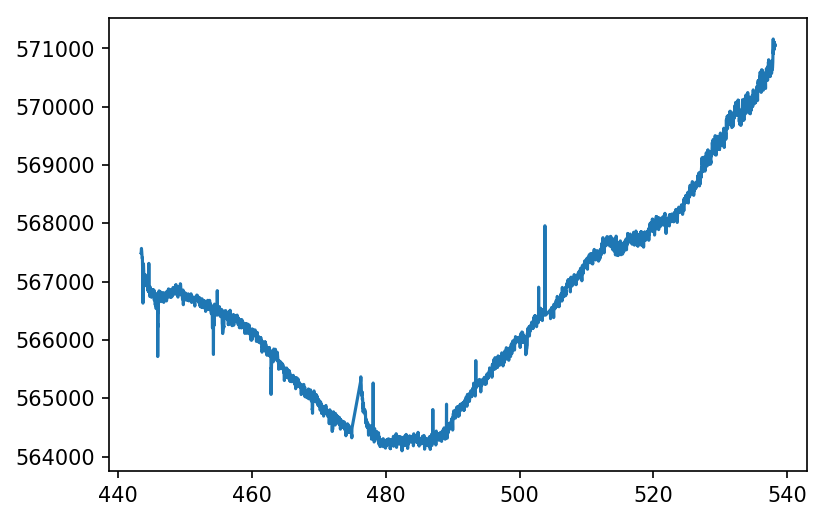

In [55]:
plt.plot(tpf.time, results[:, 0])

In [53]:
lc = tpf.to_lightcurve()

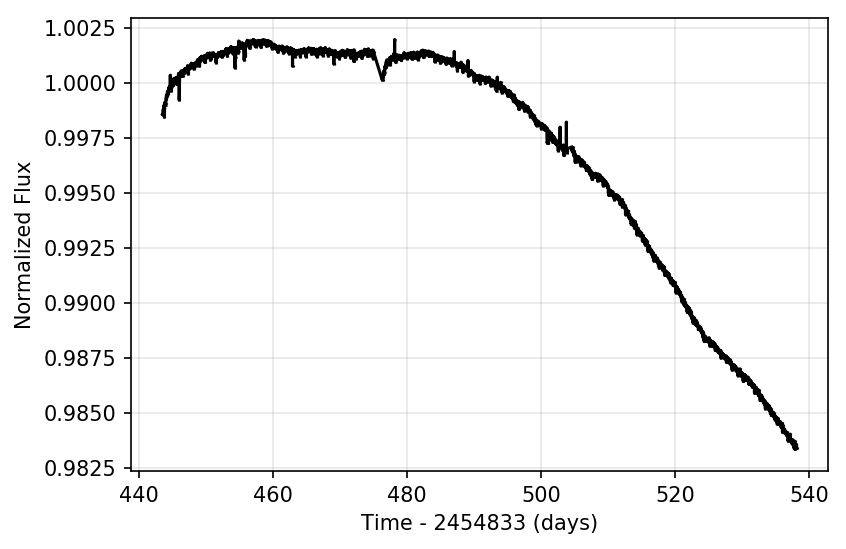

In [54]:
lc.plot()

In [56]:
lc_psf = LightCurve(tpf.time, results[:, 0]).flatten().fold(0.837495)

In [57]:
lc = tpf.to_lightcurve().flatten().fold(0.837495)

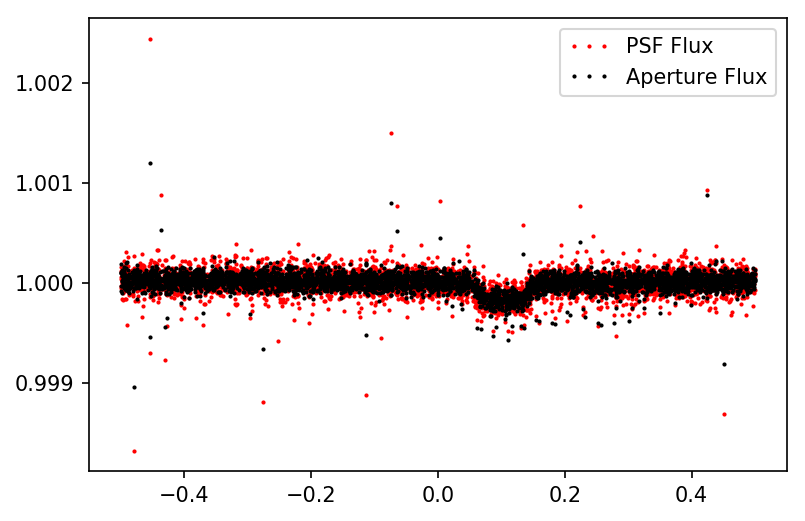

In [59]:
plt.plot(lc_psf.time, lc_psf.flux, 'ro', markersize=1, label='PSF Flux')
plt.plot(lc.time, lc.flux, 'ko', markersize=1, label='Aperture Flux')
plt.legend(numpoints=3)

I think that's ok for a pretty wrong model.

In [ ]:
plt.imshow(sess)